In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Capstone/Customer Churn Data.xlsx'

#Read the data

In [7]:
df=pd.read_excel(path)

In [ ]:
df.shape

(11260, 19)

There are 11,260 observations and 19 columns

In [ ]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [ ]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

By seeing the information of the dataset, there are 2 integer datatypes, 12 object datatypes and 5 float datatypes.

There are missing values in 15 columns out of 19. Also, there are some columns having anomalies. Will check below them

In [ ]:
df.describe(include = 'all').T

count  unique         top    freq       mean  \
AccountID                11260.0     NaN         NaN     NaN    25629.5   
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                          NaN      NaN       NaN      NaN       NaN   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count              NaN      NaN       NaN      NaN       NaN   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month                   NaN      NaN       NaN      NaN       NaN   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy                  NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment         NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect            NaN      NaN       NaN      NaN       NaN   
cashback                        NaN      NaN       NaN      NaN       NaN   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

In [ ]:
df['Gender'].nunique()

4

In [ ]:
df['account_segment'].nunique()

7

In [ ]:
df['Gender'].value_counts()

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

In [ ]:
df['account_segment'].value_counts()

account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 'M', 'Female': 'F'})

In [ ]:
df['account_segment'] = df['account_segment'].replace({'Regular +': 'Regular Plus', 'Super +': 'Super Plus'})

In [ ]:
df['Gender'].nunique()

2

In [ ]:
df['account_segment'].nunique()

5

In [ ]:
df['Gender'].value_counts()

Gender
M    6704
F    4448
Name: count, dtype: int64

In [ ]:
df['account_segment'].value_counts()

account_segment
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
Tenure
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: count, dtype: int64


PAYMENT :  5
Payment
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: count, dtype: int64


GENDER :  2
Gender
F    4448
M    6704
Name: count, dtype: int64


ACCOUNT_USER_COUNT :  7
Account_user_count
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: count, dtype: int64


ACCOUNT_SEGMENT :  5
account_segment
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: coun

In [ ]:
df = df.replace({'[$#@+*&]': np.nan}, regex=True)

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
Payment
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: count, dtype: int64


GENDER :  2
Gender
F    4448
M    6704
Name: count, dtype: int64


ACCOUNT_SEGMENT :  5
account_segment
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: count, dtype: int64


MARITAL_STATUS :  3
Marital_Status
Divorced    1668
Single      3520
Married     5860
Name: count, dtype: int64


LOGIN_DEVICE :  2
Login_device
Computer    3018
Mobile      7482
Name: count, dtype: int64




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [ ]:
Missing_values = (df.isnull().mean() * 100).round(2)
Missing_values

AccountID                  0.00
Churn                      0.00
Tenure                     1.94
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         3.94
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              7.02
Complain_ly                3.17
rev_growth_yoy             0.03
coupon_used_for_payment    0.03
Day_Since_CC_connect       3.18
cashback                   4.20
Login_device               6.75
dtype: float64

In [ ]:
df_temp = df[df.isnull().sum(axis=1)<=2]
df_temp.shape

(10927, 19)

In [ ]:
df.describe(include = 'all').T

count unique           top  freq       mean  \
AccountID                11260.0    NaN           NaN   NaN    25629.5   
Churn                    11260.0    NaN           NaN   NaN   0.168384   
Tenure                   11042.0    NaN           NaN   NaN  11.025086   
City_Tier                11148.0    NaN           NaN   NaN   1.653929   
CC_Contacted_LY          11158.0    NaN           NaN   NaN  17.867091   
Payment                    11151      5    Debit Card  4587        NaN   
Gender                     11152      2             M  6704        NaN   
Service_Score            11162.0    NaN           NaN   NaN   2.902526   
Account_user_count       10816.0    NaN           NaN   NaN   3.692862   
account_segment            11163      5  Regular Plus  4124        NaN   
CC_Agent_Score           11144.0    NaN           NaN   NaN   3.066493   
Marital_Status             11048      3       Married  5860        NaN   
rev_per_month            10469.0    NaN           NaN   NaN   6.362594   
Complain_ly              10903.0    NaN           NaN   NaN   0.285334   
rev_growth_yoy           11257.0    NaN           NaN   NaN  16.193391   
coupon_used_for_payment  11257.0    NaN           NaN   NaN   1.790619   
Day_Since_CC_connect     10902.0    NaN           NaN   NaN   4.633187   
cashback                 10787.0    NaN           NaN   NaN  196.23637   
Login_device               10500      2        Mobile  7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                    12.879782      0.0       2.0      9.0      16.0   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count         1.022976      1.0       3.0      4.0       4.0   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month             11.909686      1.0       3.0      5.0       7.0   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy             3.757721      4.0      13.0     15.0      19.0   
coupon_used_for_payment    1.969551      0.0       1.0      1.0       2.0   
Day_Since_CC_connect       3.697637      0.0       2.0      3.0       8.0   
cashback                 178.660514      0.0    147.21   165.25    200.01   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                      99.0  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           6.0  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month              140.0  
Complain_ly                  1.0  
rev_growth_yoy              28.0  
coupon_used_for_payment     16.0  
Day_Since_CC_connect        47.0  
cashback                  1997.0  
Login_device                 NaN

In [ ]:
new_df = df.copy()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
new_df = new_df.drop(['AccountID'],axis=1)

In [ ]:
dups = new_df.duplicated()
#dups = DF[DF.duplicated(keep=False)]
print("Duplicated Rows:")
#print(dups)
print("number of duplicates", dups.sum())

Duplicated Rows:
number of duplicates 264


In [ ]:
new_df['City_Tier']=new_df['City_Tier'].astype('object')
new_df['Service_Score']=new_df['Service_Score'].astype('object')
new_df['CC_Agent_Score']=new_df['CC_Agent_Score'].astype('object')
new_df['Complain_ly']=new_df['Complain_ly'].astype('object')
new_df['Churn']=new_df['Churn'].astype('object')

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(new_df[column].describe(),end=' ')


    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(new_df[column].min())
    b=round(new_df[column].max())
    freq, bins, patches = plt.hist(new_df[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=new_df[column])
    #ax.legend()
    plt.show()

In [ ]:
lstnumericcolumns = new_df.select_dtypes(include=['number'])

In [ ]:
object_df = new_df.select_dtypes(include=['object'])

In [ ]:
lstnumericcolumns.columns

Index(['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')

In [ ]:
object_df.columns

Index(['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly',
       'Login_device'],
      dtype='object')

In [ ]:
lstnumericcolumns = list(lstnumericcolumns.columns.values)
len(lstnumericcolumns)

8

In [ ]:
type(lstnumericcolumns)

list

Description of Tenure
----------------------------------------------------------------------------
count    11042.000000
mean        11.025086
std         12.879782
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64 Distribution of Tenure
----------------------------------------------------------------------------
BoxPlot of Tenure
----------------------------------------------------------------------------


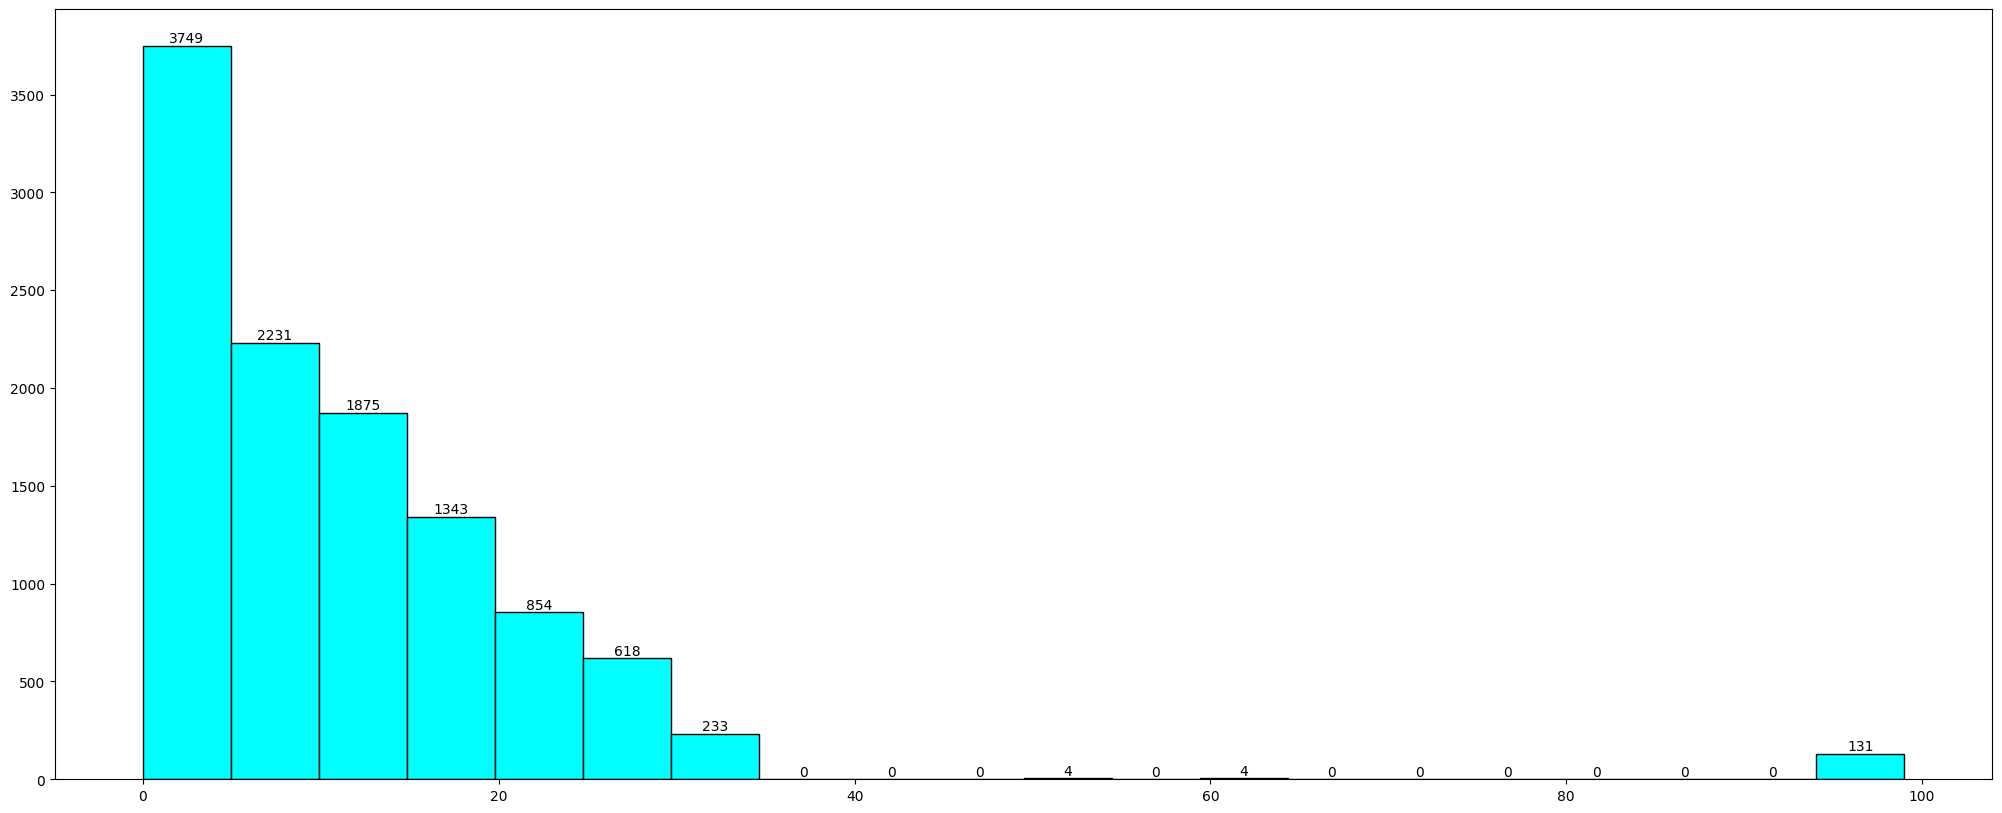

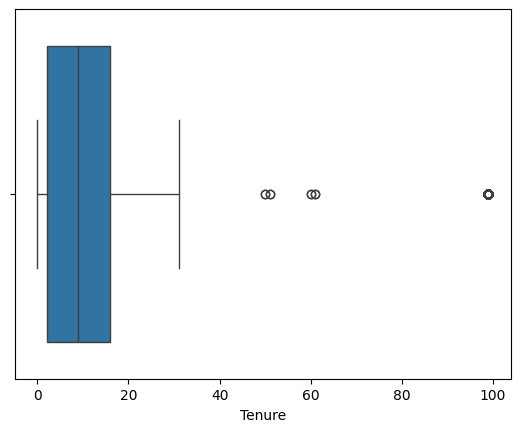

Description of CC_Contacted_LY
----------------------------------------------------------------------------
count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64 Distribution of CC_Contacted_LY
----------------------------------------------------------------------------
BoxPlot of CC_Contacted_LY
----------------------------------------------------------------------------


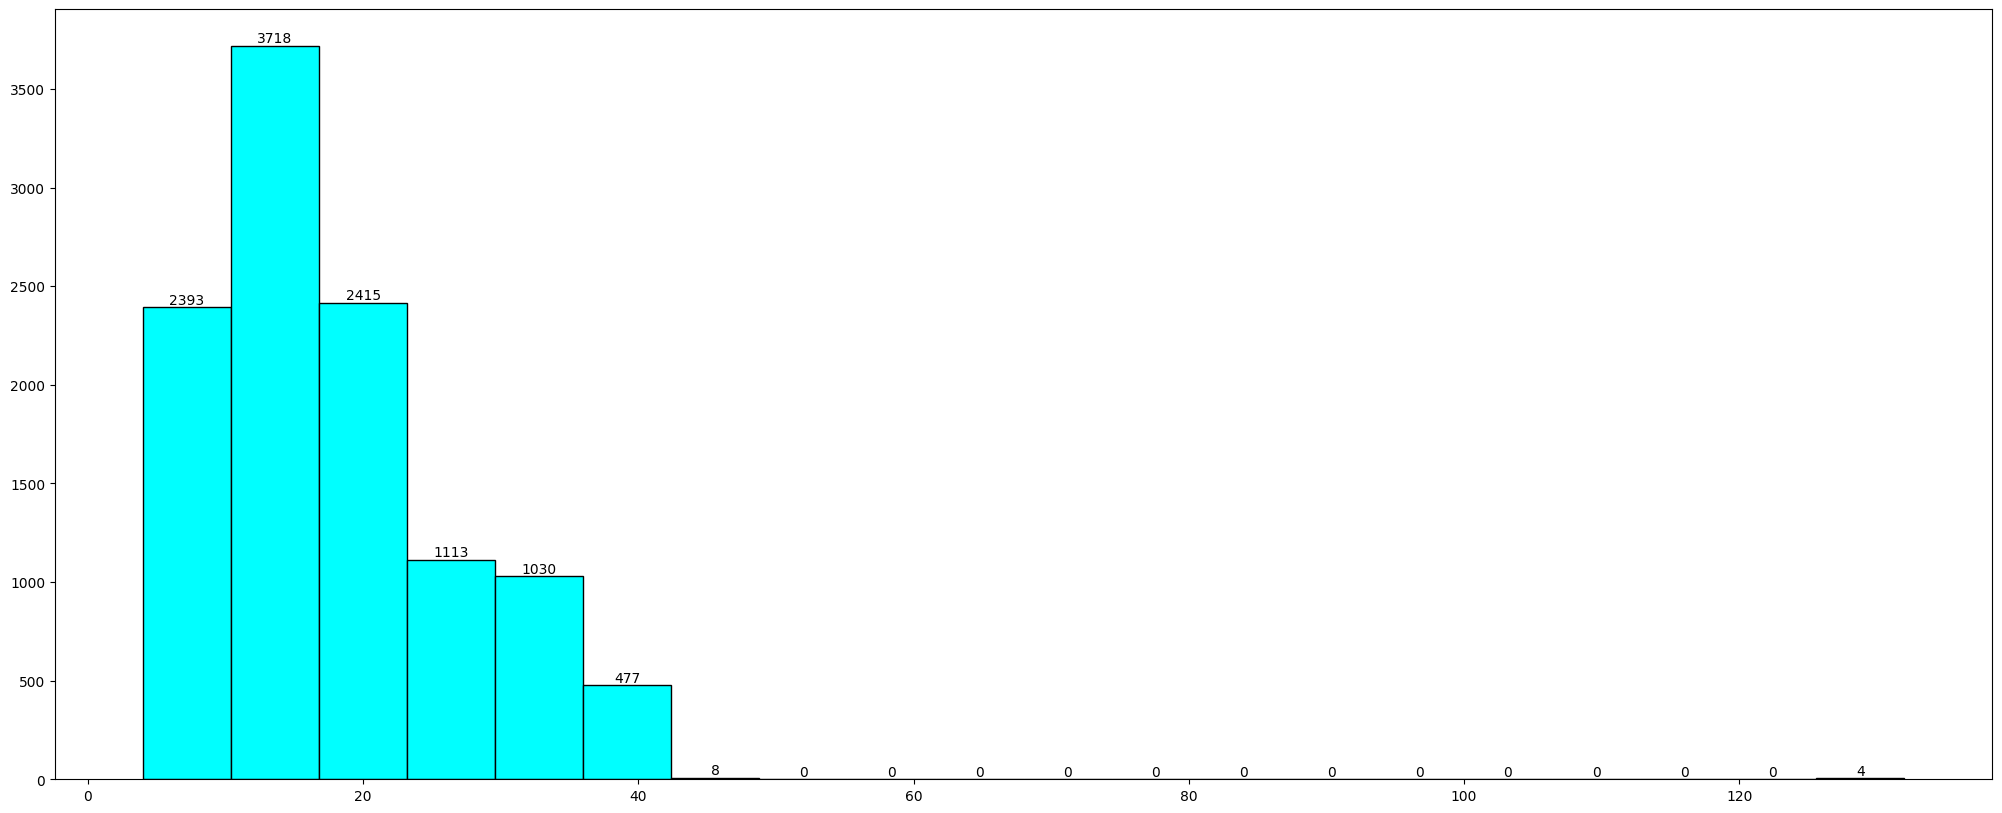

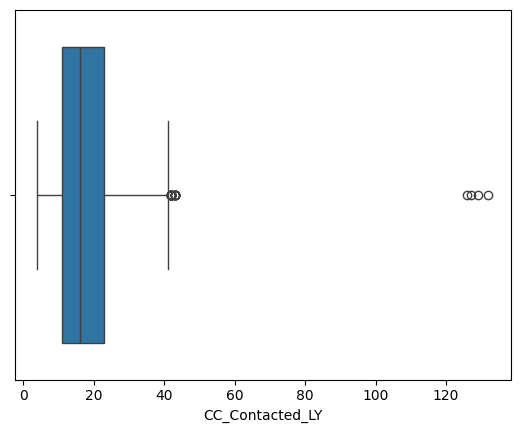

Description of Account_user_count
----------------------------------------------------------------------------
count    10816.000000
mean         3.692862
std          1.022976
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Account_user_count, dtype: float64 Distribution of Account_user_count
----------------------------------------------------------------------------
BoxPlot of Account_user_count
----------------------------------------------------------------------------


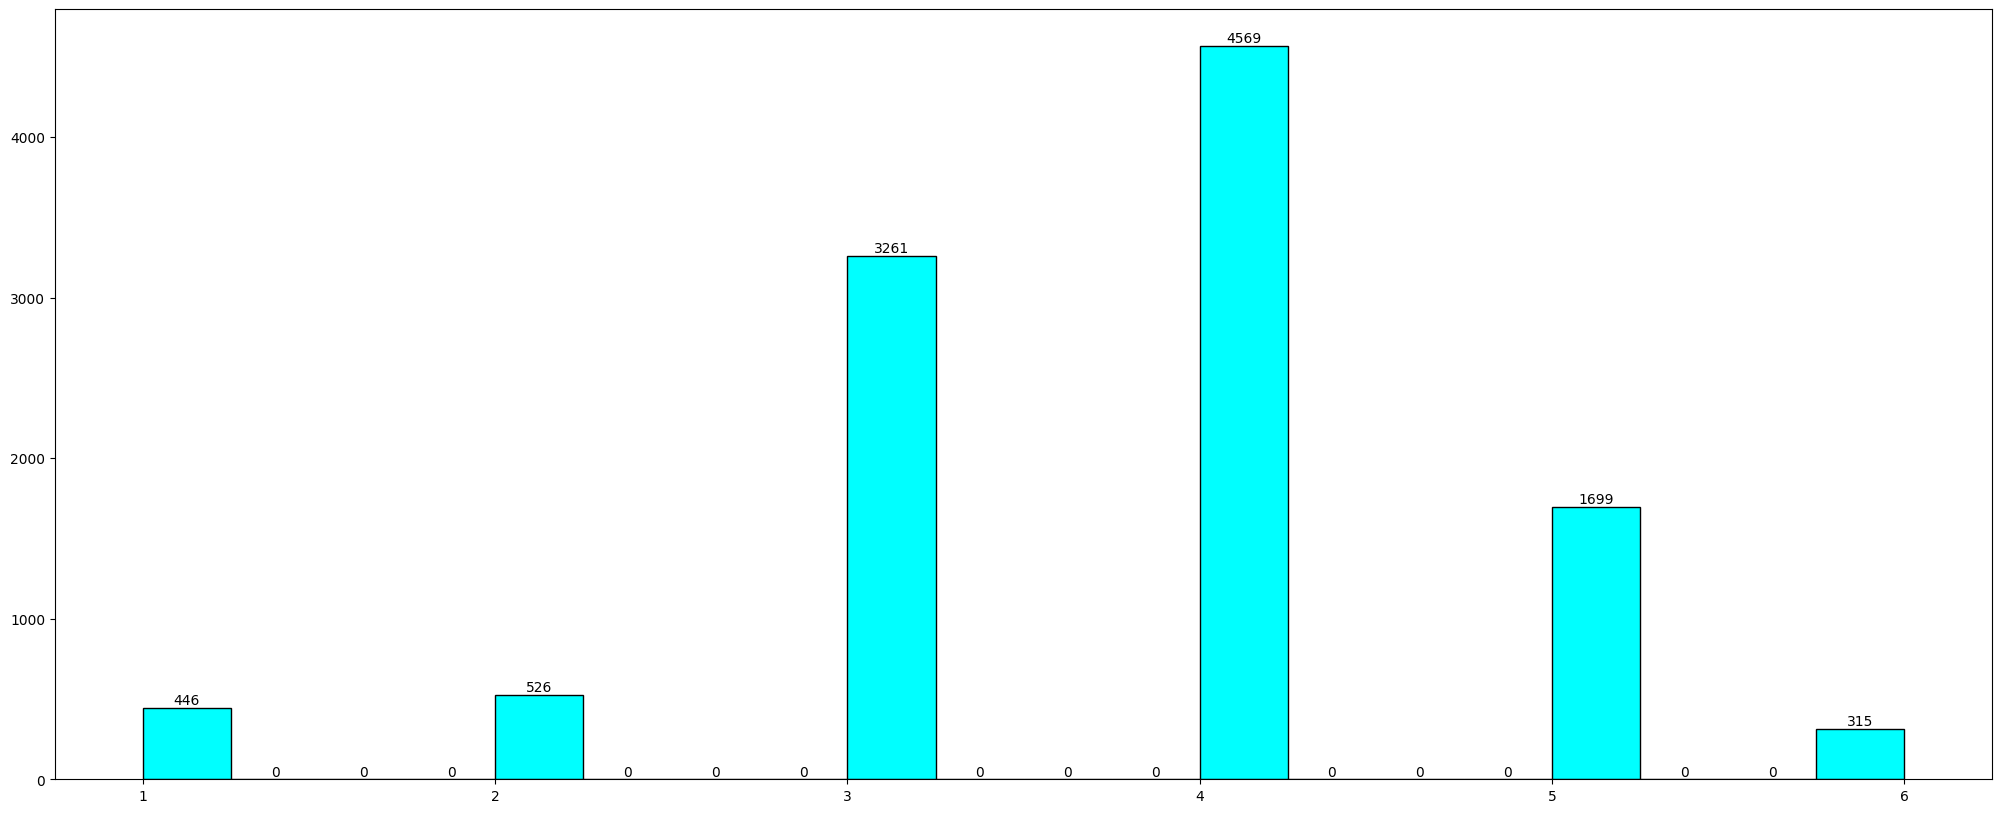

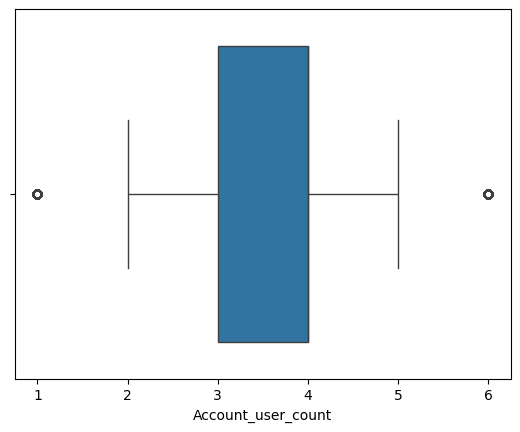

Description of rev_per_month
----------------------------------------------------------------------------
count    10469.000000
mean         6.362594
std         11.909686
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64 Distribution of rev_per_month
----------------------------------------------------------------------------
BoxPlot of rev_per_month
----------------------------------------------------------------------------


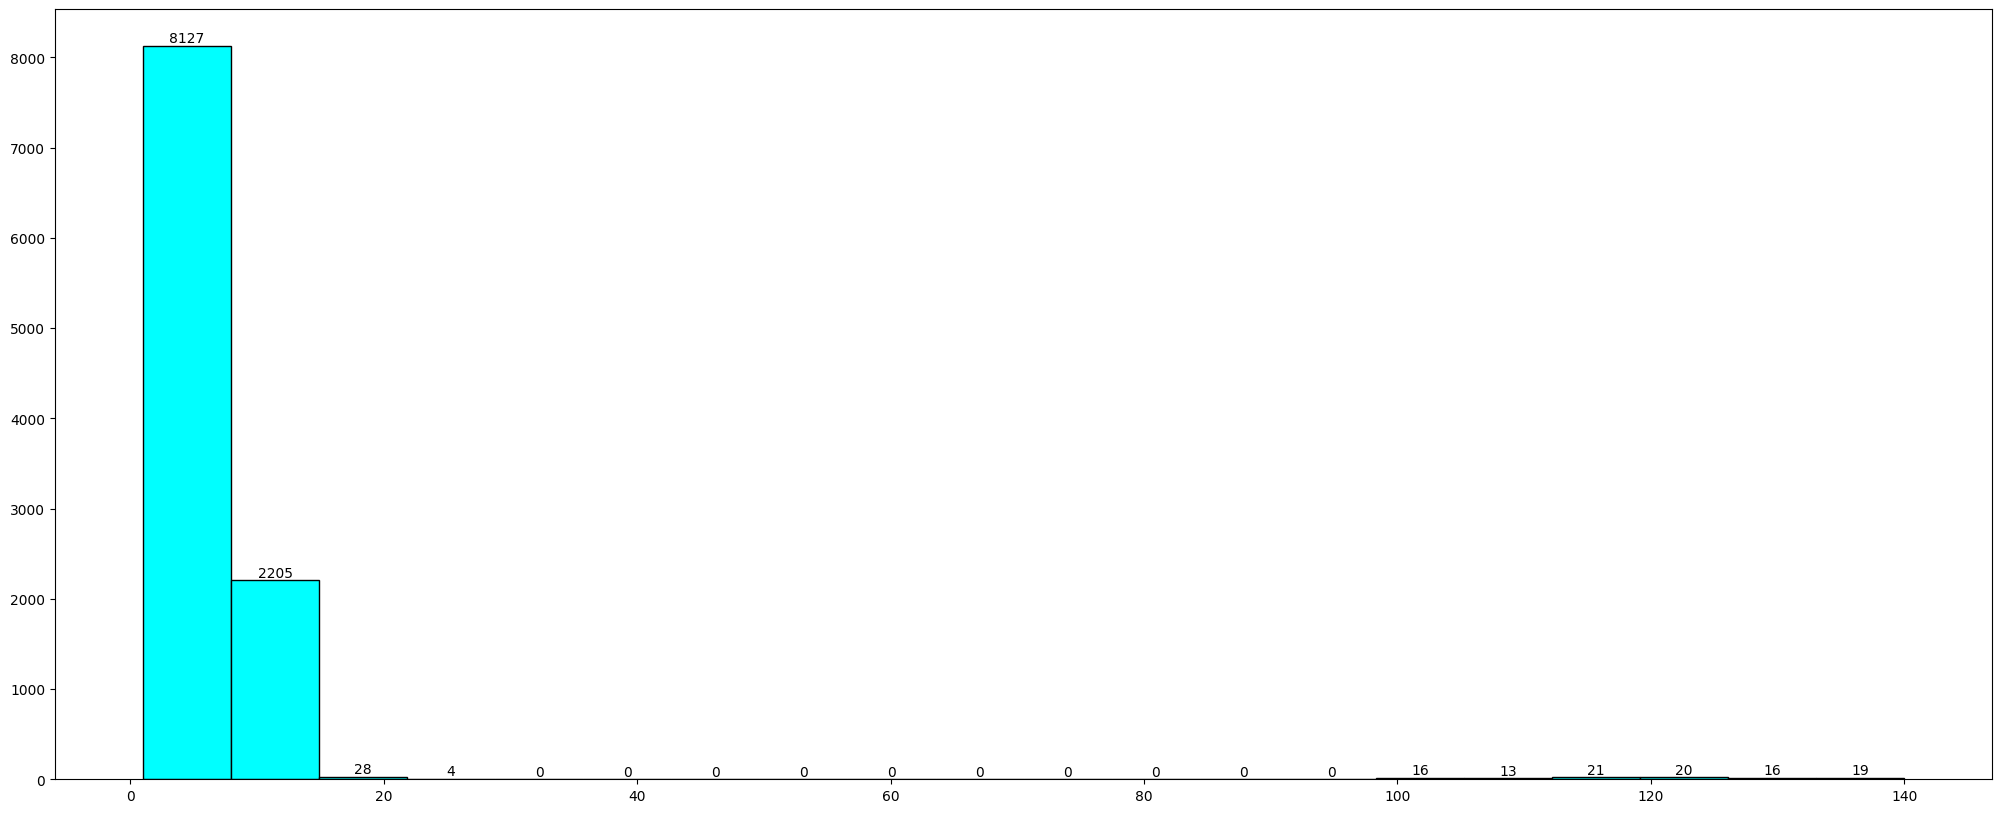

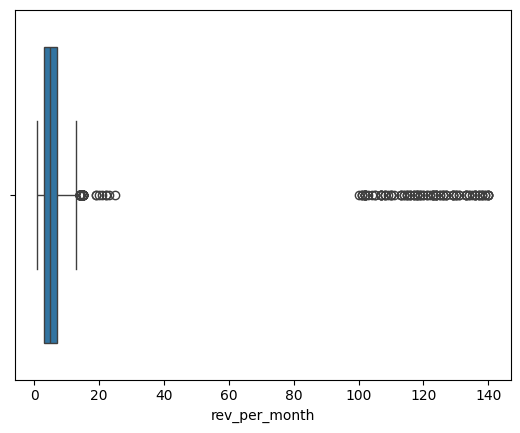

Description of rev_growth_yoy
----------------------------------------------------------------------------
count    11257.000000
mean        16.193391
std          3.757721
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64 Distribution of rev_growth_yoy
----------------------------------------------------------------------------
BoxPlot of rev_growth_yoy
----------------------------------------------------------------------------


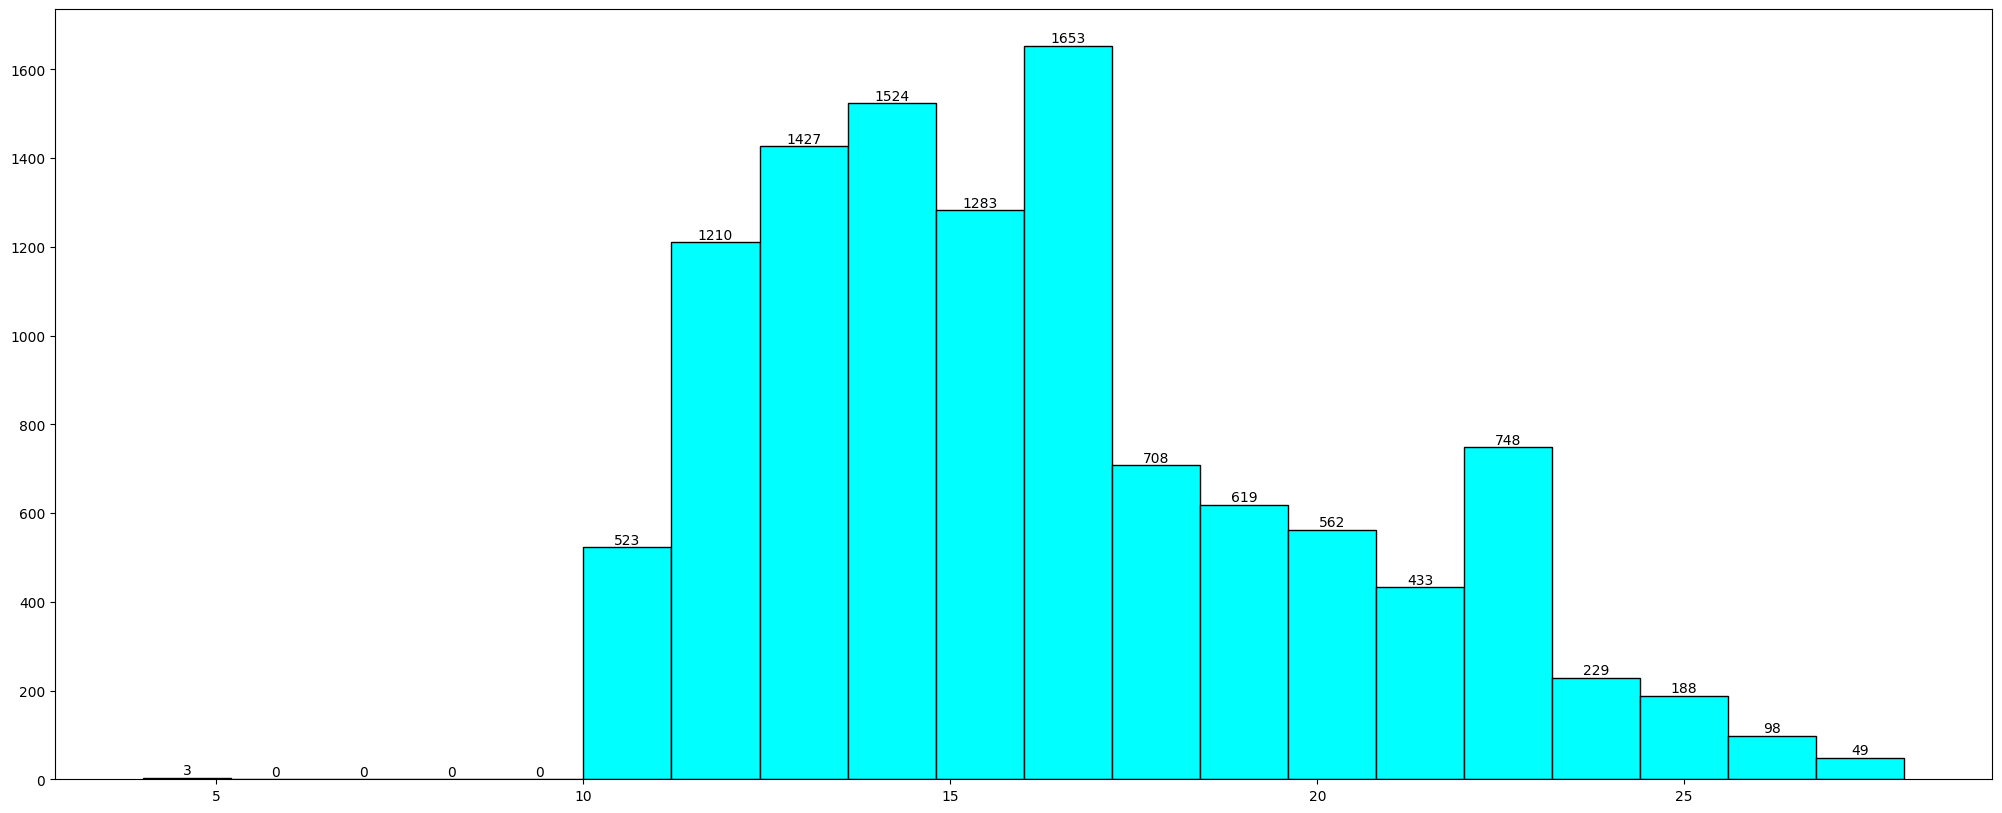

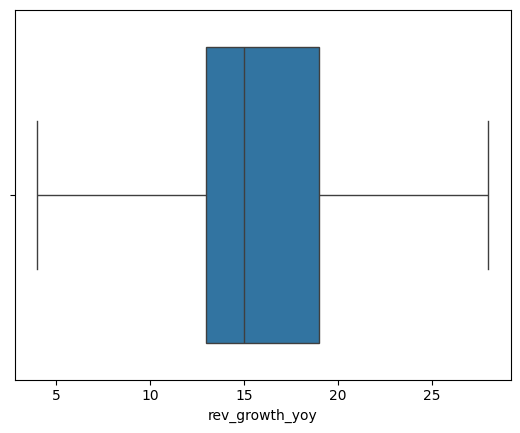

Description of coupon_used_for_payment
----------------------------------------------------------------------------
count    11257.000000
mean         1.790619
std          1.969551
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64 Distribution of coupon_used_for_payment
----------------------------------------------------------------------------
BoxPlot of coupon_used_for_payment
----------------------------------------------------------------------------


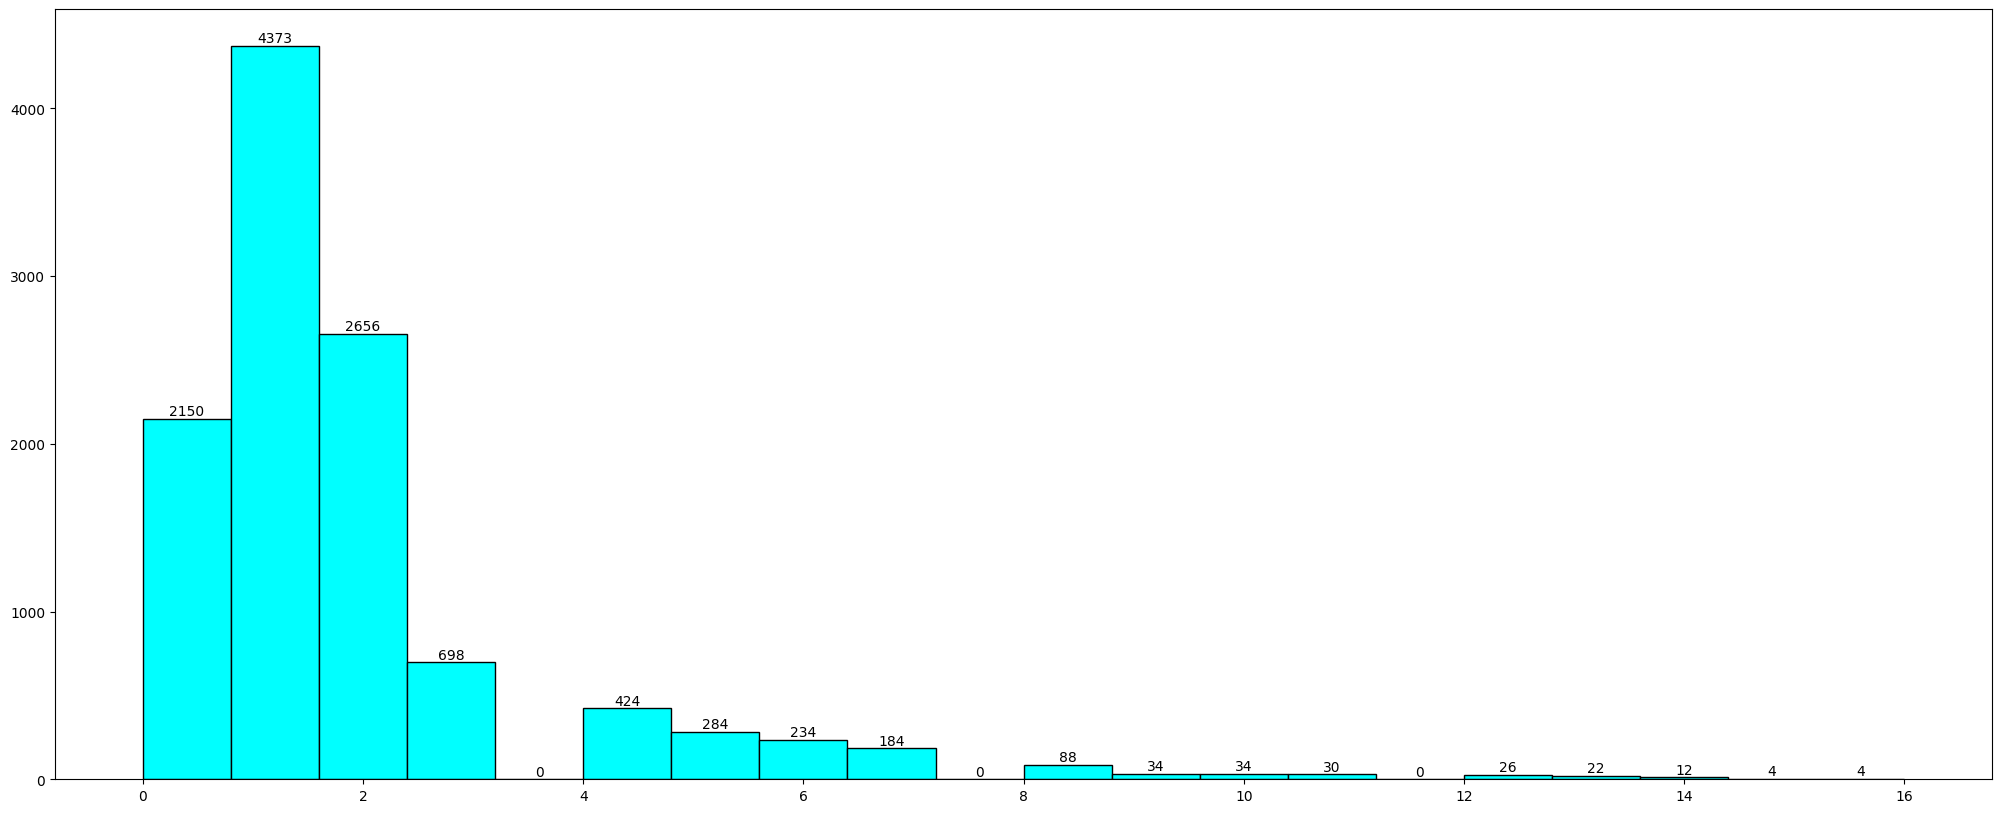

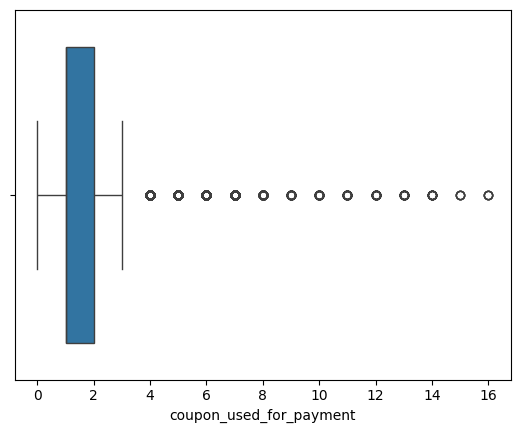

Description of Day_Since_CC_connect
----------------------------------------------------------------------------
count    10902.000000
mean         4.633187
std          3.697637
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64 Distribution of Day_Since_CC_connect
----------------------------------------------------------------------------
BoxPlot of Day_Since_CC_connect
----------------------------------------------------------------------------


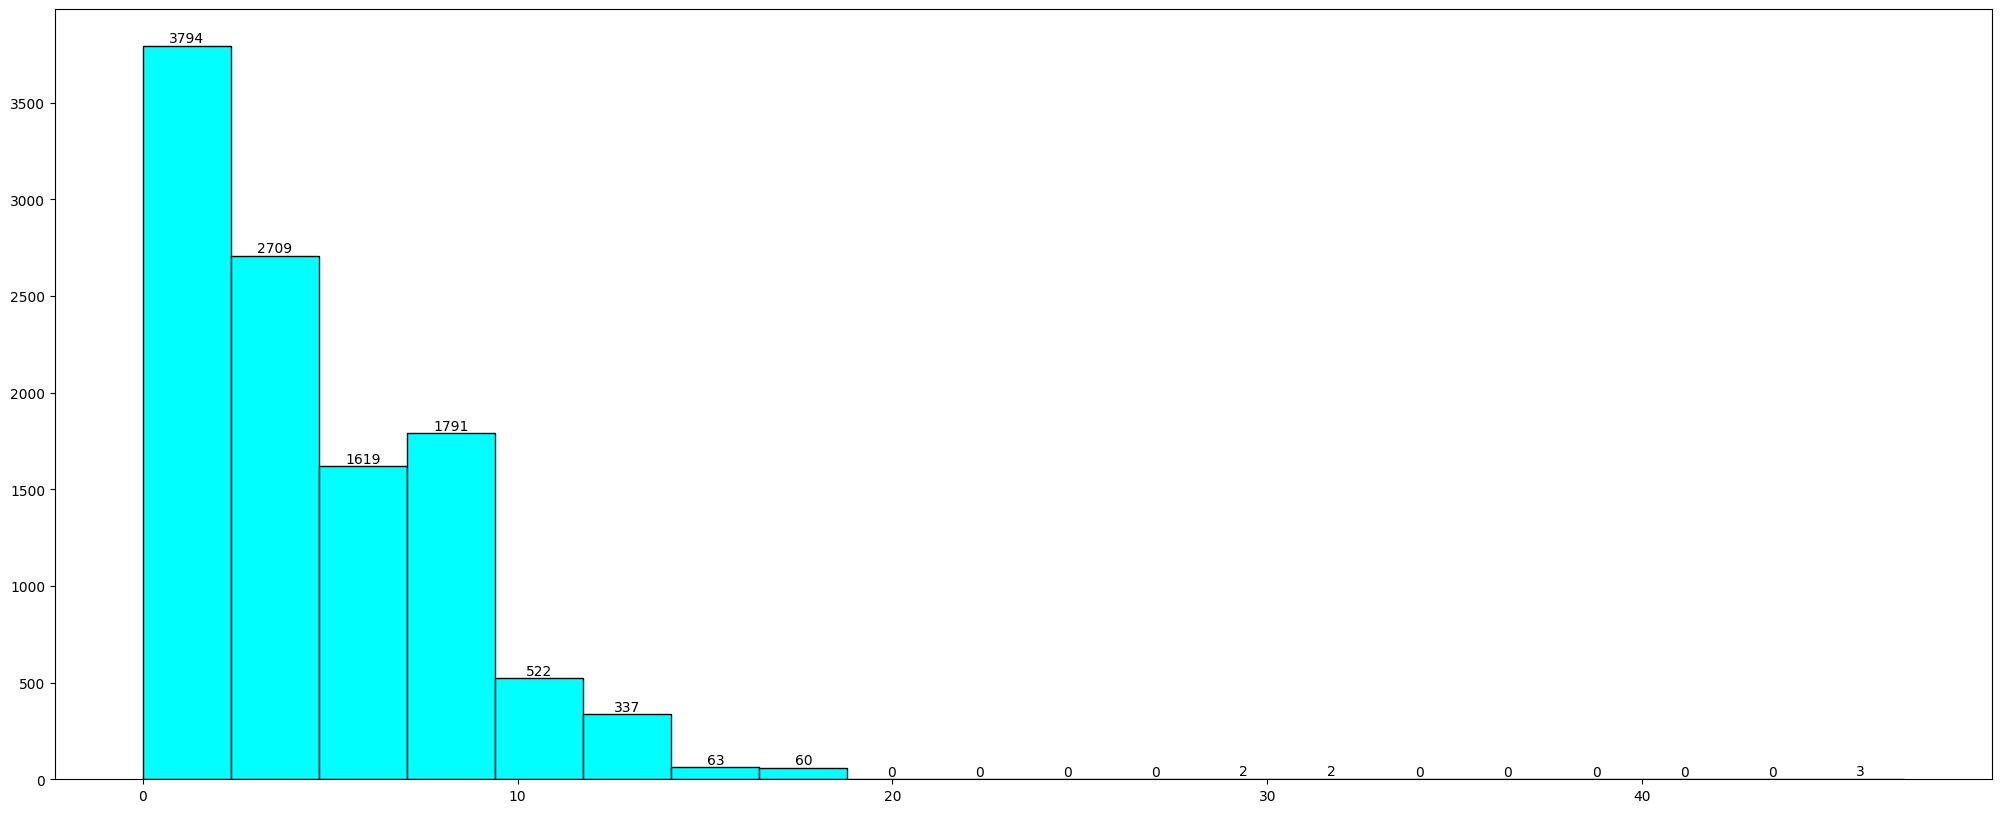

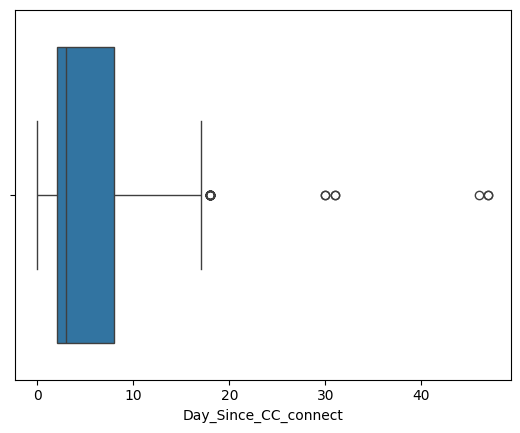

Description of cashback
----------------------------------------------------------------------------
count    10787.000000
mean       196.236370
std        178.660514
min          0.000000
25%        147.210000
50%        165.250000
75%        200.010000
max       1997.000000
Name: cashback, dtype: float64 Distribution of cashback
----------------------------------------------------------------------------
BoxPlot of cashback
----------------------------------------------------------------------------


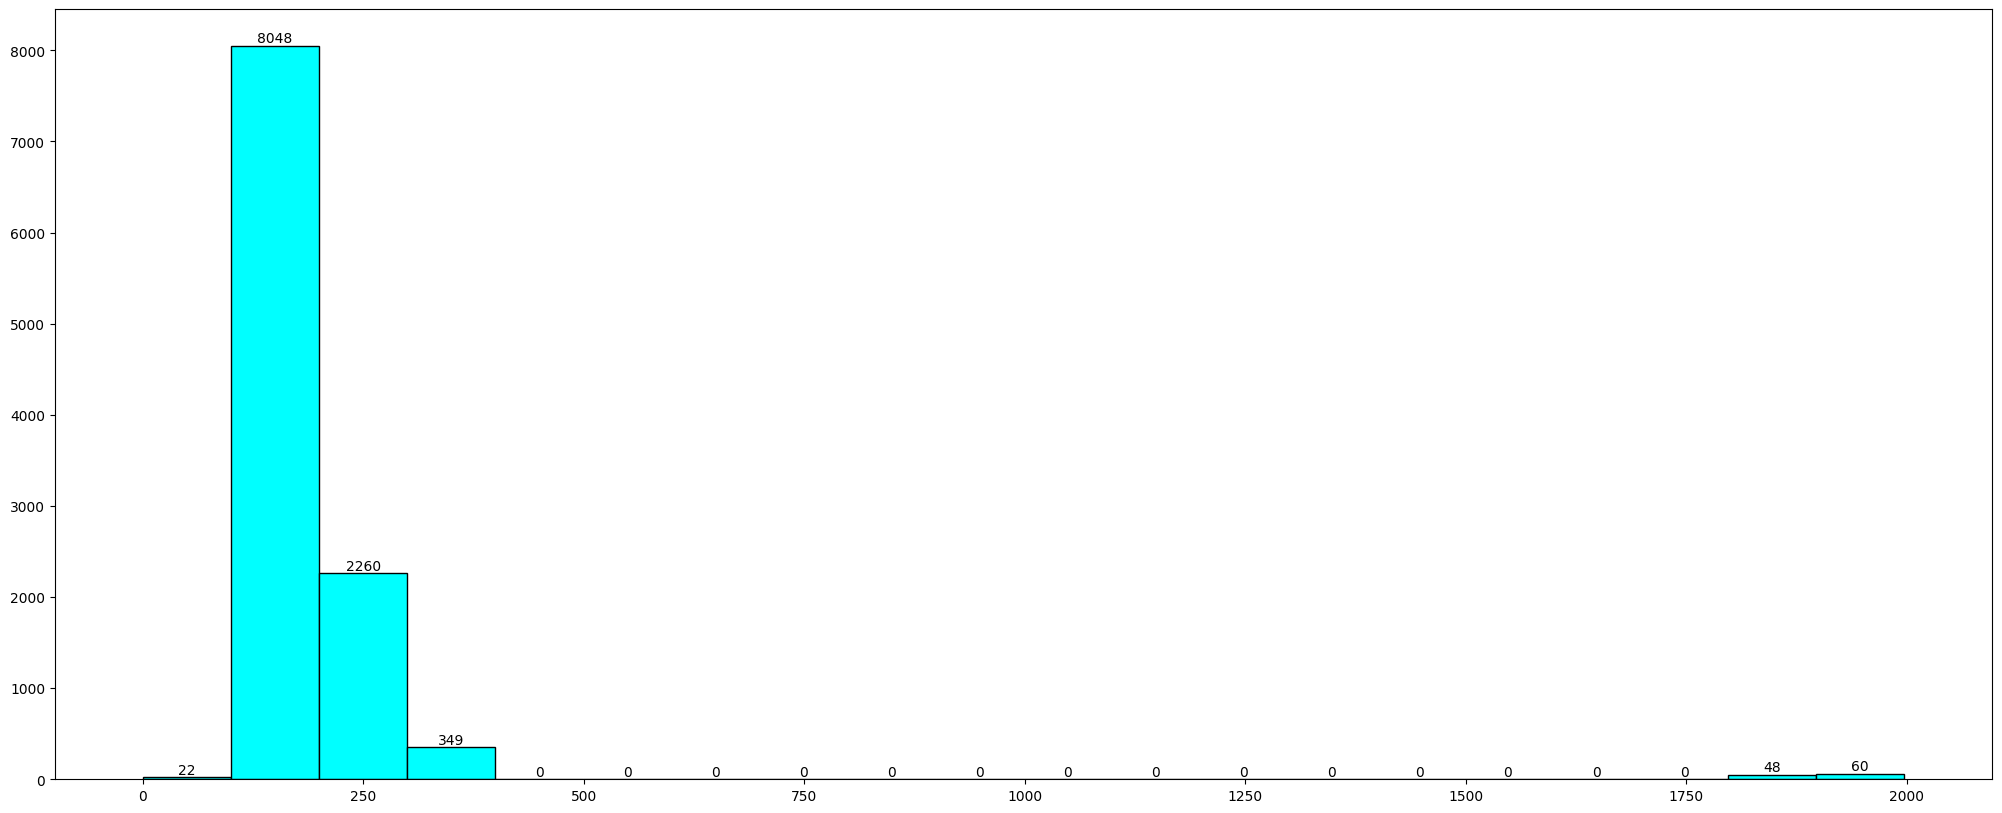

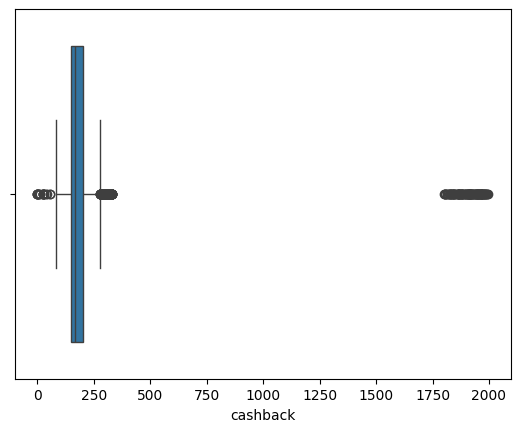

In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

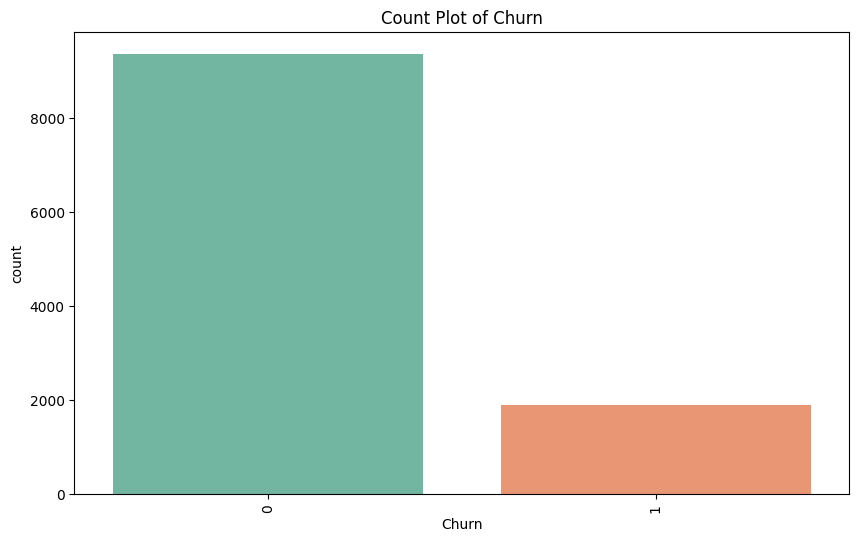

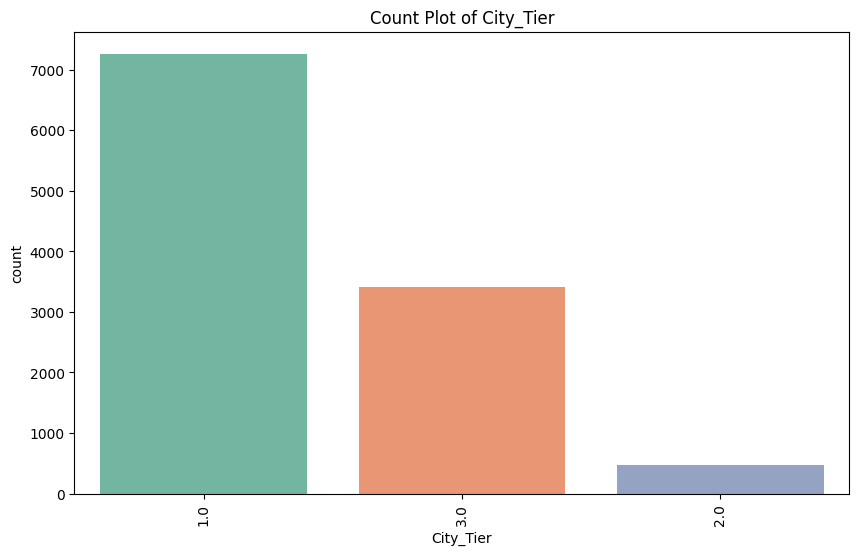

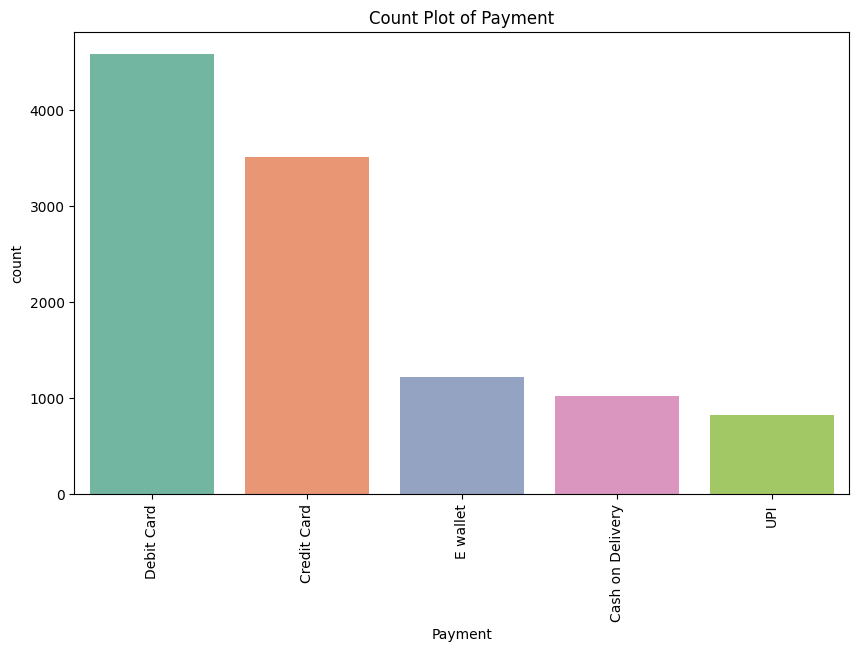

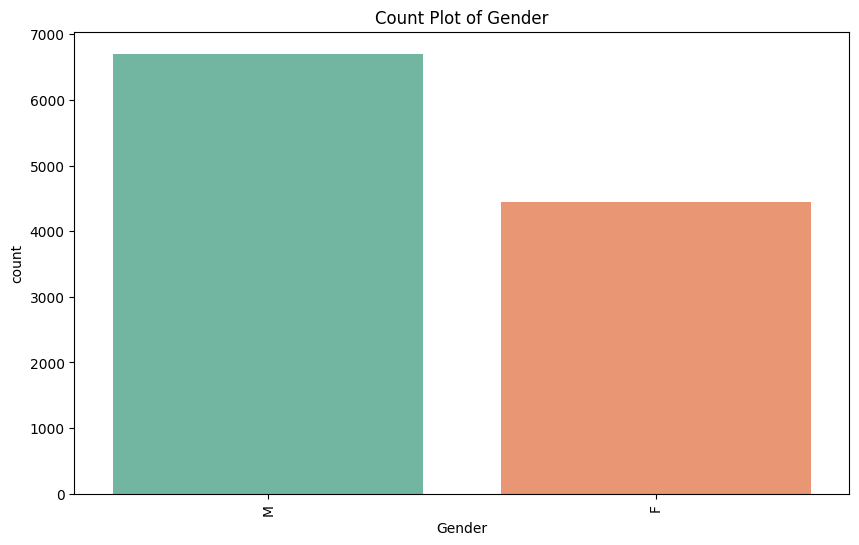

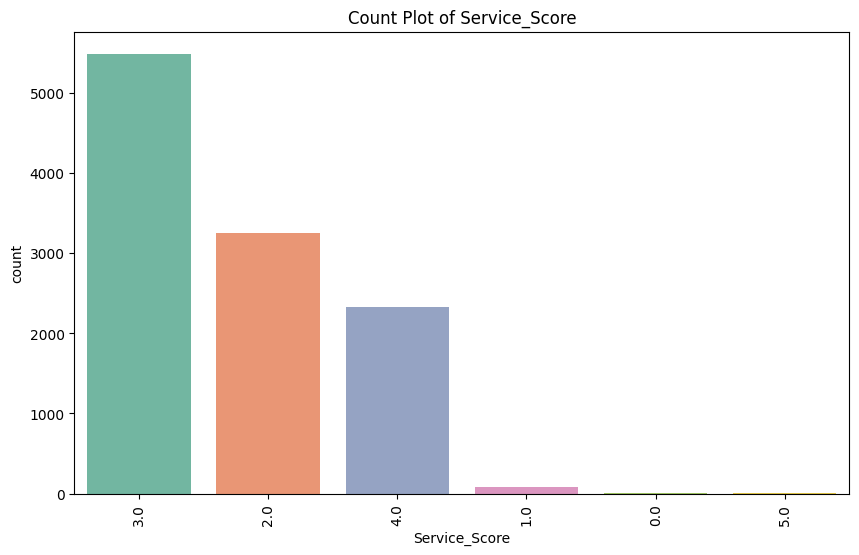

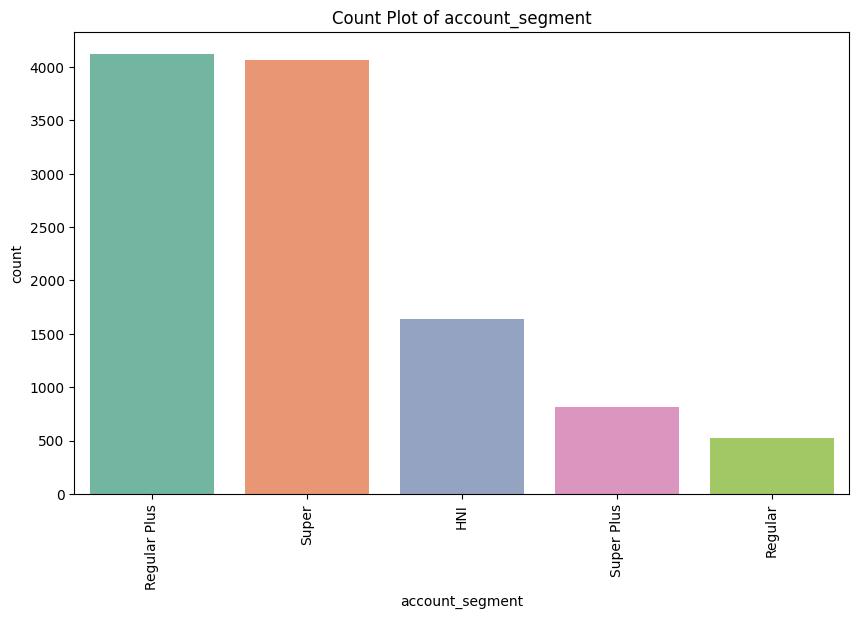

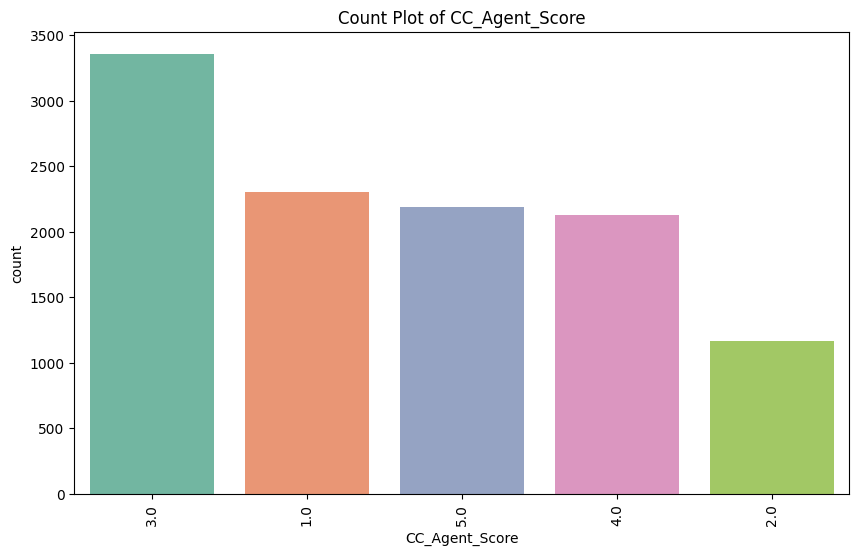

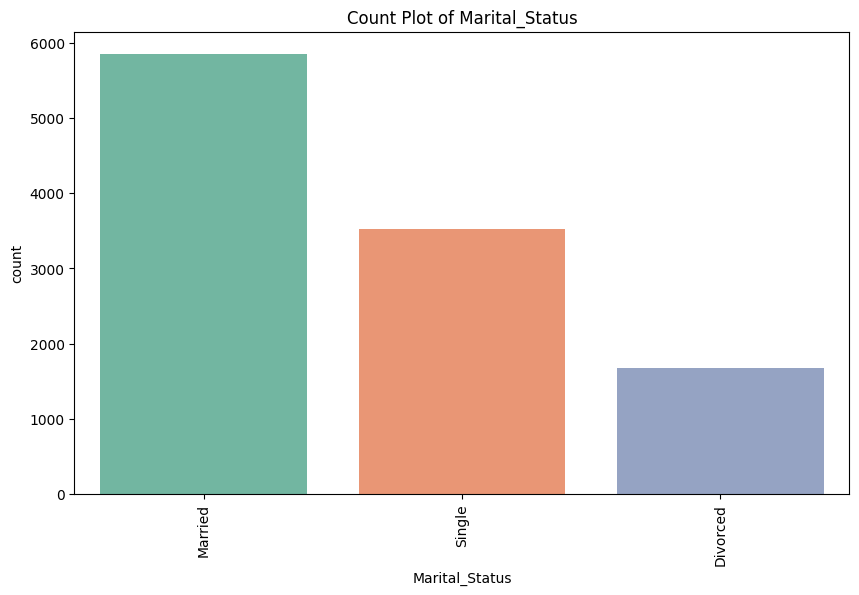

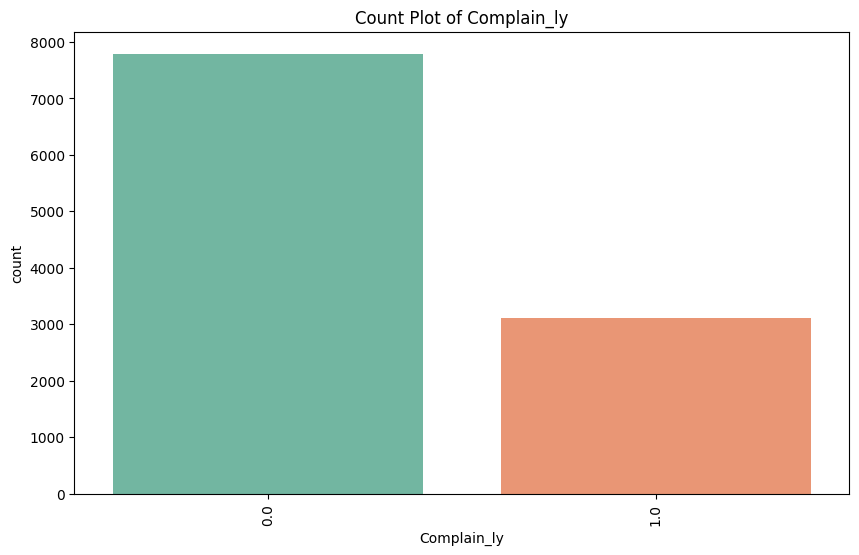

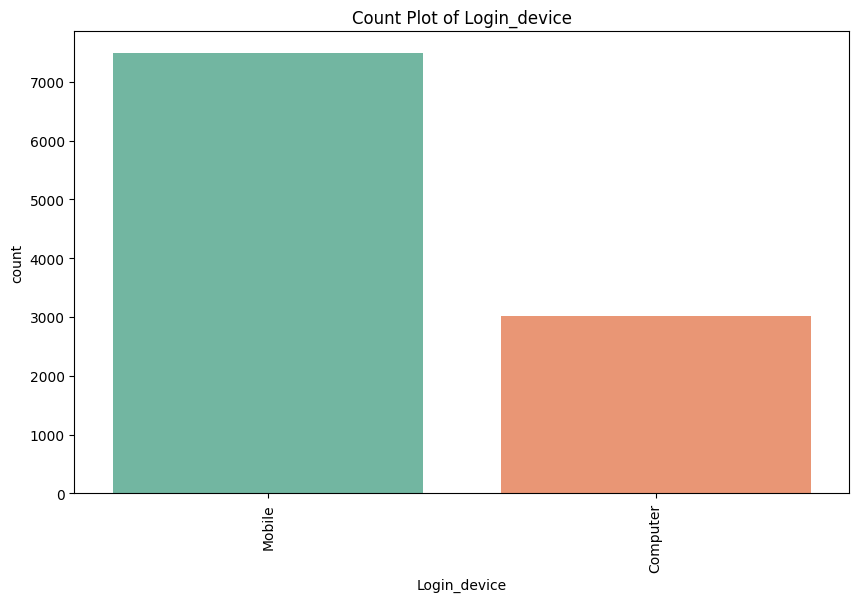

In [ ]:
for x in object_df:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=object_df, x=x,order=df[x].value_counts().index,palette='Set2')
  plt.title(f'Count Plot of {x}')
  plt.xticks(rotation=90)
  plt.show()


#Bivariate Analysis

In [ ]:
sorted_order = new_df['Payment'].value_counts().index

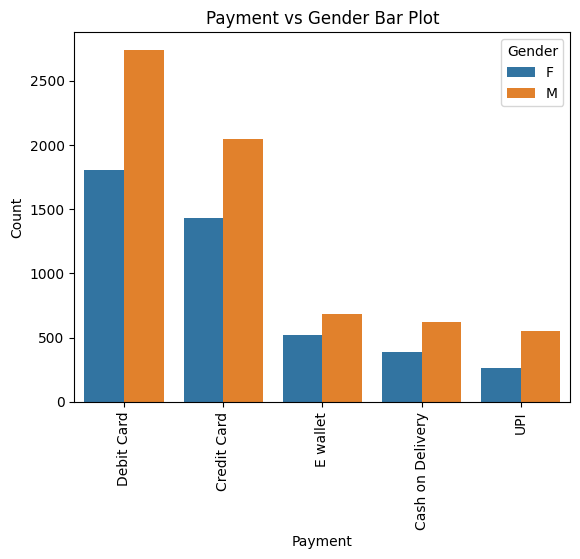

In [ ]:
sns.countplot(x='Payment', hue='Gender', data=new_df, order=sorted_order)
plt.title('Payment vs Gender Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(new_df['Payment'], new_df['Gender'], normalize='index')
cross_tab

Gender                   F         M
Payment                             
Cash on Delivery  0.384462  0.615538
Credit Card       0.412255  0.587745
Debit Card        0.396654  0.603346
E wallet          0.432477  0.567523
UPI               0.324723  0.675277

In [ ]:
sorted_order = new_df['account_segment'].value_counts().index

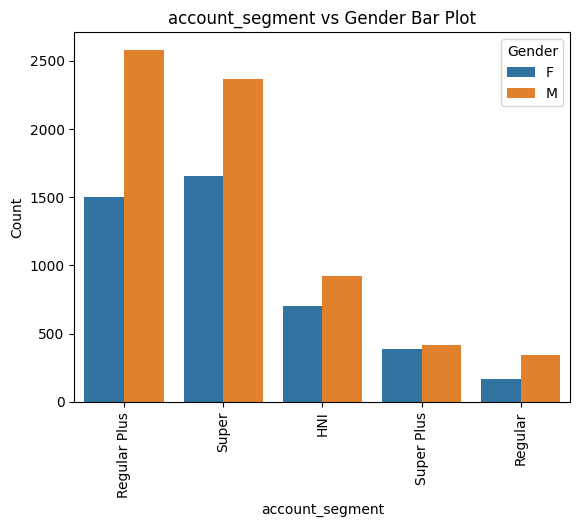

In [ ]:
sns.countplot(x='account_segment', hue='Gender', data=new_df, order=sorted_order)
plt.title('account_segment vs Gender Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(new_df['account_segment'], new_df['Gender'], normalize='index')
cross_tab

Gender                  F         M
account_segment                    
HNI              0.430854  0.569146
Regular          0.328155  0.671845
Regular Plus     0.368022  0.631978
Super            0.411882  0.588118
Super Plus       0.481390  0.518610

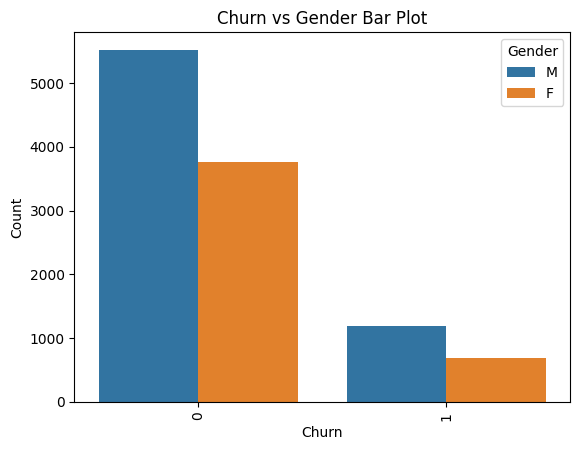

In [ ]:
sns.countplot(x='Churn', hue='Gender', data=new_df)
plt.title('Churn vs Gender Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sorted_order = new_df['City_Tier'].value_counts().index

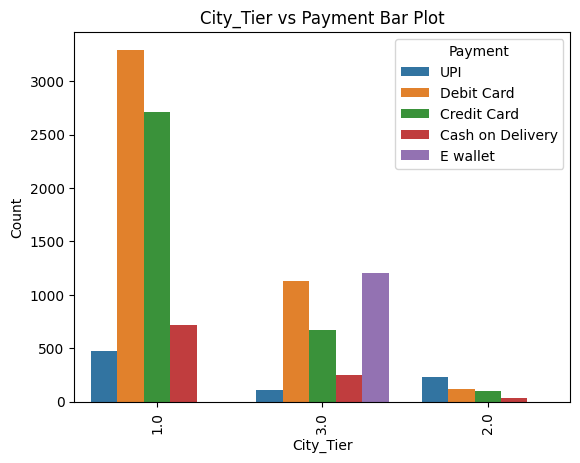

In [ ]:
sns.countplot(x='City_Tier', hue='Payment', data=new_df, order=sorted_order)
plt.title('City_Tier vs Payment Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

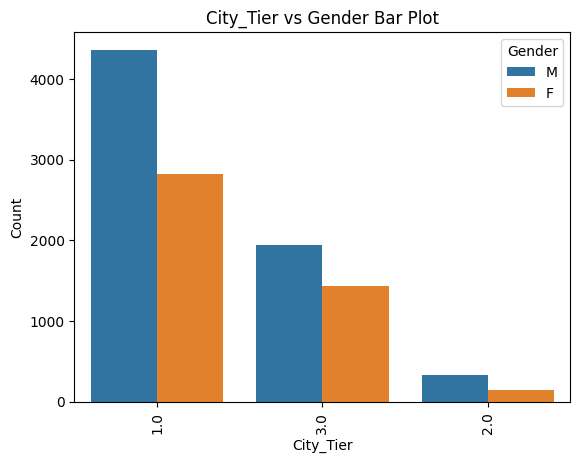

In [ ]:
sns.countplot(x='City_Tier', hue='Gender', data=new_df, order=sorted_order)
plt.title('City_Tier vs Gender Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

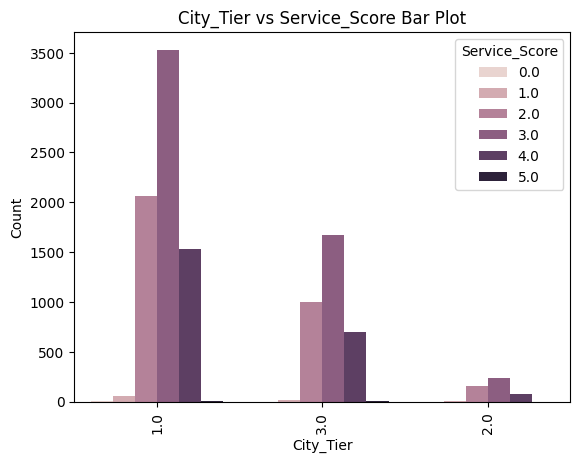

In [ ]:
sns.countplot(x='City_Tier', hue='Service_Score', data=new_df, order=sorted_order)
plt.title('City_Tier vs Service_Score Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

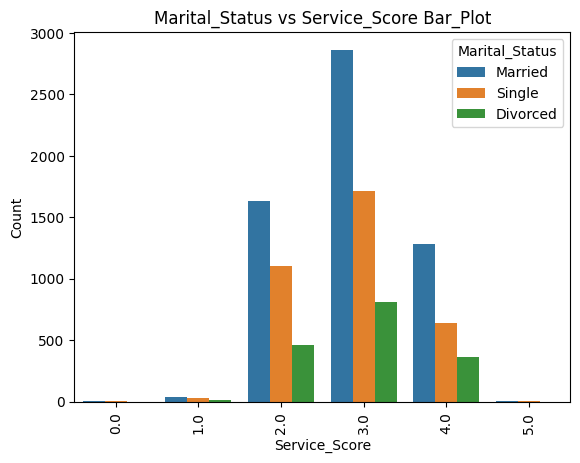

In [ ]:
sns.countplot(x='Service_Score', hue='Marital_Status', data=new_df)
plt.title('Marital_Status vs Service_Score Bar_Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

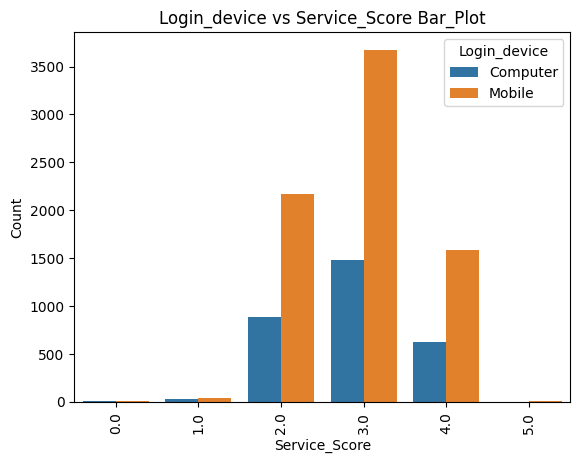

In [ ]:
sns.countplot(x='Service_Score', hue='Login_device', data=new_df)
plt.title('Login_device vs Service_Score Bar_Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

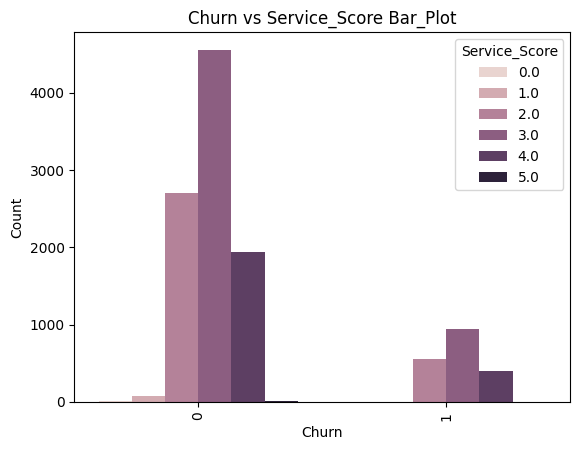

In [ ]:
sns.countplot(x='Churn', hue='Service_Score', data=new_df)
plt.title('Churn vs Service_Score Bar_Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

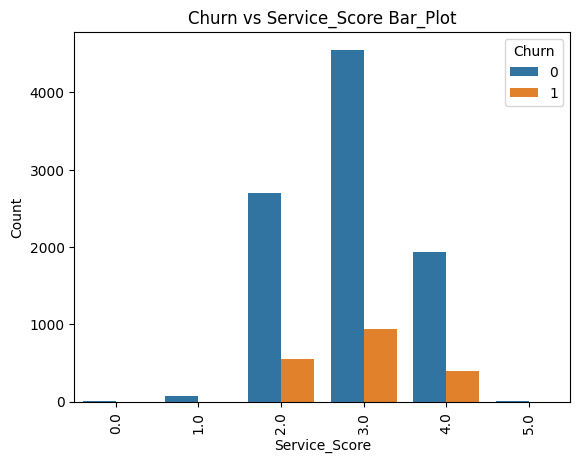

In [ ]:
sns.countplot(x='Service_Score', hue='Churn', data=new_df)
plt.title('Churn vs Service_Score Bar_Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

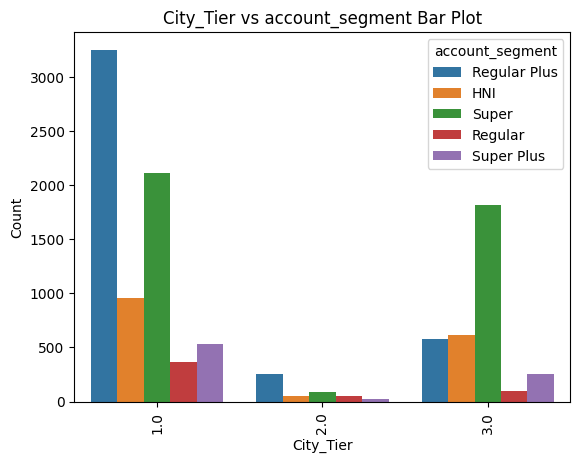

In [ ]:
sns.countplot(x='City_Tier', hue='account_segment', data=new_df)
plt.title('City_Tier vs account_segment Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

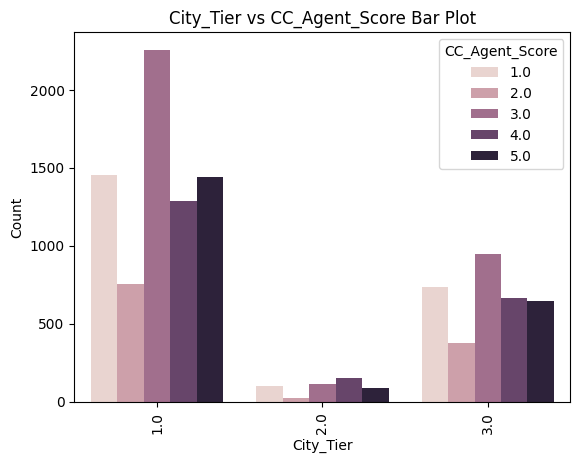

In [ ]:
sns.countplot(x='City_Tier', hue='CC_Agent_Score', data=new_df)
plt.title('City_Tier vs CC_Agent_Score Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

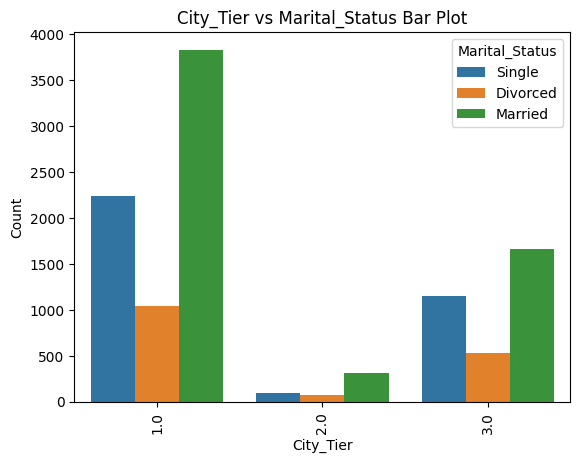

In [ ]:
sns.countplot(x='City_Tier', hue='Marital_Status', data=new_df)
plt.title('City_Tier vs Marital_Status Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

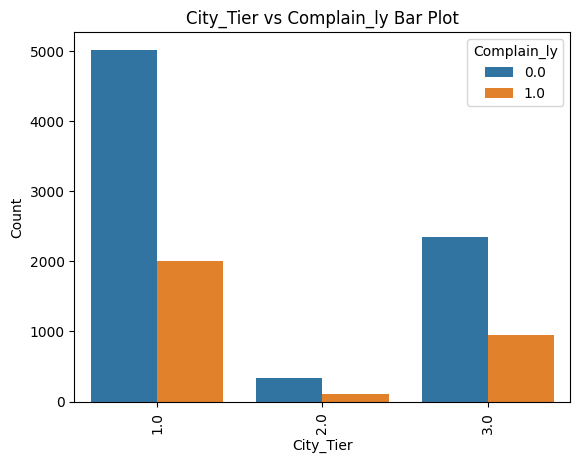

In [ ]:
sns.countplot(x='City_Tier', hue='Complain_ly', data=new_df)
plt.title('City_Tier vs Complain_ly Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

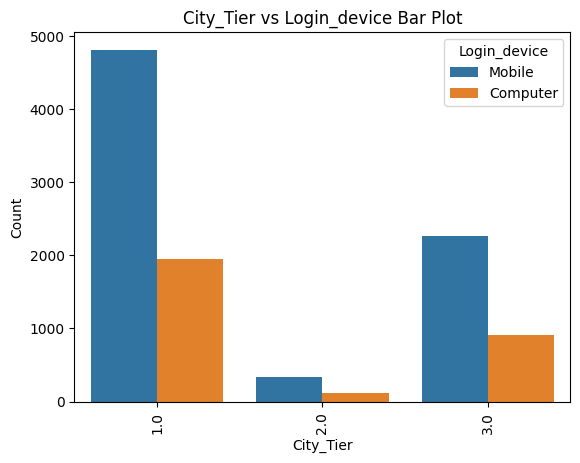

In [ ]:
sns.countplot(x='City_Tier', hue='Login_device', data=new_df)
plt.title('City_Tier vs Login_device Bar Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

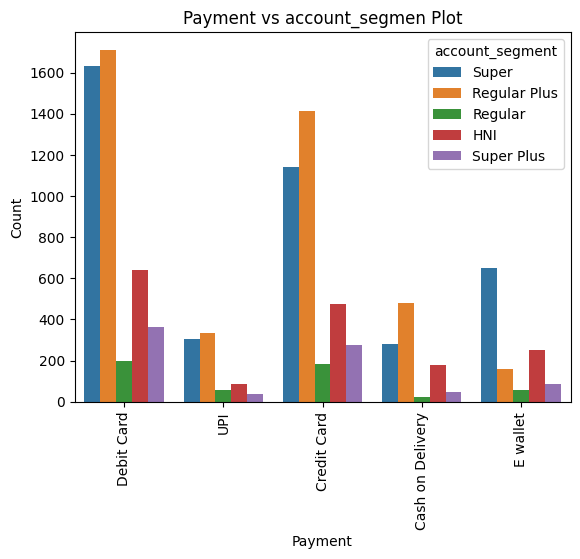

In [ ]:
sns.countplot(x='Payment', hue='account_segment', data=new_df)
plt.title('Payment vs account_segmen Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

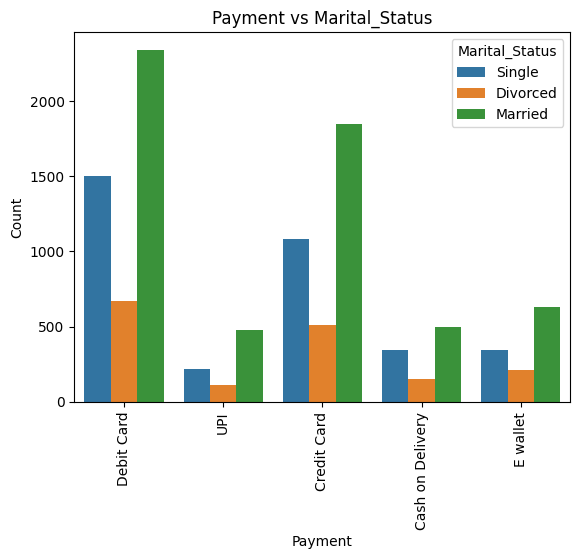

In [ ]:
sns.countplot(x='Payment', hue='Marital_Status', data=new_df)
plt.title('Payment vs Marital_Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

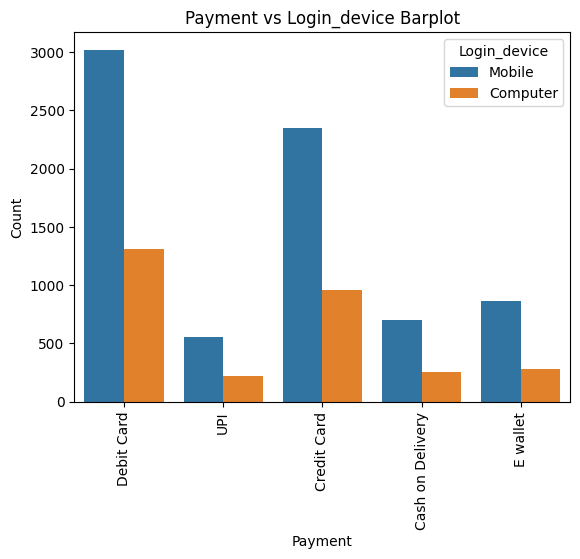

In [ ]:
sns.countplot(x='Payment', hue='Login_device', data=new_df)
plt.title('Payment vs Login_device Barplot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

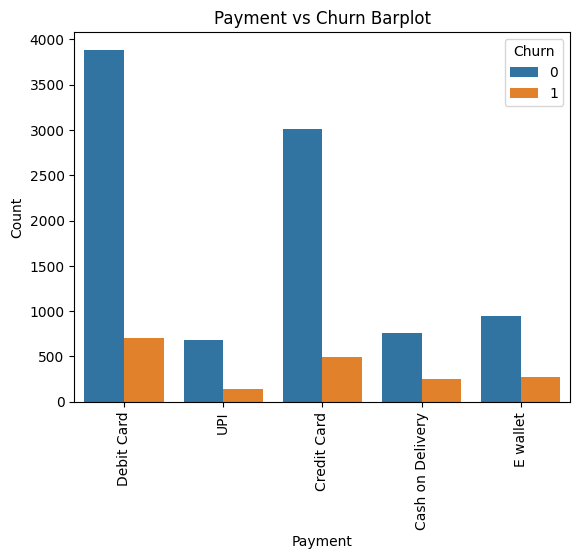

In [ ]:
sns.countplot(x='Payment', hue='Churn', data=new_df)
plt.title('Payment vs Churn Barplot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(new_df['Payment'], new_df['Churn'], normalize='index')
cross_tab

Churn                    0         1
Payment                             
Cash on Delivery  0.749507  0.250493
Credit Card       0.857875  0.142125
Debit Card        0.846959  0.153041
E wallet          0.773213  0.226787
UPI               0.826034  0.173966

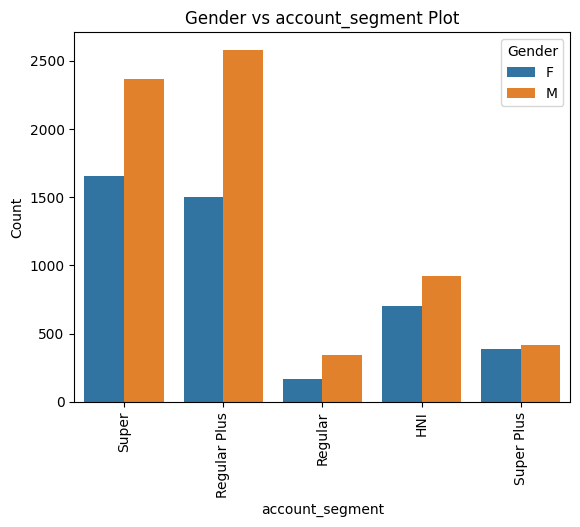

In [ ]:
sns.countplot(x='account_segment', hue='Gender', data=new_df)
plt.title('Gender vs account_segment Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

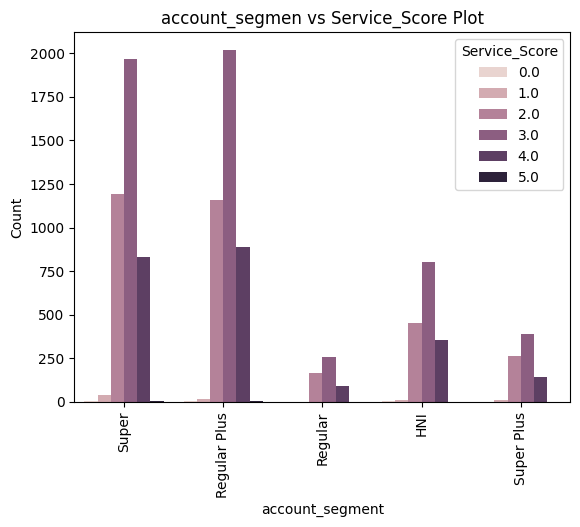

In [ ]:
sns.countplot(x='account_segment', hue='Service_Score', data=new_df)
plt.title('account_segmen vs Service_Score Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

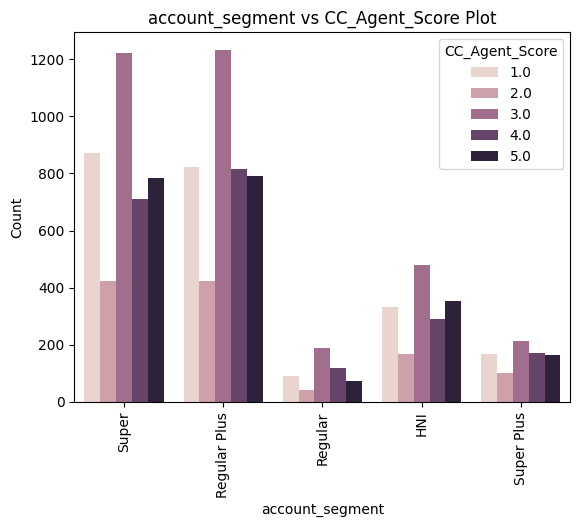

In [ ]:
sns.countplot(x='account_segment', hue='CC_Agent_Score', data=new_df)
plt.title('account_segment vs CC_Agent_Score Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

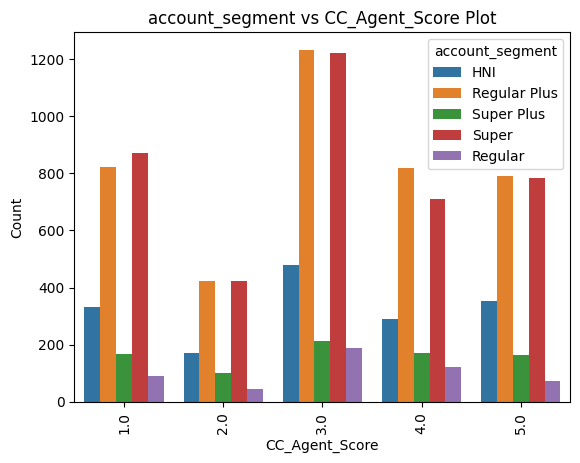

In [ ]:
sns.countplot(x='CC_Agent_Score', hue='account_segment', data=new_df)
plt.title('account_segment vs CC_Agent_Score Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

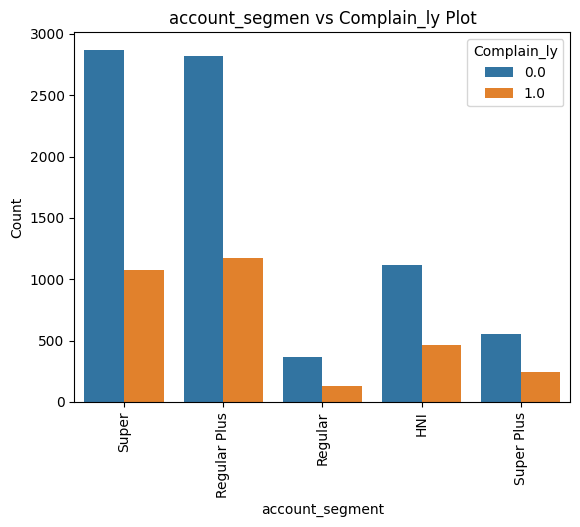

In [ ]:
sns.countplot(x='account_segment', hue='Complain_ly', data=new_df)
plt.title('account_segmen vs Complain_ly Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(new_df['account_segment'], new_df['Complain_ly'], normalize='index')
cross_tab

Complain_ly           0.0       1.0
account_segment                    
HNI              0.704617  0.295383
Regular          0.739394  0.260606
Regular Plus     0.706192  0.293808
Super            0.727503  0.272497
Super Plus       0.690955  0.309045

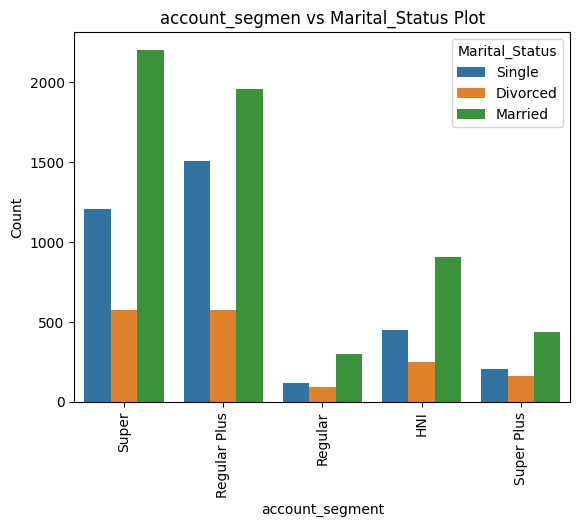

In [ ]:
sns.countplot(x='account_segment', hue='Marital_Status', data=new_df)
plt.title('account_segmen vs Marital_Status Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

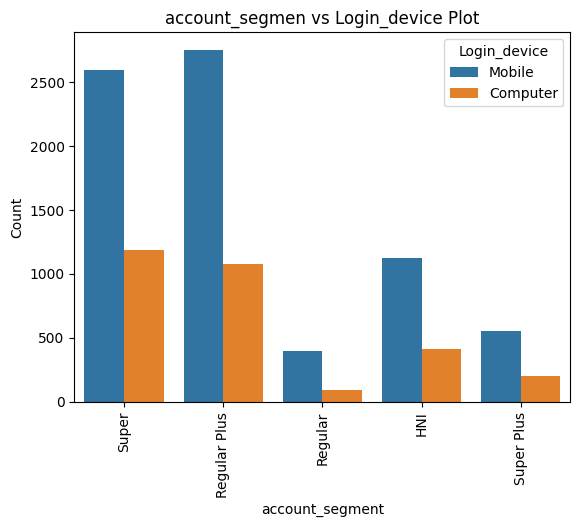

In [ ]:
sns.countplot(x='account_segment', hue='Login_device', data=new_df)
plt.title('account_segmen vs Login_device Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

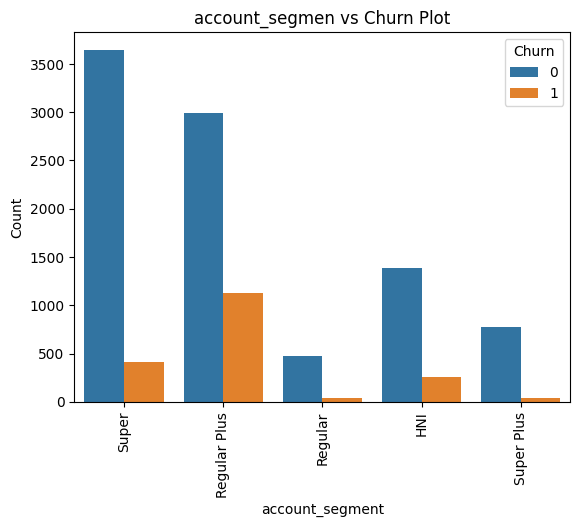

In [ ]:
sns.countplot(x='account_segment', hue='Churn', data=new_df)
plt.title('account_segmen vs Churn Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(new_df['account_segment'], new_df['Churn'], normalize='index')
cross_tab

Churn                   0         1
account_segment                    
HNI              0.844417  0.155583
Regular          0.923077  0.076923
Regular Plus     0.726722  0.273278
Super            0.897587  0.102413
Super Plus       0.951100  0.048900

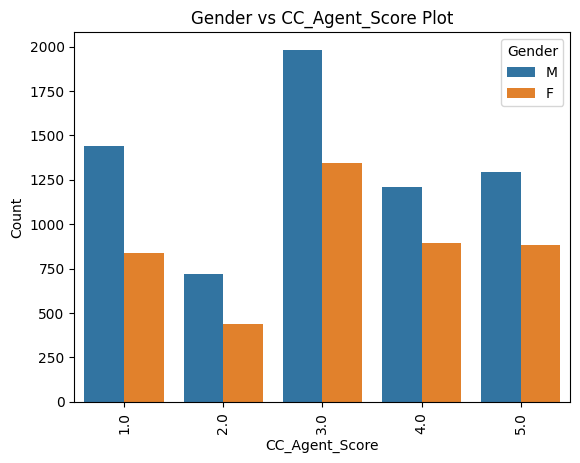

In [ ]:
sns.countplot(x='CC_Agent_Score', hue='Gender', data=new_df)
plt.title('Gender vs CC_Agent_Score Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

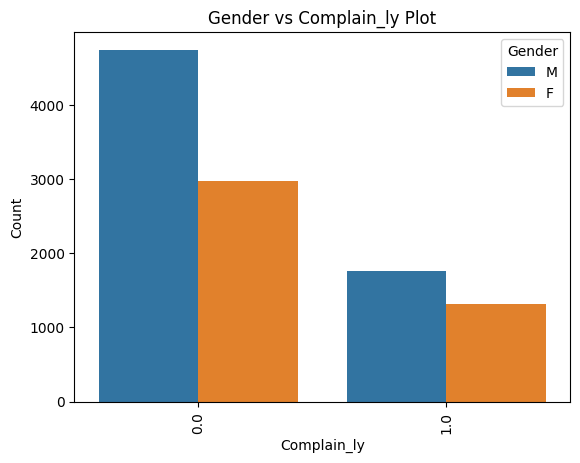

In [ ]:
sns.countplot(x='Complain_ly', hue='Gender', data=new_df)
plt.title('Gender vs Complain_ly Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(new_df['Gender'], new_df['Complain_ly'], normalize='index')
cross_tab

Complain_ly       0.0       1.0
Gender                         
F            0.692792  0.307208
M            0.729717  0.270283

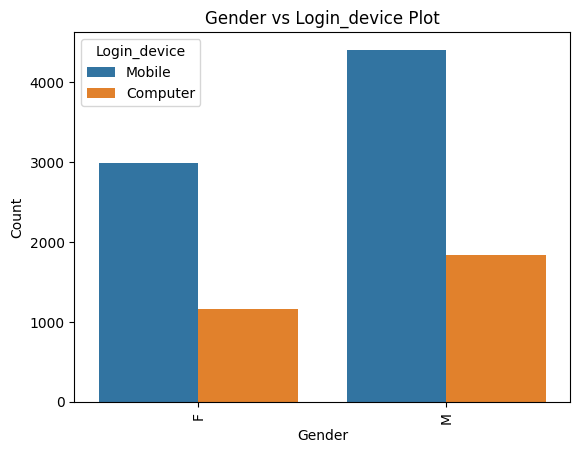

In [ ]:
sns.countplot(x='Gender', hue='Login_device', data=new_df)
plt.title('Gender vs Login_device Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

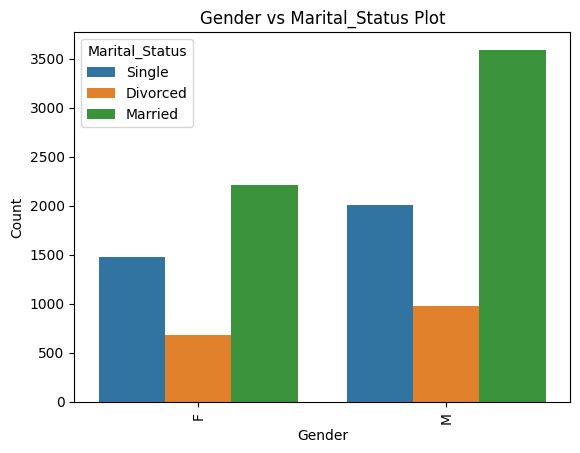

In [ ]:
sns.countplot(x='Gender', hue='Marital_Status', data=new_df)
plt.title('Gender vs Marital_Status Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

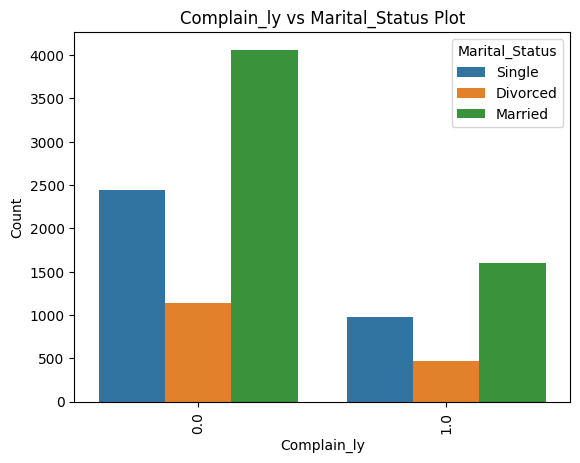

In [ ]:
sns.countplot(x='Complain_ly', hue='Marital_Status', data=new_df)
plt.title('Complain_ly vs Marital_Status Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

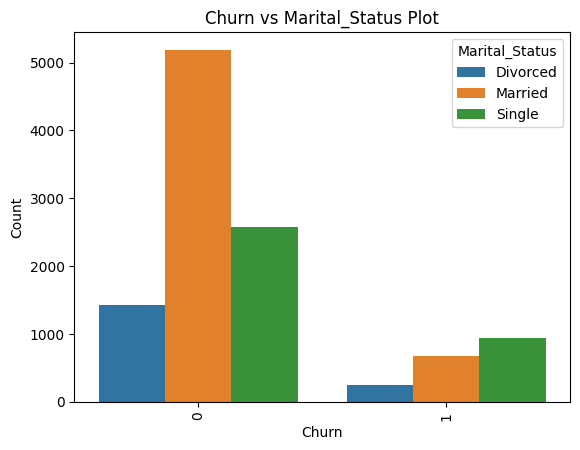

In [ ]:
sns.countplot(x='Churn', hue='Marital_Status', data=new_df)
plt.title('Churn vs Marital_Status Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

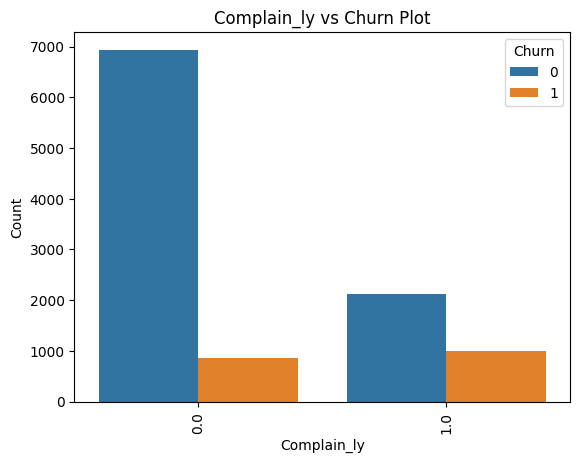

In [ ]:
sns.countplot(x='Complain_ly', hue='Churn', data=new_df)
plt.title('Complain_ly vs Churn Plot')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_tab = pd.crosstab(new_df['Churn'], new_df['Complain_ly'], normalize='index')
cross_tab

Complain_ly       0.0       1.0
Churn                          
0            0.765803  0.234197
1            0.462459  0.537541

#Bivariate Analysis for Categorical and Numerical

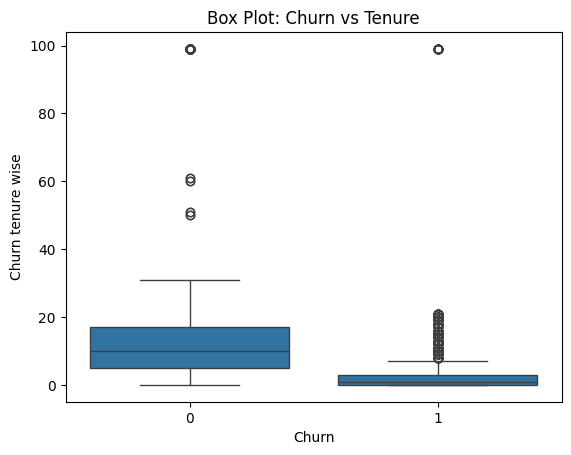

In [ ]:
sns.boxplot(x='Churn', y='Tenure', data=new_df)
plt.title('Box Plot: Churn vs Tenure')
plt.ylabel('Churn tenure wise')
plt.xlabel('Churn')
plt.show()

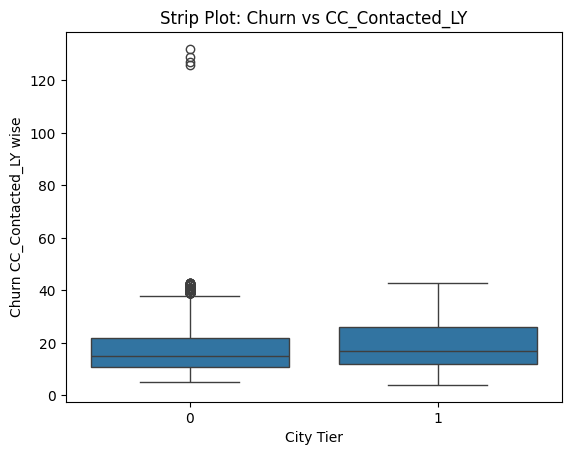

In [ ]:
sns.boxplot(x='Churn', y='CC_Contacted_LY', data=new_df)
plt.title('Strip Plot: Churn vs CC_Contacted_LY')
plt.ylabel('Churn CC_Contacted_LY wise')
plt.xlabel('City Tier')
plt.show()

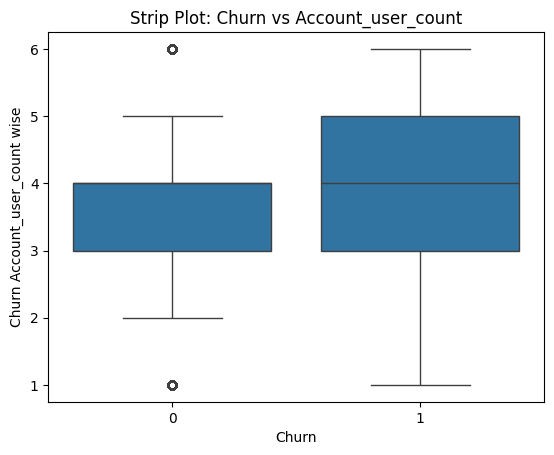

In [ ]:
sns.boxplot(x='Churn', y='Account_user_count', data=new_df)
plt.title('Strip Plot: Churn vs Account_user_count')
plt.ylabel('Churn Account_user_count wise')
plt.xlabel('Churn')
plt.show()

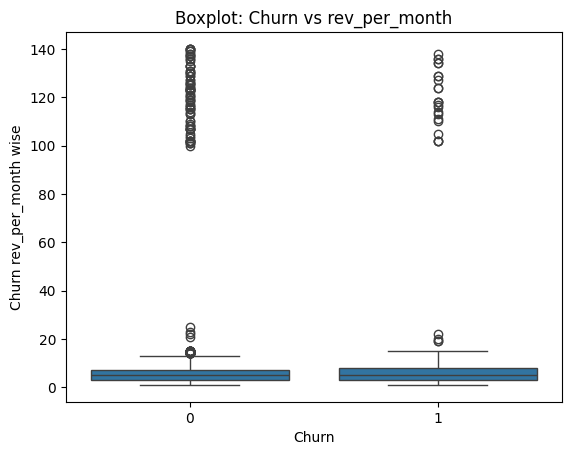

In [ ]:
sns.boxplot(x='Churn', y='rev_per_month', data=new_df)
plt.title('Boxplot: Churn vs rev_per_month')
plt.ylabel('Churn rev_per_month wise')
plt.xlabel('Churn')
plt.show()

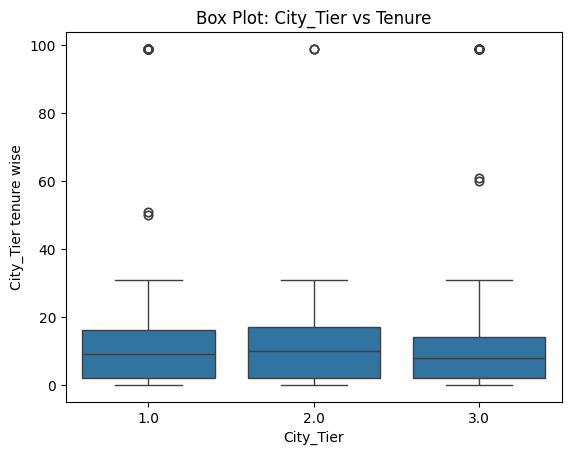

In [ ]:
sns.boxplot(x='City_Tier', y='Tenure', data=new_df)
plt.title('Box Plot: City_Tier vs Tenure')
plt.ylabel('City_Tier tenure wise')
plt.xlabel('City_Tier')
plt.show()

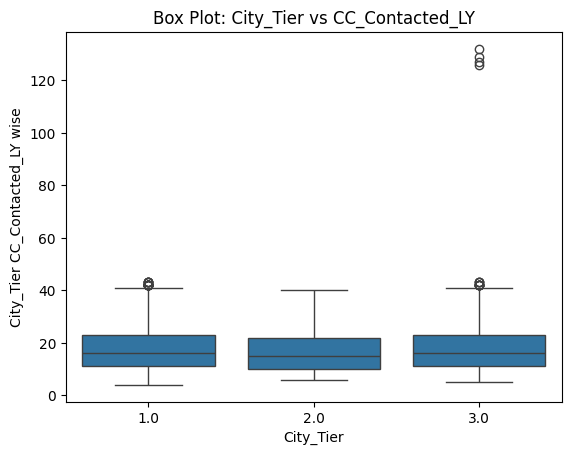

In [ ]:
sns.boxplot(x='City_Tier', y='CC_Contacted_LY', data=new_df)
plt.title('Box Plot: City_Tier vs CC_Contacted_LY')
plt.ylabel('City_Tier CC_Contacted_LY wise')
plt.xlabel('City_Tier')
plt.show()

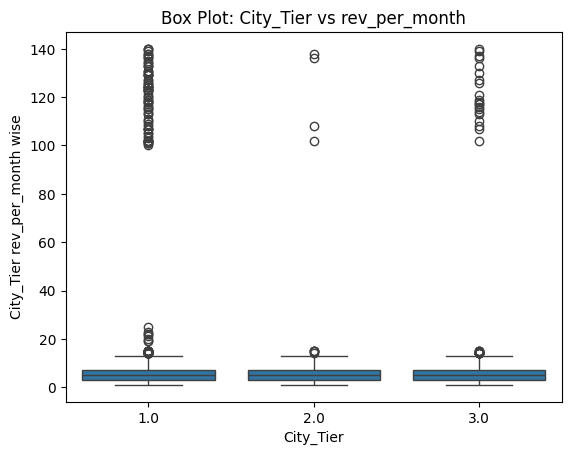

In [ ]:
sns.boxplot(x='City_Tier', y='rev_per_month', data=new_df)
plt.title('Box Plot: City_Tier vs rev_per_month')
plt.ylabel('City_Tier rev_per_month wise')
plt.xlabel('City_Tier')
plt.show()

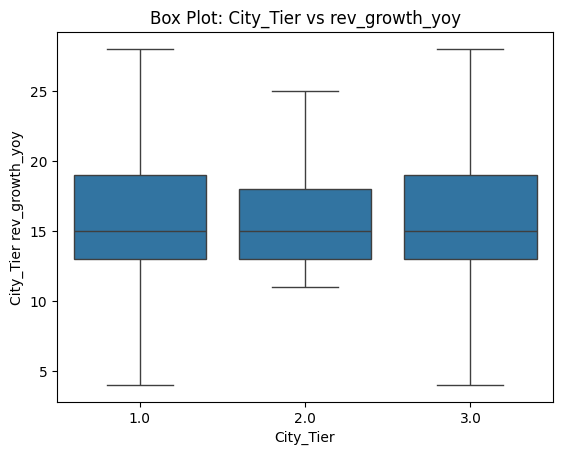

In [ ]:
sns.boxplot(x='City_Tier', y='rev_growth_yoy', data=new_df)
plt.title('Box Plot: City_Tier vs rev_growth_yoy')
plt.ylabel('City_Tier rev_growth_yoy')
plt.xlabel('City_Tier')
plt.show()

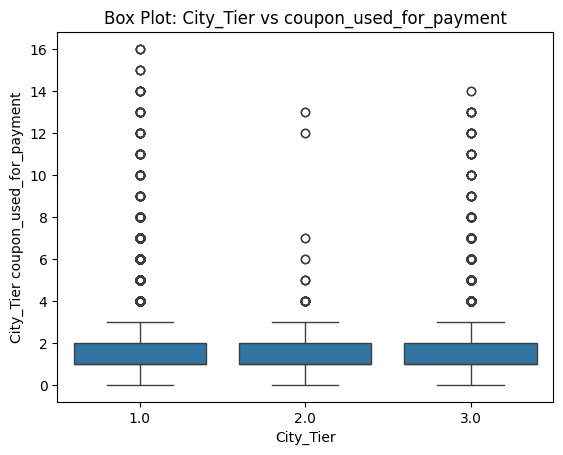

In [ ]:
sns.boxplot(x='City_Tier', y='coupon_used_for_payment', data=new_df)
plt.title('Box Plot: City_Tier vs coupon_used_for_payment')
plt.ylabel('City_Tier coupon_used_for_payment')
plt.xlabel('City_Tier')
plt.show()

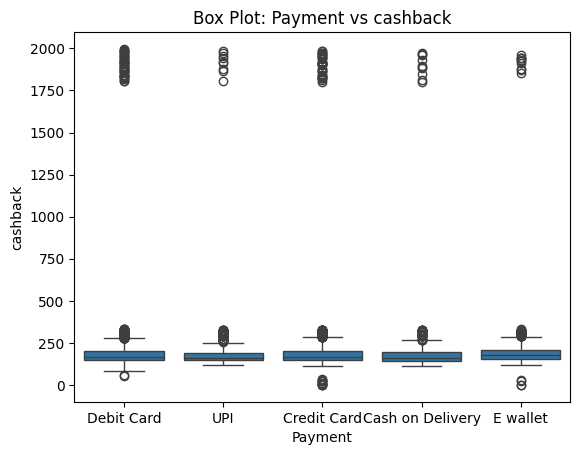

In [ ]:
sns.boxplot(x='Payment', y='cashback', data=new_df)
plt.title('Box Plot: Payment vs cashback')
plt.ylabel('cashback')
plt.xlabel('Payment')
plt.show()

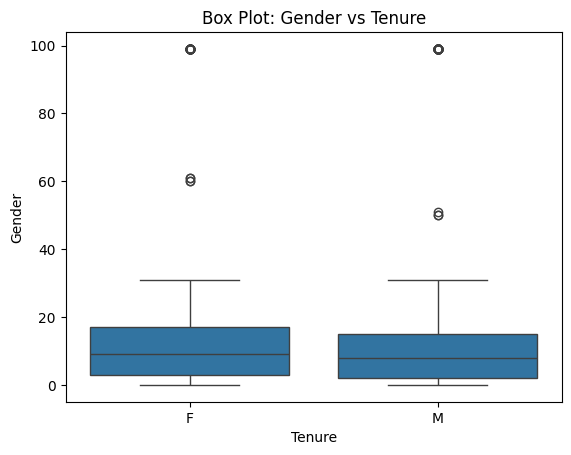

In [ ]:
sns.boxplot(x='Gender', y='Tenure', data=new_df)
plt.title('Box Plot: Gender vs Tenure')
plt.ylabel('Gender')
plt.xlabel('Tenure')
plt.show()

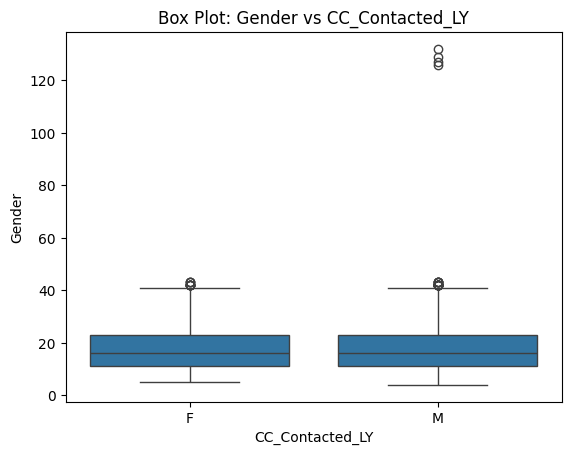

In [ ]:
sns.boxplot(x='Gender', y='CC_Contacted_LY', data=new_df)
plt.title('Box Plot: Gender vs CC_Contacted_LY')
plt.ylabel('Gender')
plt.xlabel('CC_Contacted_LY')
plt.show()

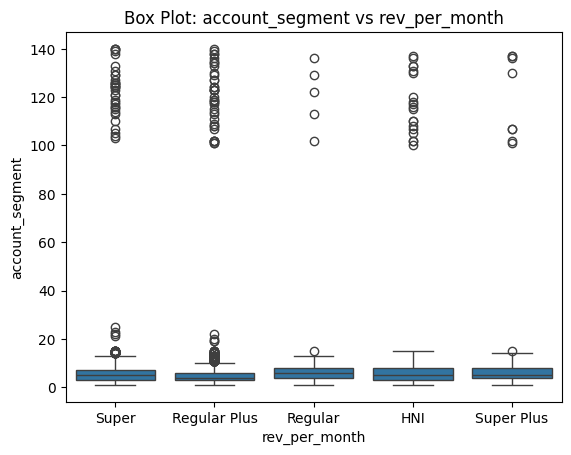

In [ ]:
sns.boxplot(x='account_segment', y='rev_per_month', data=new_df)
plt.title('Box Plot: account_segment vs rev_per_month')
plt.ylabel('account_segment')
plt.xlabel('rev_per_month')
plt.show()

In [ ]:
median_values = new_df.groupby('account_segment')['rev_per_month'].median()
median_values

account_segment
HNI             5.0
Regular         6.0
Regular Plus    4.0
Super           5.0
Super Plus      5.0
Name: rev_per_month, dtype: float64

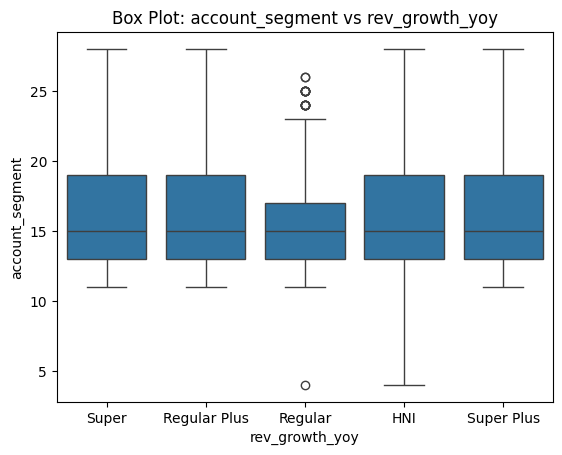

In [ ]:
sns.boxplot(x='account_segment', y='rev_growth_yoy', data=new_df)
plt.title('Box Plot: account_segment vs rev_growth_yoy')
plt.ylabel('account_segment')
plt.xlabel('rev_growth_yoy')
plt.show()

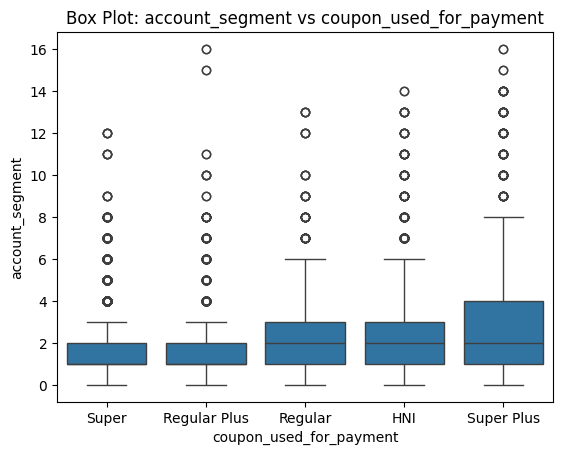

In [ ]:
sns.boxplot(x='account_segment', y='coupon_used_for_payment', data=new_df)
plt.title('Box Plot: account_segment vs coupon_used_for_payment')
plt.ylabel('account_segment')
plt.xlabel('coupon_used_for_payment')
plt.show()

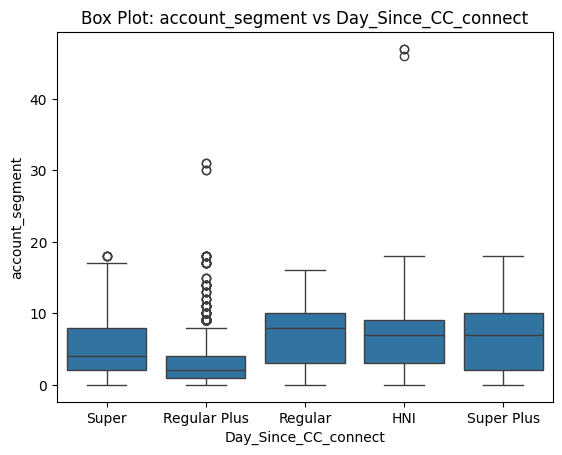

In [ ]:
sns.boxplot(x='account_segment', y='Day_Since_CC_connect', data=new_df)
plt.title('Box Plot: account_segment vs Day_Since_CC_connect')
plt.ylabel('account_segment')
plt.xlabel('Day_Since_CC_connect')
plt.show()

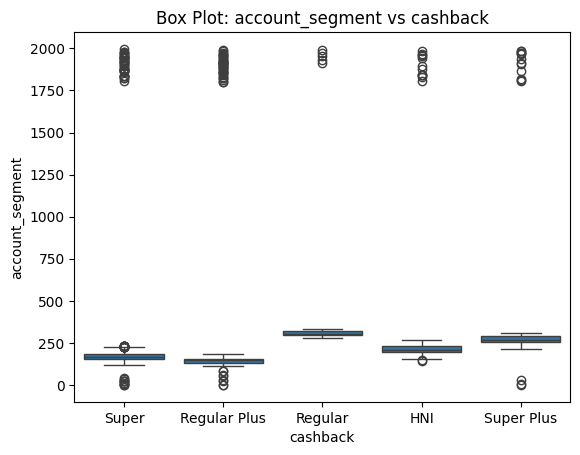

In [ ]:
sns.boxplot(x='account_segment', y='cashback', data=new_df)
plt.title('Box Plot: account_segment vs cashback')
plt.ylabel('account_segment')
plt.xlabel('cashback')
plt.show()

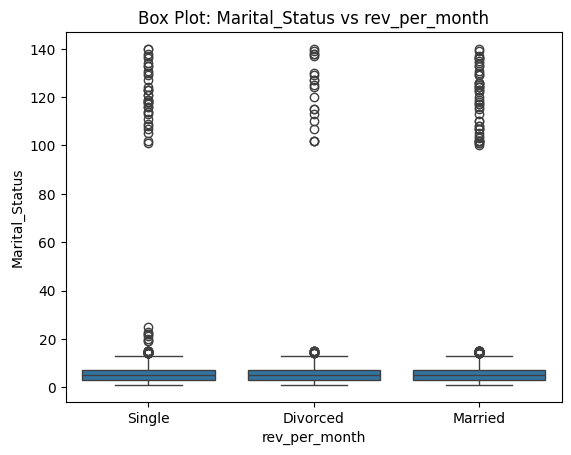

In [ ]:
sns.boxplot(x='Marital_Status', y='rev_per_month', data=new_df)
plt.title('Box Plot: Marital_Status vs rev_per_month')
plt.ylabel('Marital_Status')
plt.xlabel('rev_per_month')
plt.show()

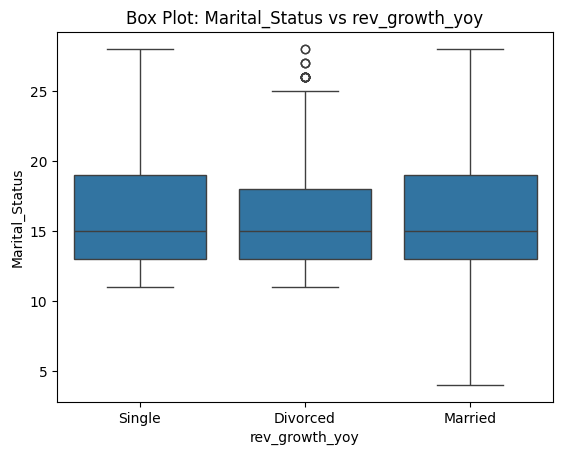

In [ ]:
sns.boxplot(x='Marital_Status', y='rev_growth_yoy', data=new_df)
plt.title('Box Plot: Marital_Status vs rev_growth_yoy')
plt.ylabel('Marital_Status')
plt.xlabel('rev_growth_yoy')
plt.show()

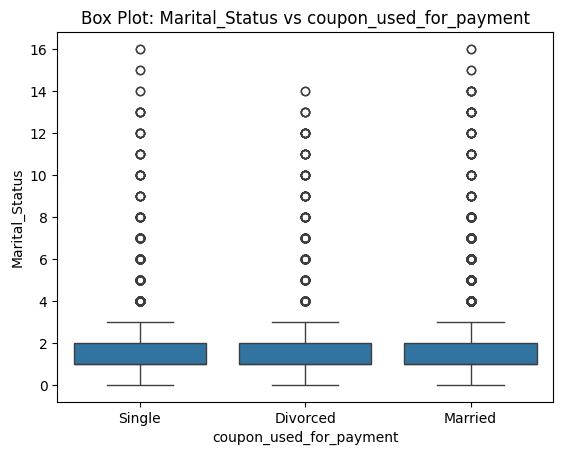

In [ ]:
sns.boxplot(x='Marital_Status', y='coupon_used_for_payment', data=new_df)
plt.title('Box Plot: Marital_Status vs coupon_used_for_payment')
plt.ylabel('Marital_Status')
plt.xlabel('coupon_used_for_payment')
plt.show()

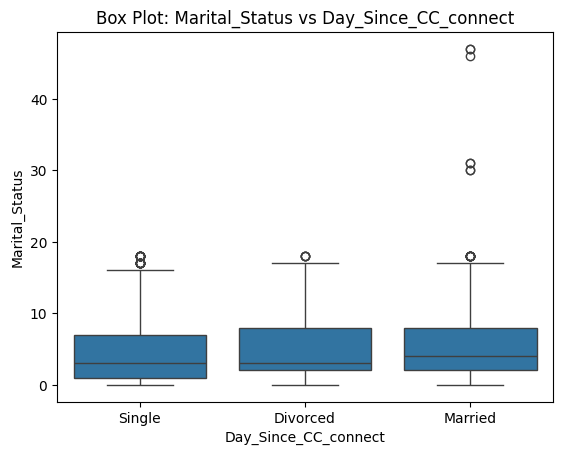

In [ ]:
sns.boxplot(x='Marital_Status', y='Day_Since_CC_connect', data=new_df)
plt.title('Box Plot: Marital_Status vs Day_Since_CC_connect')
plt.ylabel('Marital_Status')
plt.xlabel('Day_Since_CC_connect')
plt.show()

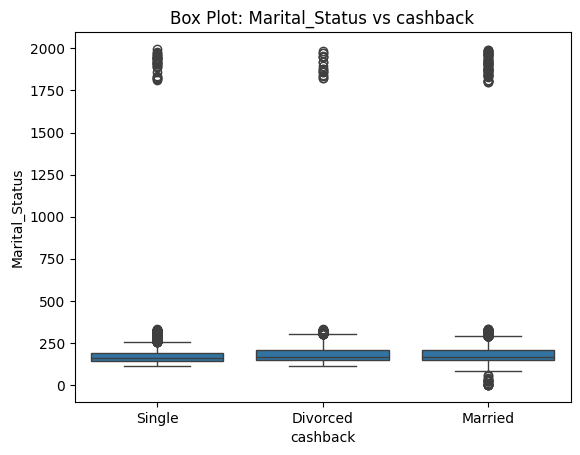

In [ ]:
sns.boxplot(x='Marital_Status', y='cashback', data=new_df)
plt.title('Box Plot: Marital_Status vs cashback')
plt.ylabel('Marital_Status')
plt.xlabel('cashback')
plt.show()

# Multivariate analysis

In [ ]:
lstnumericcolumns = new_df.select_dtypes(include=['number'])

In [ ]:
lstnumericcolumns.columns

Index(['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')

In [ ]:
correlation_matrix = lstnumericcolumns.corr()

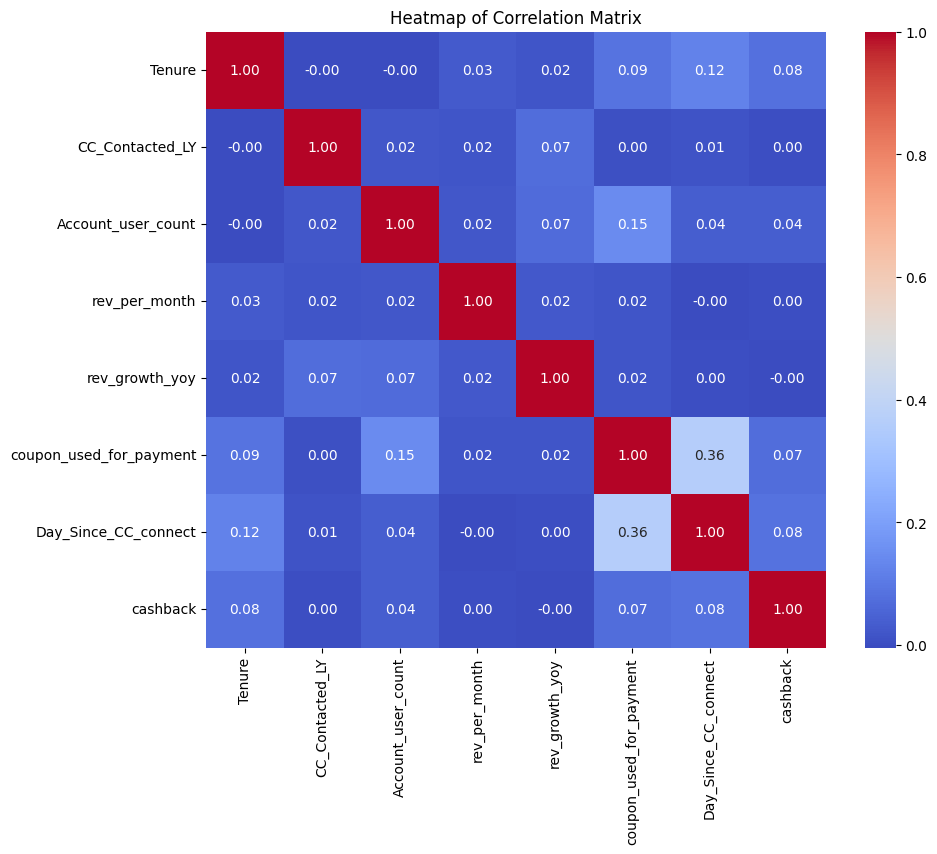

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap of Correlation Matrix')
plt.show()

#Missing values treatment

In [ ]:
new_df['Tenure'].fillna(new_df['Tenure'].median(), inplace=True)

In [ ]:
new_df['CC_Contacted_LY'].fillna(new_df['CC_Contacted_LY'].median(), inplace=True)

In [ ]:
new_df['Account_user_count'].fillna(new_df['Account_user_count'].median(), inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
new_df['rev_per_month'] = imputer.fit_transform(new_df[['rev_per_month']])

In [ ]:
#new_df['rev_per_month'].fillna(new_df['rev_per_month'].median(), inplace=True)

In [ ]:
new_df['rev_growth_yoy'].fillna(new_df['rev_growth_yoy'].median(), inplace=True)

In [ ]:
new_df['coupon_used_for_payment'].fillna(new_df['coupon_used_for_payment'].median(), inplace=True)

In [ ]:
new_df['Day_Since_CC_connect'].fillna(new_df['Day_Since_CC_connect'].median(), inplace=True)

In [ ]:
new_df['cashback'].fillna(new_df['cashback'].median(), inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  object 
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [ ]:
mode_value = new_df['City_Tier'].mode()[0]

In [ ]:
new_df['City_Tier'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = new_df['Payment'].mode()[0]
new_df['Payment'].fillna(mode_value, inplace=True)

In [ ]:
new_df['cashback'].fillna(new_df['cashback'].median(), inplace=True)

In [ ]:
new_df['Gender'].fillna(new_df['Gender'].mode()[0],inplace=True)

In [ ]:
new_df['Service_Score'].fillna(new_df['Service_Score'].mode()[0],inplace=True)

In [ ]:
new_df['account_segment'].fillna(new_df['account_segment'].mode()[0],inplace=True)

In [ ]:
new_df['CC_Agent_Score'].fillna(new_df['CC_Agent_Score'].mode()[0],inplace=True)

In [ ]:
new_df['Marital_Status'].fillna(new_df['Marital_Status'].mode()[0],inplace=True)

In [ ]:
new_df['Complain_ly'].fillna(new_df['Complain_ly'].mode()[0],inplace=True)

In [ ]:
new_df['Login_device'].fillna(new_df['Login_device'].mode()[0],inplace=True)

In [ ]:
new_df.describe().T

count        mean         std  min     25%     50%  \
Tenure                   11260.0   10.985879   12.757534  0.0    2.00    9.00   
City_Tier                11260.0    1.647425    0.912763  1.0    1.00    1.00   
CC_Contacted_LY          11260.0   17.850178    8.814851  4.0   11.00   16.00   
Service_Score            11260.0    2.903375    0.722476  0.0    2.00    3.00   
Account_user_count       11260.0    3.704973    1.004383  1.0    3.00    4.00   
CC_Agent_Score           11260.0    3.065808    1.372663  1.0    2.00    3.00   
rev_per_month            11260.0    6.362594   11.483711  1.0    3.00    5.00   
Complain_ly              11260.0    0.276288    0.447181  0.0    0.00    0.00   
rev_growth_yoy           11260.0   16.193073    3.757271  4.0   13.00   15.00   
coupon_used_for_payment  11260.0    1.790409    1.969331  0.0    1.00    1.00   
Day_Since_CC_connect     11260.0    4.581261    3.649643  0.0    2.00    3.00   
cashback                 11260.0  194.934722  174.977865  0.0  147.89  165.25   

                            75%     max  
Tenure                    16.00    99.0  
City_Tier                  3.00     3.0  
CC_Contacted_LY           23.00   132.0  
Service_Score              3.00     5.0  
Account_user_count         4.00     6.0  
CC_Agent_Score             4.00     5.0  
rev_per_month              7.00   140.0  
Complain_ly                1.00     1.0  
rev_growth_yoy            19.00    28.0  
coupon_used_for_payment    2.00    16.0  
Day_Since_CC_connect       7.00    47.0  
cashback                 197.31  1997.0

In [ ]:
new_df['City_Tier']=new_df['City_Tier'].astype('object')
new_df['Service_Score']=new_df['Service_Score'].astype('object')
new_df['CC_Agent_Score']=new_df['CC_Agent_Score'].astype('object')
new_df['Complain_ly']=new_df['Complain_ly'].astype('object')
#new_df['Churn']=new_df['Churn'].astype('object')

#Outliers check

In [ ]:
DF_indep = new_df.drop(['Churn'], axis=1)
DF_target = new_df['Churn']

In [ ]:
DF_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
11260 non-null  object
dtypes: object(1)
memory usage: 88.1+ KB


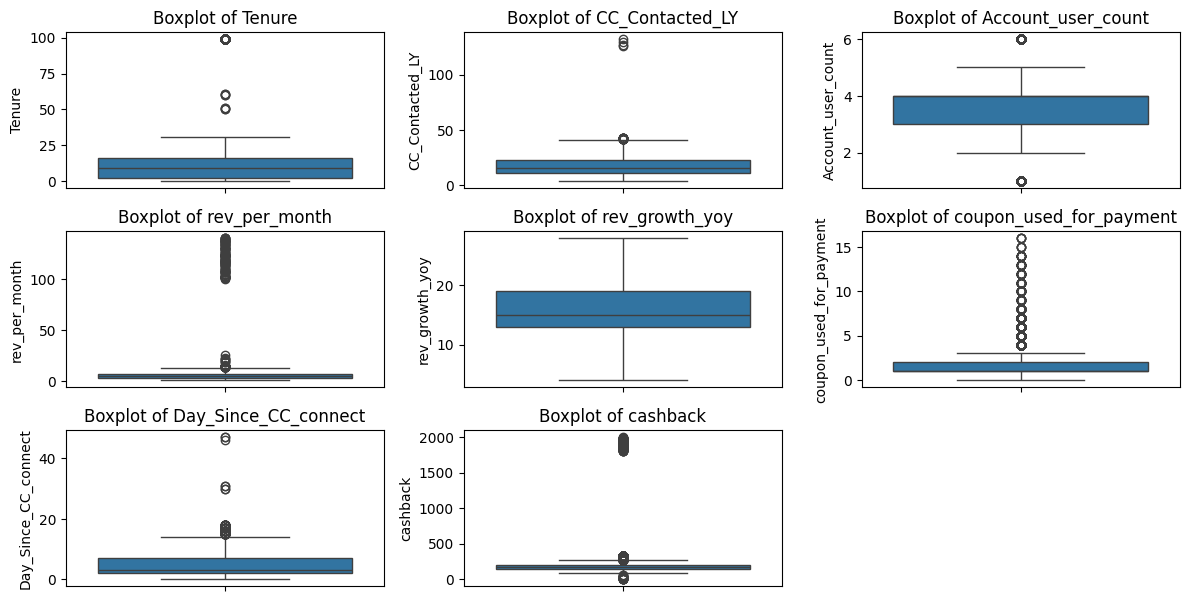

In [ ]:
cont=DF_indep.dtypes[(df.dtypes!='uint8') & (new_df.dtypes!='object')].index
plt.figure(figsize = (12,20))
#feature_list = DF.columns
for i in range(len(cont)):
    plt.subplot(10, 3, i + 1)
    sns.boxplot(y = new_df[cont[i]], data = new_df)
    plt.title('Boxplot of {}'.format(cont[i]))
    plt.tight_layout()

In [ ]:
DF_indep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  object 
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Service_Score            11260 non-null  object 
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  object 
 8   CC_Agent_Score           11260 non-null  object 
 9   Marital_Status           11260 non-null  object 
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  object 
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [ ]:
numeric_cols = DF_indep.select_dtypes(include=['number']).columns

In [ ]:
Q1 = DF_indep[numeric_cols].quantile(0.25)
Q3 = DF_indep[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# The count of outliers in each column
(( DF_indep[numeric_cols] < (Q1 - 1.5 * IQR)) | (DF_indep[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

Tenure                      139
CC_Contacted_LY              42
Account_user_count          761
rev_per_month               185
rev_growth_yoy                0
coupon_used_for_payment    1380
Day_Since_CC_connect        130
cashback                    986
dtype: int64

In [ ]:
DF_indep.describe()

Tenure  CC_Contacted_LY  Account_user_count  rev_per_month  \
count  11260.000000     11260.000000        11260.000000   11260.000000   
mean      10.985879        17.850178            3.704973       6.362594   
std       12.757534         8.814851            1.004383      11.483711   
min        0.000000         4.000000            1.000000       1.000000   
25%        2.000000        11.000000            3.000000       3.000000   
50%        9.000000        16.000000            4.000000       5.000000   
75%       16.000000        23.000000            4.000000       7.000000   
max       99.000000       132.000000            6.000000     140.000000   

       rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
count    11260.000000             11260.000000          11260.000000   
mean        16.193073                 1.790409              4.581261   
std          3.757271                 1.969331              3.649643   
min          4.000000                 0.000000              0.000000   
25%         13.000000                 1.000000              2.000000   
50%         15.000000                 1.000000              3.000000   
75%         19.000000                 2.000000              7.000000   
max         28.000000                16.000000             47.000000   

           cashback  
count  11260.000000  
mean     194.934722  
std      174.977865  
min        0.000000  
25%      147.890000  
50%      165.250000  
75%      197.310000  
max     1997.000000

In [ ]:
Q_3 = DF_indep['Tenure'].quantile(0.95)
Q_3

28.0

In [ ]:
Q_2 = DF_indep['Tenure'].quantile(0.75)
Q_2

16.0

In [ ]:
Q_3 = DF_indep['cashback'].quantile(0.95)
Q_3

295.871

In [ ]:
Q_2 = DF_indep['cashback'].quantile(0.75)
Q_2

197.31

In [ ]:
((DF_indep[numeric_cols] > (Q3 + 1.5 * IQR)) & (DF_indep[numeric_cols] < DF_indep[numeric_cols].quantile(0.95))).sum()

Tenure                       0
CC_Contacted_LY              0
Account_user_count           0
rev_per_month                0
rev_growth_yoy               0
coupon_used_for_payment    708
Day_Since_CC_connect         0
cashback                   403
dtype: int64

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in DF_indep[numeric_cols].columns:
    lr,ur=remove_outlier(DF_indep[column])
    DF_indep[column]=np.where(DF_indep[column]>ur,ur,DF_indep[column])
    DF_indep[column]=np.where(DF_indep[column]<lr,lr,DF_indep[column])

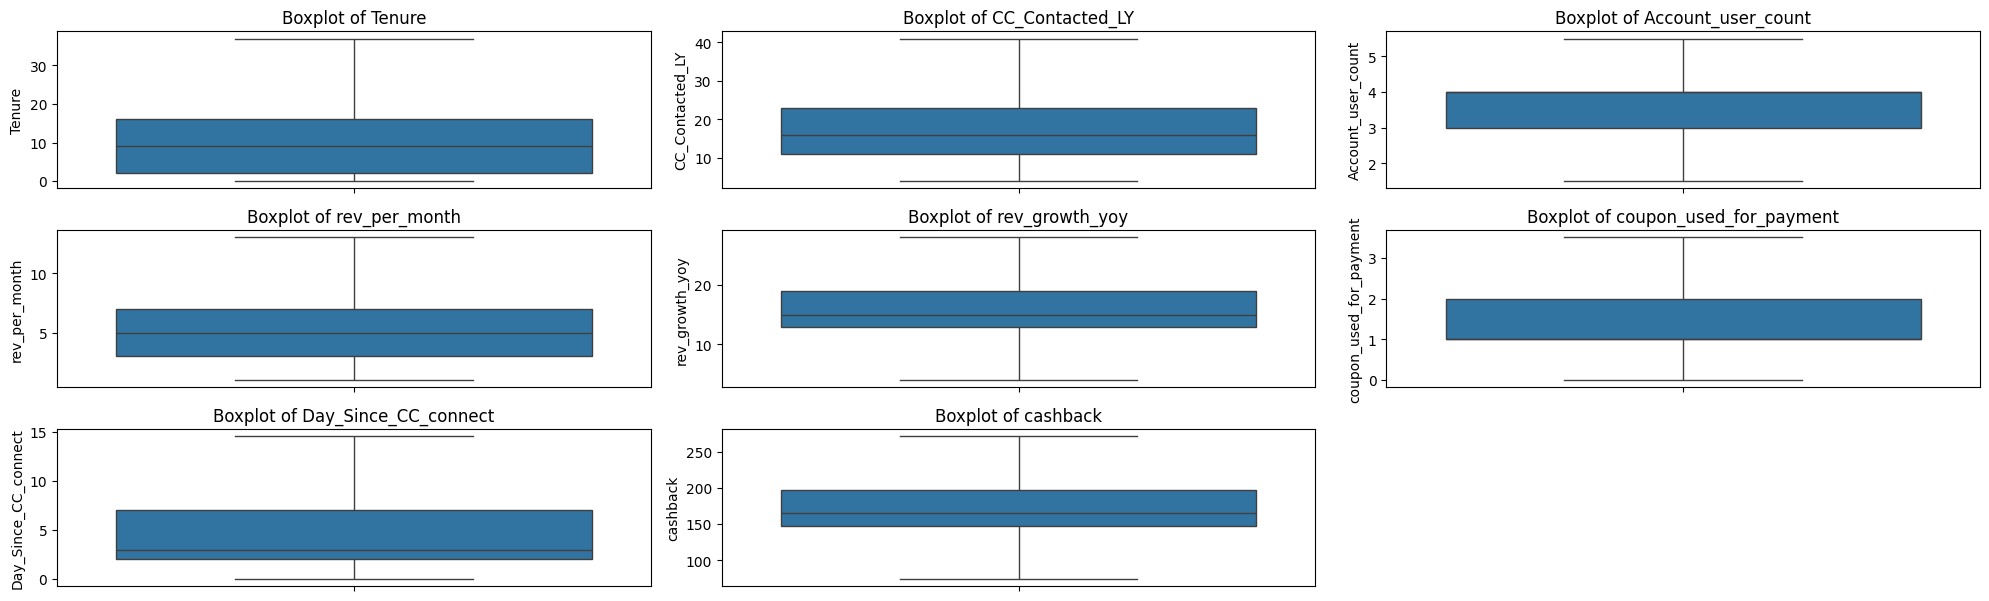

In [ ]:
#cont=DF.dtypes[(DF.dtypes!='uint8') & (DF.dtypes!='bool')].index
plt.figure(figsize = (20,20))
#feature_list = DF_Outliers.columns
for i in range(len(cont)):
    plt.subplot(10, 3, i + 1)
    sns.boxplot(y = DF_indep[cont[i]], data = DF_indep)
    plt.title('Boxplot of {}'.format(cont[i]))
    plt.tight_layout()

In [ ]:
DF_indep.describe()

Tenure  CC_Contacted_LY  Account_user_count  rev_per_month  \
count  11260.000000     11260.000000        11260.000000   11260.000000   
mean      10.251421        17.815009            3.710790       5.346520   
std        8.888905         8.564140            0.924278       2.892308   
min        0.000000         4.000000            1.500000       1.000000   
25%        2.000000        11.000000            3.000000       3.000000   
50%        9.000000        16.000000            4.000000       5.000000   
75%       16.000000        23.000000            4.000000       7.000000   
max       37.000000        41.000000            5.500000      13.000000   

       rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
count    11260.000000             11260.000000          11260.000000   
mean        16.193073                 1.475311              4.546270   
std          3.757271                 1.102248              3.493493   
min          4.000000                 0.000000              0.000000   
25%         13.000000                 1.000000              2.000000   
50%         15.000000                 1.000000              3.000000   
75%         19.000000                 2.000000              7.000000   
max         28.000000                 3.500000             14.500000   

           cashback  
count  11260.000000  
mean     177.284260  
std       43.573285  
min       73.760000  
25%      147.890000  
50%      165.250000  
75%      197.310000  
max      271.440000

In [ ]:
DF_indep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  object 
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Service_Score            11260 non-null  object 
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  object 
 8   CC_Agent_Score           11260 non-null  object 
 9   Marital_Status           11260 non-null  object 
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  object 
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [ ]:
class_distribution = df['Churn'].value_counts(normalize=True)*100
print(class_distribution)

Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_gender = LabelEncoder()
DF_indep['Gender'] = le_gender.fit_transform(DF_indep['Gender'])

In [ ]:
DF_indep['Gender'].value_counts()

Gender
1    6812
0    4448
Name: count, dtype: int64

In [ ]:
DF_indep['account_segment']=np.where(DF_indep['account_segment'] =='Regular', '1', DF_indep['account_segment'])
DF_indep['account_segment']=np.where(DF_indep['account_segment'] =='Regular Plus', '2', DF_indep['account_segment'])
DF_indep['account_segment']=np.where(DF_indep['account_segment'] =='Super', '3', DF_indep['account_segment'])
DF_indep['account_segment']=np.where(DF_indep['account_segment'] =='Super Plus', '4', DF_indep['account_segment'])
DF_indep['account_segment']=np.where(DF_indep['account_segment'] =='HNI', '5', DF_indep['account_segment'])

In [ ]:
DF_indep['account_segment'].value_counts()

account_segment
2    4221
3    4062
5    1639
4     818
1     520
Name: count, dtype: int64

In [ ]:
DF_indep = pd.get_dummies(DF_indep, columns=['Payment', 'Marital_Status'])

In [ ]:
#new_df = new_df.astype(int)

In [ ]:
DF_indep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    11260 non-null  float64
 1   City_Tier                 11260 non-null  object 
 2   CC_Contacted_LY           11260 non-null  float64
 3   Gender                    11260 non-null  int64  
 4   Service_Score             11260 non-null  object 
 5   Account_user_count        11260 non-null  float64
 6   account_segment           11260 non-null  object 
 7   CC_Agent_Score            11260 non-null  object 
 8   rev_per_month             11260 non-null  float64
 9   Complain_ly               11260 non-null  object 
 10  rev_growth_yoy            11260 non-null  float64
 11  coupon_used_for_payment   11260 non-null  float64
 12  Day_Since_CC_connect      11260 non-null  float64
 13  cashback                  11260 non-null  float64
 14  Login_

In [ ]:
le_gender = LabelEncoder()
DF_indep['Login_device'] = le_gender.fit_transform(DF_indep['Login_device'])

In [ ]:
DF_indep = DF_indep.astype(int)

In [ ]:
DF_indep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Tenure                    11260 non-null  int64
 1   City_Tier                 11260 non-null  int64
 2   CC_Contacted_LY           11260 non-null  int64
 3   Gender                    11260 non-null  int64
 4   Service_Score             11260 non-null  int64
 5   Account_user_count        11260 non-null  int64
 6   account_segment           11260 non-null  int64
 7   CC_Agent_Score            11260 non-null  int64
 8   rev_per_month             11260 non-null  int64
 9   Complain_ly               11260 non-null  int64
 10  rev_growth_yoy            11260 non-null  int64
 11  coupon_used_for_payment   11260 non-null  int64
 12  Day_Since_CC_connect      11260 non-null  int64
 13  cashback                  11260 non-null  int64
 14  Login_device              11260 non-nu

In [ ]:
DF_indep.head(5)

Tenure  City_Tier  CC_Contacted_LY  Gender  Service_Score  \
0       4          3                6       0              3   
1       0          1                8       1              3   
2       0          1               30       1              2   
3       0          3               15       1              2   
4       0          1               12       1              2   

   Account_user_count  account_segment  CC_Agent_Score  rev_per_month  \
0                   3                3               2              9   
1                   4                2               3              7   
2                   4                2               3              6   
3                   4                3               5              8   
4                   3                2               5              3   

   Complain_ly  ...  cashback  Login_device  Payment_Cash on Delivery  \
0            1  ...       159             1                         0   
1            1  ...       120             1                         0   
2            1  ...       165             1                         0   
3            0  ...       134             1                         0   
4            0  ...       129             1                         0   

   Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
0                    0                   1                 0            0   
1                    0                   0                 0            1   
2                    0                   1                 0            0   
3                    0                   1                 0            0   
4                    1                   0                 0            0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  
0                        0                       0                      1  
1                        0                       0                      1  
2                        0                       0                      1  
3                        0                       0                      1  
4                        0                       0                      1  

[5 rows x 23 columns]

In [ ]:
X = DF_indep

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Standardizing the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_scaled.head(5)

0         1         2         3         4         5         6   \
0 -0.703315  1.481914 -1.379652 -1.237528  0.133748 -0.710671  0.094301   
1 -1.153334 -0.709334 -1.146110  0.808063  0.133748  0.339067 -0.817139   
2 -1.153334 -0.709334  1.422855  0.808063 -1.250443  0.339067 -0.817139   
3 -1.153334  1.481914 -0.328712  0.808063 -1.250443  0.339067  0.094301   
4 -1.153334 -0.709334 -0.679025  0.808063 -1.250443 -0.710671 -0.817139   

         7         8         9   ...        13        14        15        16  \
0 -0.776488  1.275330  1.618461  ... -0.408571  0.605123 -0.314588 -0.673120   
1 -0.047944  0.582018  1.618461  ... -1.303484  0.605123 -0.314588 -0.673120   
2 -0.047944  0.235363  1.618461  ... -0.270893  0.605123 -0.314588 -0.673120   
3  1.409143  0.928674 -0.617871  ... -0.982233  0.605123 -0.314588 -0.673120   
4  1.409143 -0.804605 -0.617871  ... -1.096966  0.605123 -0.314588  1.485619   

         17        18        19        20        21        22  
0  1.182280 -0.348108 -0.280626 -0.417007 -1.081847  1.482857  
1 -0.845824 -0.348108  3.563467 -0.417007 -1.081847  1.482857  
2  1.182280 -0.348108 -0.280626 -0.417007 -1.081847  1.482857  
3  1.182280 -0.348108 -0.280626 -0.417007 -1.081847  1.482857  
4 -0.845824 -0.348108 -0.280626 -0.417007 -1.081847  1.482857  

[5 rows x 23 columns]

#K-Means Clustering

In [ ]:
wss =[]

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(X_scaled)
    wss.append(KM.inertia_)

In [ ]:
wss

[258980.0,
 246356.4970397841,
 227948.69531052856,
 213690.9766442784,
 204488.6953294326,
 196035.8656451921,
 190766.8924983065,
 183745.39689919807,
 179144.56627517202,
 169571.50007504848]

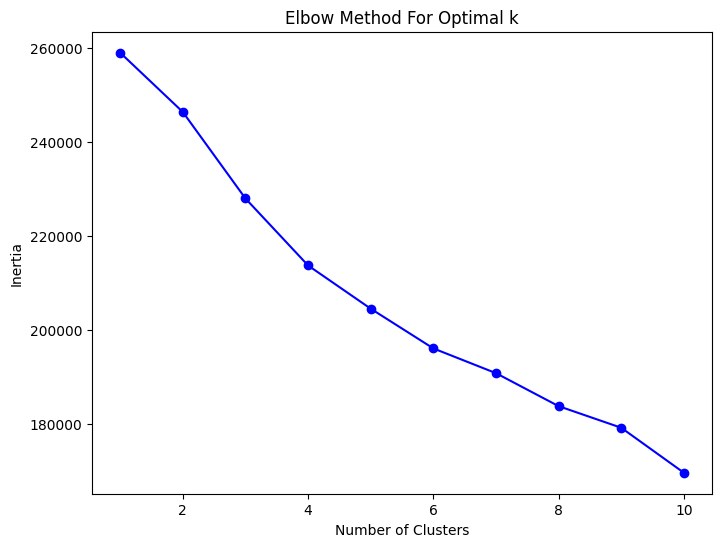

In [ ]:
# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(1,10):

    # initialize K means
    kmeans=KMeans(n_clusters=i+1,random_state=1)
    kmeans.fit(X_scaled)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(X_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i+1, silhouette_avg))

For n_clusters=2, the silhouette score is 0.12226678661599831
For n_clusters=3, the silhouette score is 0.09314188207520971
For n_clusters=4, the silhouette score is 0.10700011262408923
For n_clusters=5, the silhouette score is 0.09101033350080888
For n_clusters=6, the silhouette score is 0.09675032675092299
For n_clusters=7, the silhouette score is 0.09747965794622465
For n_clusters=8, the silhouette score is 0.09169047977709423
For n_clusters=9, the silhouette score is 0.09743020769485304
For n_clusters=10, the silhouette score is 0.11064100513733281


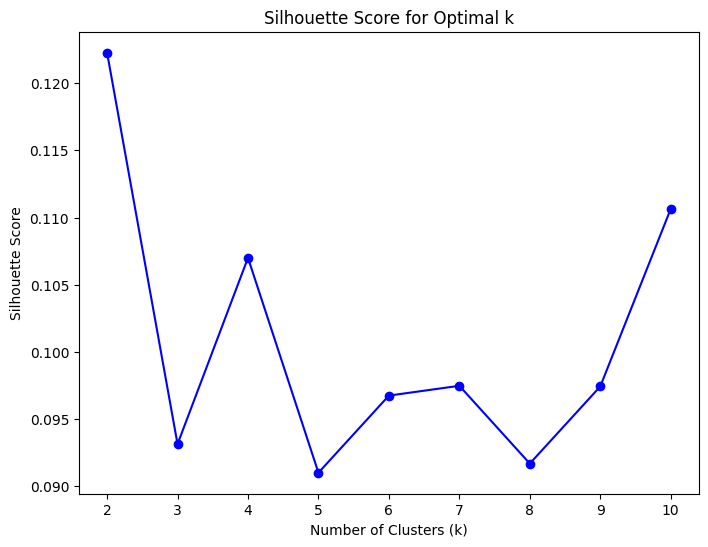

In [ ]:
silhouette_scores = []
K = range(2, 11)  # Starting from 2 clusters because silhouette score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores for each number of clusters
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [ ]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(X_scaled)
labels = k_means.labels_

In [ ]:
k_means.inertia_

213690.9766442784

In [ ]:
# Calculating silhouette_score
silhouette_score(X_scaled,labels,random_state=1)

0.10700011262408923

In [ ]:
df_temp = pd.DataFrame(X_scaled)

In [ ]:
DF_indep.shape

(11260, 23)

In [ ]:
df_temp.shape

(11260, 23)

In [ ]:
df_temp["Cluster"] = labels
df_temp.head()

0         1         2         3         4         5         6  \
0 -0.703315  1.481914 -1.379652 -1.237528  0.133748 -0.710671  0.094301   
1 -1.153334 -0.709334 -1.146110  0.808063  0.133748  0.339067 -0.817139   
2 -1.153334 -0.709334  1.422855  0.808063 -1.250443  0.339067 -0.817139   
3 -1.153334  1.481914 -0.328712  0.808063 -1.250443  0.339067  0.094301   
4 -1.153334 -0.709334 -0.679025  0.808063 -1.250443 -0.710671 -0.817139   

          7         8         9  ...        14        15        16        17  \
0 -0.776488  1.275330  1.618461  ...  0.605123 -0.314588 -0.673120  1.182280   
1 -0.047944  0.582018  1.618461  ...  0.605123 -0.314588 -0.673120 -0.845824   
2 -0.047944  0.235363  1.618461  ...  0.605123 -0.314588 -0.673120  1.182280   
3  1.409143  0.928674 -0.617871  ...  0.605123 -0.314588 -0.673120  1.182280   
4  1.409143 -0.804605 -0.617871  ...  0.605123 -0.314588  1.485619 -0.845824   

         18        19        20        21        22  Cluster  
0 -0.348108 -0.280626 -0.417007 -1.081847  1.482857        2  
1 -0.348108  3.563467 -0.417007 -1.081847  1.482857        0  
2 -0.348108 -0.280626 -0.417007 -1.081847  1.482857        2  
3 -0.348108 -0.280626 -0.417007 -1.081847  1.482857        2  
4 -0.348108 -0.280626 -0.417007 -1.081847  1.482857        2  

[5 rows x 24 columns]

In [ ]:
DF_combined = pd.concat([df_temp, DF_target.reset_index(drop=True)], axis=1)

In [ ]:
clust_profile=DF_combined.groupby('Cluster').mean()
clust_profile['freq']=DF_combined.Cluster.value_counts().sort_index()
clust_profile

0         1         2         3         4         5         6  \
Cluster                                                                         
0       -0.149961 -0.109540 -0.024425  0.151085 -0.096951  0.045345 -0.174031   
1        0.079322 -0.218453  0.001320  0.041746  0.041412 -0.058668  0.020340   
2       -0.072462 -0.142430 -0.025742 -0.056941 -0.032844  0.034926 -0.079771   
3        0.037072  1.460307  0.102200 -0.069339  0.014323  0.082886  0.317480   

                7         8         9  ...        15        16        17  \
Cluster                                ...                                 
0        0.026506  0.029140  0.064999  ... -0.314588 -0.673120 -0.845824   
1       -0.040091  0.013283 -0.012511  ...  0.055564  0.169390  0.175859   
2        0.026366 -0.009568 -0.006309  ...  0.085557  0.125373  0.199799   
3        0.050831 -0.039512  0.028956  ... -0.314588 -0.673120 -0.845824   

               18        19        20        21        22     Churn  freq  
Cluster                                                                    
0       -0.348108  3.563467 -0.040298  0.126261 -0.104886  0.173966   822  
1       -0.348108 -0.280626 -0.417007  0.924345 -0.674374  0.107993  4917  
2       -0.348108 -0.280626  0.464003 -1.081847  0.807720  0.219796  4304  
3        2.872675 -0.280626  0.071058  0.006145 -0.061061  0.226787  1217  

[4 rows x 25 columns]

In [ ]:
DF_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        11260 non-null  float64
 1   1        11260 non-null  float64
 2   2        11260 non-null  float64
 3   3        11260 non-null  float64
 4   4        11260 non-null  float64
 5   5        11260 non-null  float64
 6   6        11260 non-null  float64
 7   7        11260 non-null  float64
 8   8        11260 non-null  float64
 9   9        11260 non-null  float64
 10  10       11260 non-null  float64
 11  11       11260 non-null  float64
 12  12       11260 non-null  float64
 13  13       11260 non-null  float64
 14  14       11260 non-null  float64
 15  15       11260 non-null  float64
 16  16       11260 non-null  float64
 17  17       11260 non-null  float64
 18  18       11260 non-null  float64
 19  19       11260 non-null  float64
 20  20       11260 non-null  float64
 21  21       112

In [ ]:
churn_by_cluster = DF_combined.groupby('Cluster')['Churn'].mean()

In [ ]:
print(churn_by_cluster)

Cluster
0    0.173966
1    0.107993
2    0.219796
3    0.226787
Name: Churn, dtype: object


##Model Building

#Split the dataset into Train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_indep,DF_target,test_size=0.30, random_state=1, stratify=DF_target)

In [ ]:
X_train.shape

(7882, 23)

In [ ]:
y_train.shape

(7882,)

In [ ]:
X_train.head()

Tenure  City_Tier  CC_Contacted_LY  Gender  Service_Score  \
799        8          1               12       1              3   
7530       2          3               19       1              2   
6908      12          3               26       1              3   
3251      26          3               10       1              3   
5553       1          3               16       1              3   

      Account_user_count  account_segment  CC_Agent_Score  rev_per_month  \
799                    3                2               3              1   
7530                   3                2               4              3   
6908                   3                4               5              5   
3251                   4                4               5              6   
5553                   4                3               1              3   

      Complain_ly  ...  cashback  Login_device  Payment_Cash on Delivery  \
799             1  ...       135             1                         0   
7530            0  ...       125             1                         0   
6908            0  ...       239             1                         0   
3251            0  ...       271             1                         0   
5553            0  ...       166             1                         0   

      Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
799                     0                   1                 0            0   
7530                    0                   0                 1            0   
6908                    0                   0                 1            0   
3251                    0                   0                 1            0   
5553                    0                   0                 1            0   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  
799                         1                       0                      0  
7530                        0                       1                      0  
6908                        0                       0                      1  
3251                        1                       0                      0  
5553                        0                       0                      1  

[5 rows x 23 columns]

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7882, 23)
Shape of test set :  (3378, 23)
Percentage of classes in training set:
Churn
0    0.831642
1    0.168358
Name: proportion, dtype: float64
Percentage of classes in test set:
Churn
0    0.831557
1    0.168443
Name: proportion, dtype: float64


In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [ ]:
# Fit the encoder to your target variable and transform it
y_train = label_encoder.fit_transform(y_train)

In [ ]:
y_train = y_train.astype('int64')

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy= .75)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (11471, 23)
Shape of test set :  (3378, 23)
Percentage of classes in training set:
0    0.571441
1    0.428559
Name: proportion, dtype: float64
Percentage of classes in test set:
Churn
0    0.831557
1    0.168443
Name: proportion, dtype: float64


In [ ]:
X_train.head()

Tenure  City_Tier  CC_Contacted_LY  Gender  Service_Score  \
0       8          1               12       1              3   
1       2          3               19       1              2   
2      12          3               26       1              3   
3      26          3               10       1              3   
4       1          3               16       1              3   

   Account_user_count  account_segment  CC_Agent_Score  rev_per_month  \
0                   3                2               3              1   
1                   3                2               4              3   
2                   3                4               5              5   
3                   4                4               5              6   
4                   4                3               1              3   

   Complain_ly  ...  cashback  Login_device  Payment_Cash on Delivery  \
0            1  ...       135             1                         0   
1            0  ...       125             1                         0   
2            0  ...       239             1                         0   
3            0  ...       271             1                         0   
4            0  ...       166             1                         0   

   Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
0                    0                   1                 0            0   
1                    0                   0                 1            0   
2                    0                   0                 1            0   
3                    0                   0                 1            0   
4                    0                   0                 1            0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  
0                        1                       0                      0  
1                        0                       1                      0  
2                        0                       0                      1  
3                        1                       0                      0  
4                        0                       0                      1  

[5 rows x 23 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
feature_names = X_train.columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_names)
    ]
)

In [ ]:
# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
# Standardizing the data
#scaler = StandardScaler()
X_train = pipeline.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(X_train, columns=feature_names)

In [ ]:
X_test = pipeline.transform(X_test)

In [ ]:
X_test = pd.DataFrame(X_test, columns=feature_names)

In [ ]:
# Inspect unique values
print(np.unique(y_train))

[0 1]


##Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=2)

In [ ]:
LR.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='newton-cg',
                   verbose=True)

##Predicting on Training and Test dataset

In [ ]:
ytrain_predict = LR.predict(X_train)
ytest_predict = LR.predict(X_test)

In [ ]:
ytest_predict_prob=LR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.954121  0.045879
1  0.983135  0.016865
2  0.798444  0.201556
3  0.964924  0.035076
4  0.501997  0.498003

In [ ]:
# Accuracy - Training Data
LR.score(X_train, y_train)

0.8768198064684858

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

AUC: 0.937


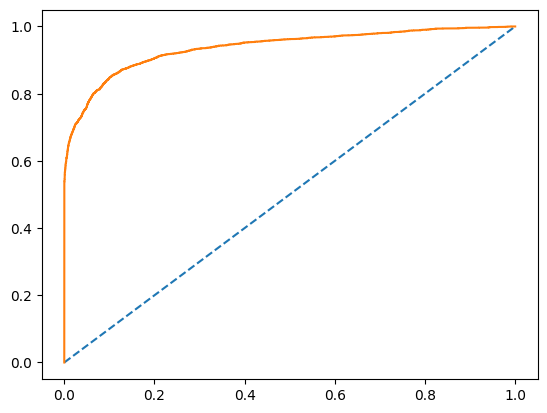

In [ ]:
# predict probabilities
probs = LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

ROC map confirm that there seems to be overlap between the data. It is away from the axis.

The AUC of the probability of 1 is 0.937

In [ ]:
# Convert y_test to numeric, handling errors by coercing to NaN
y_test = pd.to_numeric(y_test, errors='coerce')

In [ ]:
#y_test = y_test.fillna(y_test.mode()[0])

In [ ]:
# Convert y_test to integers (0 and 1)
y_test = y_test.astype(int)

In [ ]:
# Accuracy - Test Data
LR.score(X_test, y_test)

0.872113676731794

AUC: 0.937


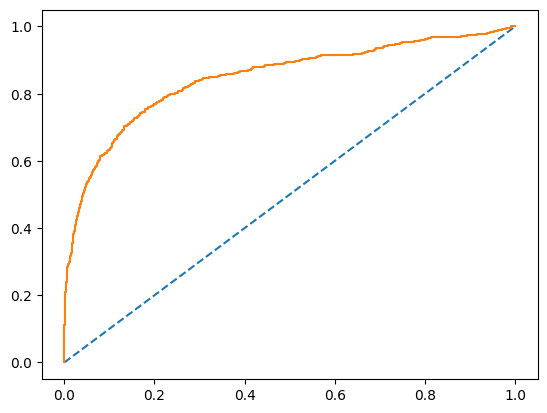

In [ ]:
# predict probabilities
probs = LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Confusion Matrix for the training data

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[6075,  480],
       [ 933, 3983]])

In [ ]:
cm = confusion_matrix(y_train, ytrain_predict)

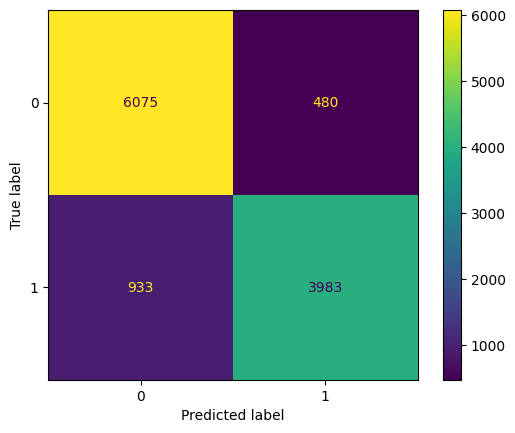

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6555
           1       0.89      0.81      0.85      4916

    accuracy                           0.88     11471
   macro avg       0.88      0.87      0.87     11471
weighted avg       0.88      0.88      0.88     11471



In [ ]:
cm=confusion_matrix(y_test,ytest_predict)
cm

array([[2617,  192],
       [ 240,  329]])

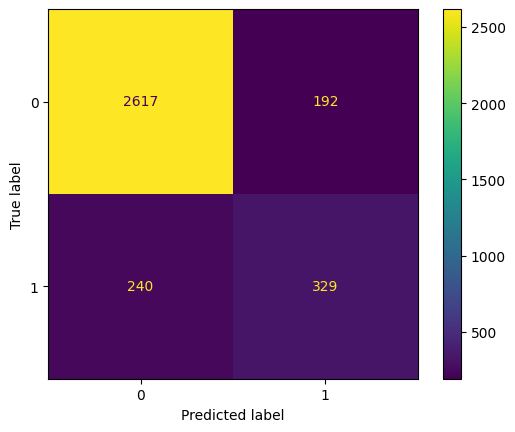

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2809
           1       0.63      0.58      0.60       569

    accuracy                           0.87      3378
   macro avg       0.77      0.75      0.76      3378
weighted avg       0.87      0.87      0.87      3378



Use class weights

In [ ]:
LR = LogisticRegression(solver='newton-cg', max_iter=10000, penalty=None, class_weight='balanced', verbose=True, n_jobs=2)

In [ ]:
LR.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=2,
                   penalty=None, solver='newton-cg', verbose=True)

In [ ]:
ytrain_predict = LR.predict(X_train)
ytest_predict = LR.predict(X_test)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[5909,  646],
       [ 765, 4151]])

In [ ]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6555
           1       0.87      0.84      0.85      4916

    accuracy                           0.88     11471
   macro avg       0.88      0.87      0.87     11471
weighted avg       0.88      0.88      0.88     11471



In [ ]:
train_prob = LR.predict_proba(X_train)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train, train_prob)
print('AUC: %.3f' % train_auc)

AUC: 0.937


In [ ]:
test_prob = LR.predict_proba(X_test)[:, 1]

In [ ]:
test_auc = roc_auc_score(y_test, test_prob)
print('AUC: %.3f' % test_auc)

AUC: 0.848


In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[2524,  285],
       [ 208,  361]])

In [ ]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2809
           1       0.56      0.63      0.59       569

    accuracy                           0.85      3378
   macro avg       0.74      0.77      0.75      3378
weighted avg       0.86      0.85      0.86      3378



#Let's regularize the model

In [ ]:
LR = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='l2', class_weight='balanced', verbose=True, n_jobs=2)

In [ ]:
LR.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=2,
                   solver='newton-cg', verbose=True)

In [ ]:
ytrain_predict = LR.predict(X_train)
ytest_predict = LR.predict(X_test)

In [ ]:
confusion_matrix(y_train,ytrain_predict)

array([[5912,  643],
       [ 770, 4146]])

In [ ]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6555
           1       0.87      0.84      0.85      4916

    accuracy                           0.88     11471
   macro avg       0.88      0.87      0.87     11471
weighted avg       0.88      0.88      0.88     11471



In [ ]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2809
           1       0.56      0.63      0.60       569

    accuracy                           0.85      3378
   macro avg       0.74      0.77      0.75      3378
weighted avg       0.86      0.85      0.86      3378



In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2'],  # elasticnet is only supported with saga
    'class_weight': [None, 'balanced'],
    'max_iter': [1000]
}

In [ ]:
LR = LogisticRegression()

In [ ]:
grid_search = GridSearchCV(LR, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'], 'max_iter': [1000],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
print("Best Parameters:", grid_search.best_estimator_)

Best Parameters: LogisticRegression(C=10, class_weight='balanced', max_iter=1000)


In [ ]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
## Getting the probabilities on the test set
ytrain_predict_prob=best_model.predict_proba(X_train)
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.941303  0.058697
1  0.975691  0.024309
2  0.743234  0.256766
3  0.952010  0.047990
4  0.433996  0.566004

In [ ]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[5908,  647],
       [ 766, 4150]])

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6555
           1       0.87      0.84      0.85      4916

    accuracy                           0.88     11471
   macro avg       0.88      0.87      0.87     11471
weighted avg       0.88      0.88      0.88     11471
 



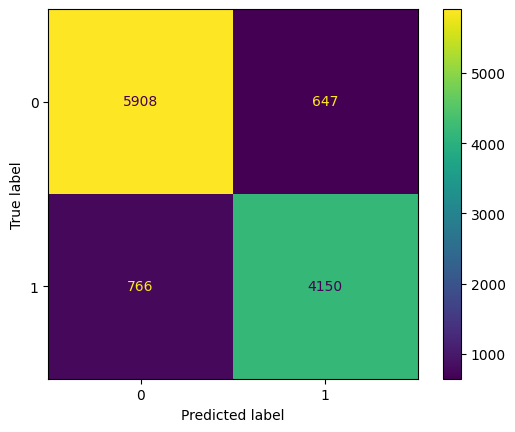

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2809
           1       0.56      0.63      0.59       569

    accuracy                           0.85      3378
   macro avg       0.74      0.77      0.75      3378
weighted avg       0.86      0.85      0.86      3378
 



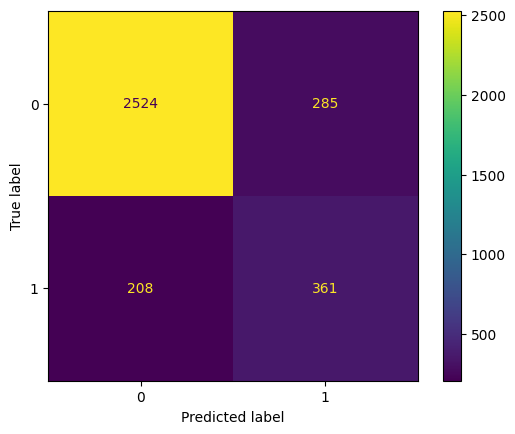

In [ ]:
## Confusion matrix on the test data
cm = confusion_matrix(y_test, ytest_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_test, ytest_predict),'\n');

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predict_prob[:,1])
roc_auc = roc_auc_score(y_train, ytrain_predict_prob[:,1])
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9370571287950303


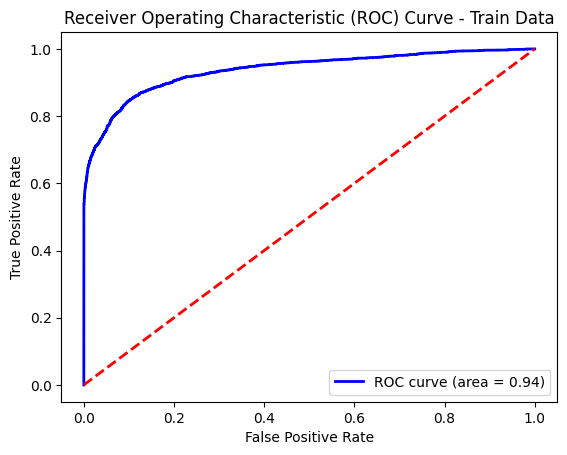

In [ ]:
# Plot ROC curve for test data
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ytest_predict_prob[:,1])
roc_auc = roc_auc_score(y_test, ytest_predict_prob[:,1])
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.8478334452215794


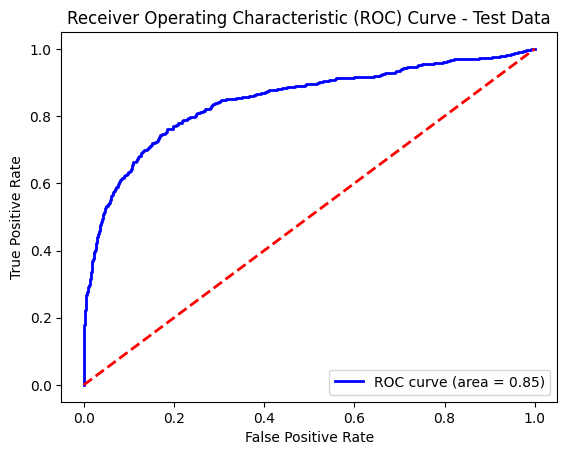

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Identify the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.37539182568803925


In [ ]:
# Predict using the optimal threshold for train and test data
y_train_pred_optimal = (ytrain_predict_prob >= optimal_threshold).astype(int)
y_test_pred_optimal = (ytest_predict_prob >= optimal_threshold).astype(int)

In [ ]:
train_conf_matrix = confusion_matrix(y_train, y_train_pred_optimal[:, 1])
train_classification_report = classification_report(y_train, y_train_pred_optimal[:, 1])

In [ ]:
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Classification Report:\n{train_classification_report}")

Confusion Matrix:
[[5386 1169]
 [ 518 4398]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      6555
           1       0.79      0.89      0.84      4916

    accuracy                           0.85     11471
   macro avg       0.85      0.86      0.85     11471
weighted avg       0.86      0.85      0.85     11471



In [ ]:
test_conf_matrix = confusion_matrix(y_test, y_test_pred_optimal[:, 1])
test_classification_report = classification_report(y_test, y_test_pred_optimal[:, 1])

In [ ]:
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_report}")

Confusion Matrix:
[[2288  521]
 [ 136  433]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2809
           1       0.45      0.76      0.57       569

    accuracy                           0.81      3378
   macro avg       0.70      0.79      0.72      3378
weighted avg       0.86      0.81      0.82      3378



Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
from os import X_OK
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.758434312614419
[[5001 1554]
 [1217 3699]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      6555
           1       0.70      0.75      0.73      4916

    accuracy                           0.76     11471
   macro avg       0.75      0.76      0.76     11471
weighted avg       0.76      0.76      0.76     11471



AUC: 0.841


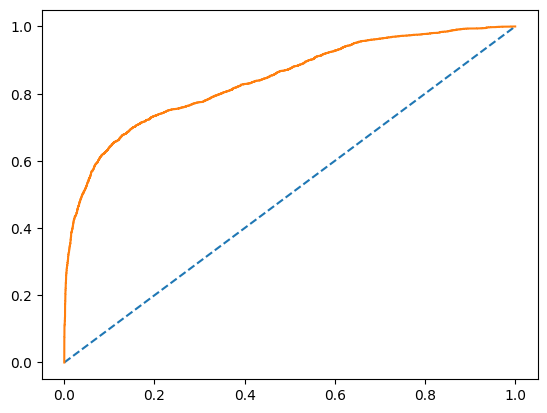

In [ ]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
#roc_auc = auc(train_fpr, train_tpr)
#print('AUC: %.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.724097098875074
[[2117  692]
 [ 240  329]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2809
           1       0.32      0.58      0.41       569

    accuracy                           0.72      3378
   macro avg       0.61      0.67      0.62      3378
weighted avg       0.80      0.72      0.75      3378



AUC: 0.725


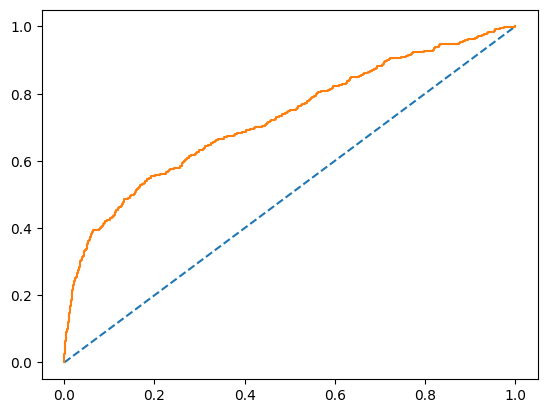

In [ ]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
#roc_auc = auc(train_fpr, train_tpr)
#print('AUC: %.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parameter grid for variance smoothing
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

In [ ]:
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]})

In [ ]:
# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'var_smoothing': 1e-09}


In [ ]:
# Use the best model for predictions
best_nb = grid_search.best_estimator_
y_train_pred = best_nb.predict(X_train)
y_test_pred = best_nb.predict(X_test)

In [ ]:
train_prob = best_nb.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_prob)
print('AUC: %.3f' % train_auc)

AUC: 0.841


In [ ]:
test_prob = best_nb.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_prob)
print('AUC: %.3f' % test_auc)

AUC: 0.725


In [ ]:
# Evaluate performance
print("Train Accuracy after tuning:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report after tuning:\n", classification_report(y_train, y_train_pred))

Train Accuracy after tuning: 0.758434312614419
Train Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      6555
           1       0.70      0.75      0.73      4916

    accuracy                           0.76     11471
   macro avg       0.75      0.76      0.76     11471
weighted avg       0.76      0.76      0.76     11471



In [ ]:
# Evaluate performance
print("Test Accuracy after tuning:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report after tuning:\n", classification_report(y_test, y_test_pred))

Test Accuracy after tuning: 0.724097098875074
Test Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      2809
           1       0.32      0.58      0.41       569

    accuracy                           0.72      3378
   macro avg       0.61      0.67      0.62      3378
weighted avg       0.80      0.72      0.75      3378



#KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#Performance Matrix on train dataset
y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9817801412256996
[[6446  109]
 [ 100 4816]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6555
           1       0.98      0.98      0.98      4916

    accuracy                           0.98     11471
   macro avg       0.98      0.98      0.98     11471
weighted avg       0.98      0.98      0.98     11471



In [ ]:
ytrain_predict_prob=KNN_model.predict_proba(X_train)
ytest_predict_prob=KNN_model.predict_proba(X_test)


In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predict_prob[:,1])
roc_auc = roc_auc_score(y_train, ytrain_predict_prob[:,1])
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9985654805460958


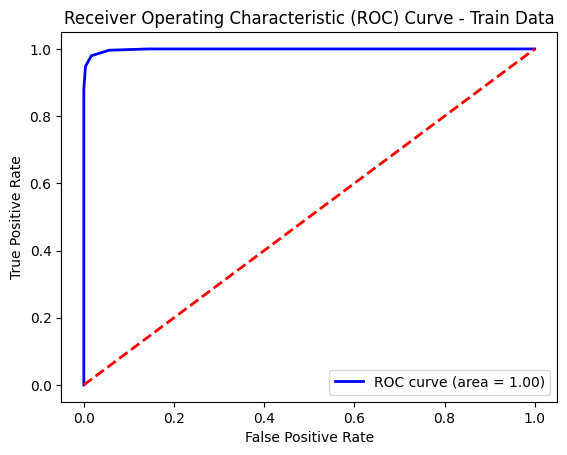

In [ ]:
# Plot ROC curve for test data
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train Data')
plt.legend(loc="lower right")
plt.show()


In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9437537004144464
[[2706  103]
 [  87  482]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2809
           1       0.82      0.85      0.84       569

    accuracy                           0.94      3378
   macro avg       0.90      0.91      0.90      3378
weighted avg       0.94      0.94      0.94      3378



In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ytest_predict_prob[:,1])
roc_auc = roc_auc_score(y_test, ytest_predict_prob[:,1])
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9707740184856484


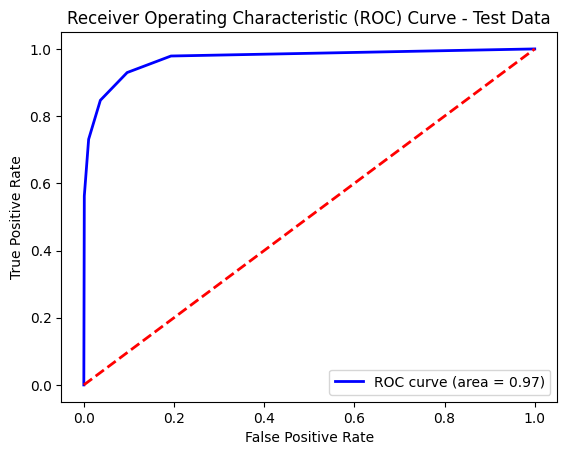

In [ ]:
# Plot ROC curve for test data
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
##Performance matrix on Train dataset
y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9741086217417836
[[6388  167]
 [ 130 4786]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6555
           1       0.97      0.97      0.97      4916

    accuracy                           0.97     11471
   macro avg       0.97      0.97      0.97     11471
weighted avg       0.97      0.97      0.97     11471



In [ ]:
##Performance matrix on test dataset
y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9339846062759029
[[2688  121]
 [ 102  467]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2809
           1       0.79      0.82      0.81       569

    accuracy                           0.93      3378
   macro avg       0.88      0.89      0.88      3378
weighted avg       0.93      0.93      0.93      3378



Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [ ]:
#empty list that will hold accuracy scores
ac_scores = []

#perform accuracy metrics for values from 1,3,5,....19
for k in range(1,20,2):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  # evaluate test accuracy
  scores = knn.score(X_test,y_test)
  ac_scores.append(scores)

#Changing to misclassification error
MCE = [1-x for x in ac_scores]
MCE

[0.02960331557134399,
 0.04470100651272946,
 0.056246299585553605,
 0.06601539372409715,
 0.07341622261693315,
 0.08348134991119005,
 0.08614564831261107,
 0.09117821195973952,
 0.09443457667258737,
 0.10035523978685612]

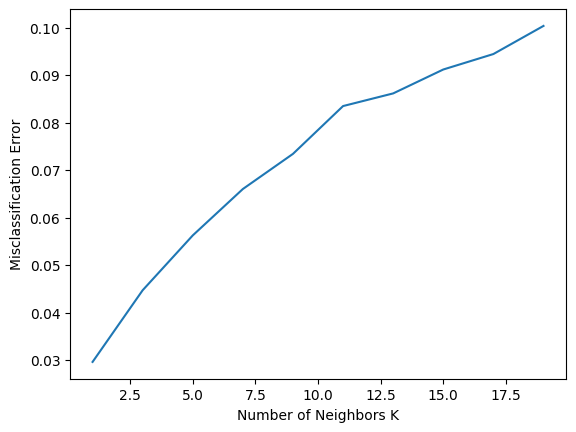

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.984656961032168
[[6516   39]
 [ 137 4779]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.99      0.97      0.98      4916

    accuracy                           0.98     11471
   macro avg       0.99      0.98      0.98     11471
weighted avg       0.98      0.98      0.98     11471



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9496743635287153
[[2748   61]
 [ 109  460]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.88      0.81      0.84       569

    accuracy                           0.95      3378
   macro avg       0.92      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(KNN_model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std()}')

Cross-Validation Scores: [0.88366013 0.95989538 0.97340889 0.97428073 0.97122929]
Mean CV Accuracy: 0.9524948857776183
Standard Deviation of CV Accuracy: 0.034802263290852974


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_knn = Pipeline([
    ('classifier', KNN_model)
])

In [ ]:
y_train_pred_knn = pipeline_knn.predict(X_train)

In [ ]:
print("KNN Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_knn))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred_knn))

KNN Model:
Confusion Matrix:
[[6516   39]
 [ 137 4779]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.99      0.97      0.98      4916

    accuracy                           0.98     11471
   macro avg       0.99      0.98      0.98     11471
weighted avg       0.98      0.98      0.98     11471



In [ ]:
y_test_pred_knn = pipeline_knn.predict(X_test)

In [ ]:
print("KNN Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_knn))

KNN Model:
Confusion Matrix:
[[2748   61]
 [ 109  460]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.88      0.81      0.84       569

    accuracy                           0.95      3378
   macro avg       0.92      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378



##Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
RF = RandomForestClassifier(random_state=42)

In [ ]:
RF.fit(X_train, y_train)
y_rf_probs_test = RF.predict_proba(X_test)[:, 1]
y_rf_probs_train = RF.predict_proba(X_train)[:, 1]

In [ ]:
cm = confusion_matrix(y_train, RF.predict(X_train))
cm

array([[6555,    0],
       [   0, 4916]])

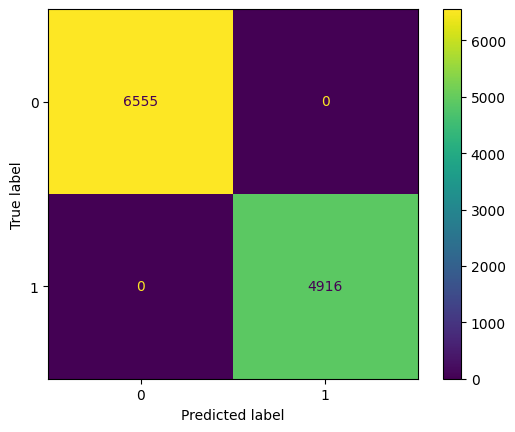

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()

In [ ]:
print("Random Forest Classification Report for train:\n", classification_report(y_train, RF.predict(X_train)))

Random Forest Classification Report for train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      4916

    accuracy                           1.00     11471
   macro avg       1.00      1.00      1.00     11471
weighted avg       1.00      1.00      1.00     11471



In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_rf_probs_train)
roc_auc = roc_auc_score(y_train, y_rf_probs_train)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 1.0


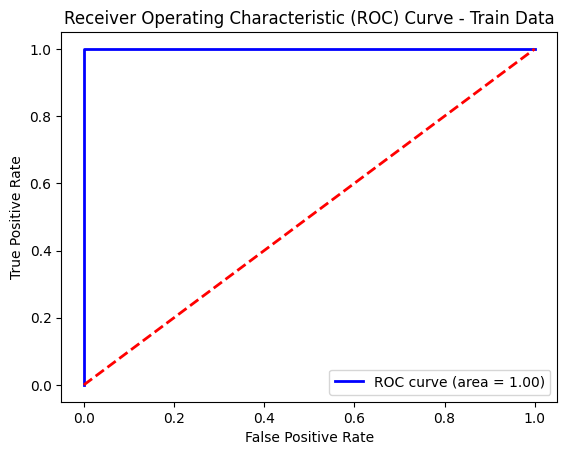

In [ ]:
# Plot ROC curve for test data
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train Data')
plt.legend(loc="lower right")
plt.show()

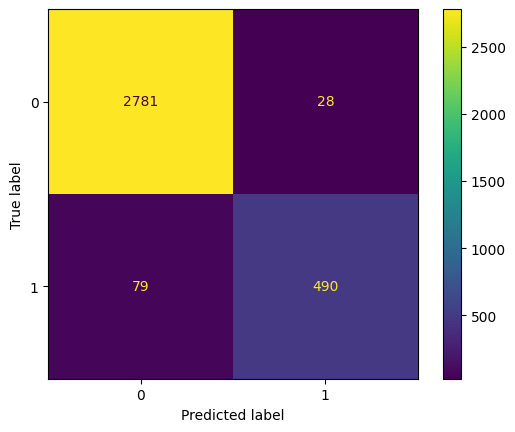

In [ ]:
cm = confusion_matrix(y_test, RF.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()


In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_rf_probs_test)
roc_auc = roc_auc_score(y_test, y_rf_probs_test)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.988772280411757


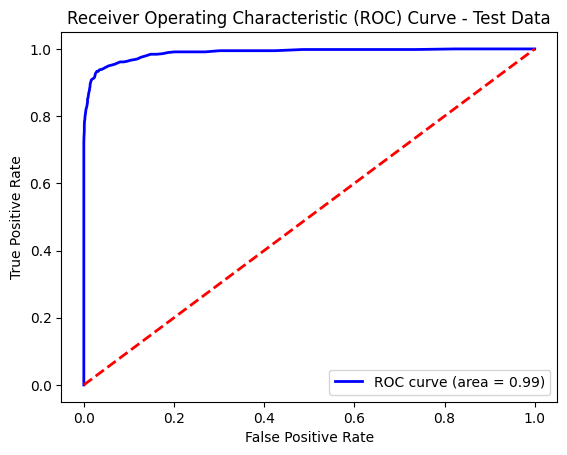

In [ ]:
# Plot ROC curve for test data
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Random Forest Classification Report for test:\n", classification_report(y_test, RF.predict(X_test)))

Random Forest Classification Report for test:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.95      0.86      0.90       569

    accuracy                           0.97      3378
   macro avg       0.96      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378



Lets do hypertunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_dist = {
    'n_estimators': randint(100, 500),             # Number of trees in the forest
    'max_depth': randint(5, 15),                    # Maximum depth of the tree
    'min_samples_split': randint(2, 10),            # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10),             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],       # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']  # Balancing class weights
}

In [ ]:
random_search = RandomizedSearchCV(RF,param_distributions=param_dist,n_iter=50, cv=3, verbose=1, random_state=41, n_jobs=-1, scoring='f1')

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab74feb40a0>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab752245ba0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab752098b80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab747c99e10>},
                   random_state=41, scoring='f1', verbose=1)

In [ ]:
random_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 248}

In [ ]:
best_rf = random_search.best_estimator_

In [ ]:
pred_train_rf = best_rf.predict(X_train)
pred_test_rf = best_rf.predict(X_test)

In [ ]:
ytrain_predict_prob=best_rf.predict_proba(X_train)[:, 1]
ytest_predict_prob=best_rf.predict_proba(X_test)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train, ytrain_predict_prob)
print('AUC: %.3f' % train_auc)

AUC: 0.999


In [ ]:
test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % test_auc)

AUC: 0.974


In [ ]:
print(confusion_matrix(y_train, pred_train_rf))

[[6468   87]
 [  55 4861]]


In [ ]:
print(classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.98      0.99      0.99      4916

    accuracy                           0.99     11471
   macro avg       0.99      0.99      0.99     11471
weighted avg       0.99      0.99      0.99     11471



In [ ]:
print(confusion_matrix(y_test, pred_test_rf))
print(classification_report(y_test, pred_test_rf))

[[2722   87]
 [  95  474]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.84      0.83      0.84       569

    accuracy                           0.95      3378
   macro avg       0.91      0.90      0.90      3378
weighted avg       0.95      0.95      0.95      3378



In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predict_prob)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.511813417668362


In [ ]:
# Predict using the optimal threshold for train and test data
y_train_pred_optimal = (ytrain_predict_prob >= optimal_threshold).astype(int)
y_test_pred_optimal = (ytest_predict_prob >= optimal_threshold).astype(int)

In [ ]:
train_conf_matrix = confusion_matrix(y_train, y_train_pred_optimal)
train_classification_report = classification_report(y_train, y_train_pred_optimal)

In [ ]:
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Classification Report:\n{train_classification_report}")

Confusion Matrix:
[[6479   76]
 [  60 4856]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.98      0.99      0.99      4916

    accuracy                           0.99     11471
   macro avg       0.99      0.99      0.99     11471
weighted avg       0.99      0.99      0.99     11471



In [ ]:
test_conf_matrix = confusion_matrix(y_test, y_test_pred_optimal)
test_classification_report = classification_report(y_test, y_test_pred_optimal)

In [ ]:
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_report}")

Confusion Matrix:
[[2729   80]
 [  97  472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.86      0.83      0.84       569

    accuracy                           0.95      3378
   macro avg       0.91      0.90      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [ ]:
def evaluate_threshold(threshold):
    y_pred_threshold = (ytest_predict_prob >= threshold).astype(int)  # Predict class based on threshold

    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    cm = confusion_matrix(y_test, y_pred_threshold)
    return precision, recall, f1, accuracy, cm

In [ ]:
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    precision, recall, f1, accuracy, cm = evaluate_threshold(threshold)

In [ ]:
print(f"Threshold: {threshold}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{cm}\n")

Threshold: 0.9
Precision: 1.00
Recall: 0.16
F1-score: 0.28
Accuracy: 0.86
Confusion Matrix:
[[2809    0]
 [ 478   91]]



In [ ]:
threshold = 0.5

In [ ]:
y_train_pred_optimal = (ytrain_predict_prob >= threshold).astype(int)
y_test_pred_optimal = (ytest_predict_prob >= threshold).astype(int)

In [ ]:
print(confusion_matrix(y_train, y_train_pred_optimal))
print(classification_report(y_train, y_train_pred_optimal))

[[6468   87]
 [  55 4861]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.98      0.99      0.99      4916

    accuracy                           0.99     11471
   macro avg       0.99      0.99      0.99     11471
weighted avg       0.99      0.99      0.99     11471



In [ ]:
print(confusion_matrix(y_test, y_test_pred_optimal))
print(classification_report(y_test, y_test_pred_optimal))

[[2722   87]
 [  95  474]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.84      0.83      0.84       569

    accuracy                           0.95      3378
   macro avg       0.91      0.90      0.90      3378
weighted avg       0.95      0.95      0.95      3378



##Boosting

Ada Boost

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
#Performance matrix on train dataset
y_train_predict=ADB_model.predict(X_train)
model_score = ADB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.893557667160666
[[6036  519]
 [ 702 4214]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6555
           1       0.89      0.86      0.87      4916

    accuracy                           0.89     11471
   macro avg       0.89      0.89      0.89     11471
weighted avg       0.89      0.89      0.89     11471



AUC: 0.958


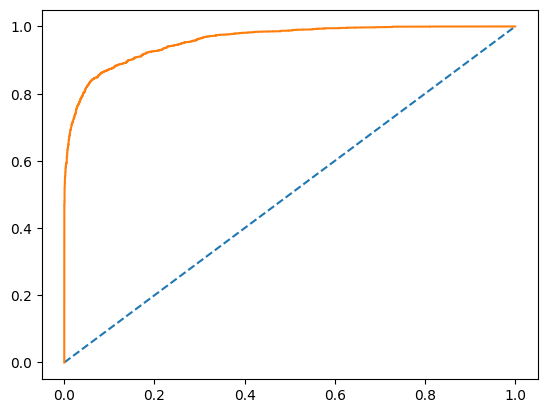

In [ ]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
#roc_auc = auc(train_fpr, train_tpr)
#print('AUC: %.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
#Perform matrix on test data
y_test_predict = ADB_model.predict(X_test)
model_score=ADB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8863232682060391
[[2602  207]
 [ 177  392]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2809
           1       0.65      0.69      0.67       569

    accuracy                           0.89      3378
   macro avg       0.80      0.81      0.80      3378
weighted avg       0.89      0.89      0.89      3378



AUC: 0.898


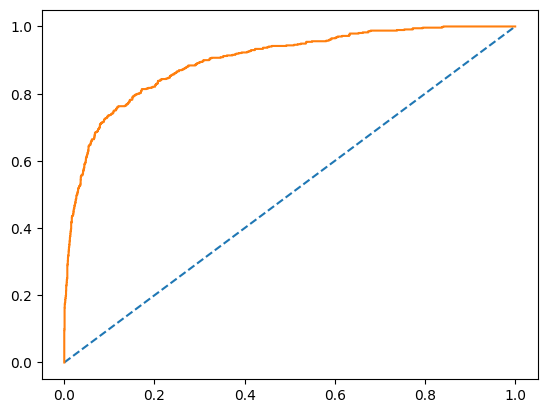

In [ ]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
#roc_auc = auc(train_fpr, train_tpr)
#print('AUC: %.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=2, class_weight={0: 1, 1: 5})
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=200, learning_rate=0.05)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 5},
                                                    max_depth=2),
                   learning_rate=0.05, n_estimators=200)

In [ ]:
y_train_predict = ada_clf.predict(X_train)
y_test_predict = ada_clf.predict(X_test)

In [ ]:
y_train_predict_prob = ada_clf.predict_proba(X_train)
y_test_predict_prob = ada_clf.predict_proba(X_test)

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predict_prob[:,1])
print('AUC: %.3f' % train_auc)

AUC: 0.952


In [ ]:
test_auc = roc_auc_score(y_test, y_test_predict_prob[:,1])
print('AUC: %.3f' % test_auc)

AUC: 0.902


In [ ]:
model_score = ada_clf.score(X_train, y_train)

In [ ]:
print(model_score)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.7980123790428036
[[4373 2182]
 [ 135 4781]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      6555
           1       0.69      0.97      0.80      4916

    accuracy                           0.80     11471
   macro avg       0.83      0.82      0.80     11471
weighted avg       0.85      0.80      0.80     11471



In [ ]:
print(model_score)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.7980123790428036
[[1918  891]
 [  54  515]]
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      2809
           1       0.37      0.91      0.52       569

    accuracy                           0.72      3378
   macro avg       0.67      0.79      0.66      3378
weighted avg       0.87      0.72      0.76      3378



In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob[:,1])

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.5258454173453013


In [ ]:
y_train_pred_optimal = (ytrain_predict_prob >= optimal_threshold).astype(int)
y_test_pred_optimal = (ytest_predict_prob >= optimal_threshold).astype(int)

In [ ]:
#train_prob = LR.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_pred_optimal)
print('AUC: %.3f' % train_auc)

AUC: 0.987


In [ ]:
print(confusion_matrix(y_train, y_train_pred_optimal))
print(classification_report(y_train, y_train_pred_optimal))

[[6485   70]
 [  71 4845]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.99      0.99      0.99      4916

    accuracy                           0.99     11471
   macro avg       0.99      0.99      0.99     11471
weighted avg       0.99      0.99      0.99     11471



In [ ]:
test_auc = roc_auc_score(y_test, y_test_pred_optimal)
print('AUC: %.3f' % test_auc)

AUC: 0.898


In [ ]:
print(confusion_matrix(y_test, y_test_pred_optimal))
print(classification_report(y_test, y_test_pred_optimal))

[[2739   70]
 [ 102  467]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.87      0.82      0.84       569

    accuracy                           0.95      3378
   macro avg       0.92      0.90      0.91      3378
weighted avg       0.95      0.95      0.95      3378



##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl=gbcl.fit(X_train,y_train)

In [ ]:
#Performance matrix on training data
y_train_predict=gbcl.predict(X_train)
model_score = gbcl.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9114288205038793
[[6192  363]
 [ 653 4263]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6555
           1       0.92      0.87      0.89      4916

    accuracy                           0.91     11471
   macro avg       0.91      0.91      0.91     11471
weighted avg       0.91      0.91      0.91     11471



In [ ]:
ytrain_predict_prob=gbcl.predict_proba(X_train)
ytest_predict_prob=gbcl.predict_proba(X_test)

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predict_prob[:,1])
roc_auc = roc_auc_score(y_train, ytrain_predict_prob[:,1])
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.972641723440451


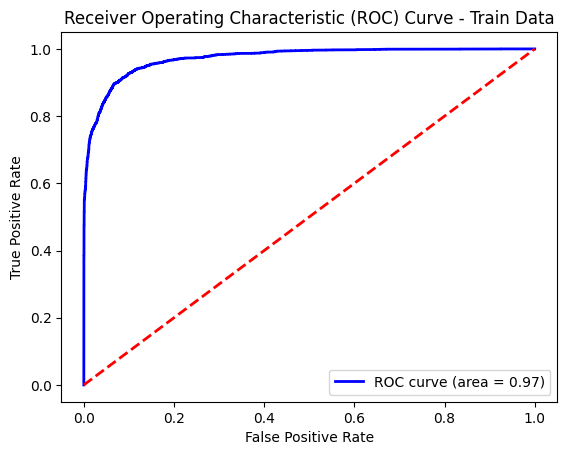

In [ ]:
# Plot ROC curve for test data
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#performance matrix on testing data
y_test_predict=gbcl.predict(X_test)
model_score=gbcl.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9029011249259917
[[2645  164]
 [ 164  405]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2809
           1       0.71      0.71      0.71       569

    accuracy                           0.90      3378
   macro avg       0.83      0.83      0.83      3378
weighted avg       0.90      0.90      0.90      3378



In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ytest_predict_prob[:,1])
roc_auc = roc_auc_score(y_test, ytest_predict_prob[:,1])
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.921884277313506


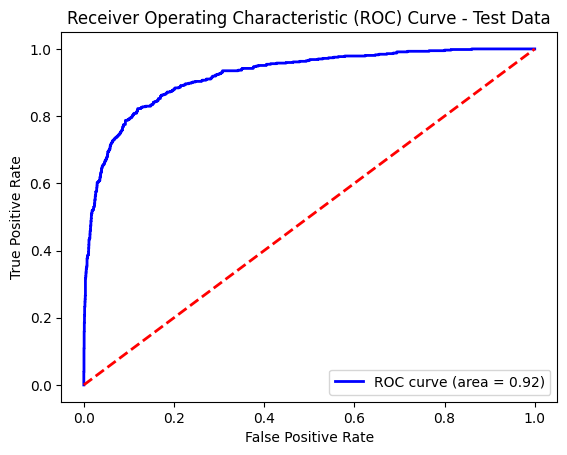

In [ ]:
# Plot ROC curve for test data
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

#HyperTunning

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.5, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'subsample': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=gbcl, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1], 'max_depth': [3, 4],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
y_train_predict = best_model.predict(X_train)
y_test_predict = best_model.predict(X_test)

In [ ]:
train_prob = best_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_prob)
print('AUC: %.3f' % train_auc)

AUC: 1.000


In [ ]:
test_prob = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_prob)
print('AUC: %.3f' % test_auc)

AUC: 0.983


In [ ]:
print("Train Set Results:")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

Train Set Results:
[[6555    0]
 [   1 4915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      4916

    accuracy                           1.00     11471
   macro avg       1.00      1.00      1.00     11471
weighted avg       1.00      1.00      1.00     11471



In [ ]:
print("Test Set Results:")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

Test Set Results:
[[2757   52]
 [  78  491]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2809
           1       0.90      0.86      0.88       569

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



#Chaning the parameters

In [ ]:
param_grid = {
    'n_estimators': [400],
    'learning_rate': [0.3],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [5],
    'subsample': [0.9]
}

In [ ]:
grid_search = GridSearchCV(estimator=gbcl, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [5],
                         'min_samples_leaf': [5], 'min_samples_split': [2],
                         'n_estimators': [400], 'subsample': [0.9]},
             scoring='f1', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 400, 'subsample': 0.9}


In [ ]:
y_train_predict = best_model.predict(X_train)
y_test_predict = best_model.predict(X_test)

In [ ]:
train_prob = best_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_prob)
print('AUC: %.3f' % train_auc)

AUC: 1.000


In [ ]:
test_prob = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_prob)
print('AUC: %.3f' % test_auc)

AUC: 0.992


In [ ]:
print("Train Set Results:")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

Train Set Results:
[[6555    0]
 [   0 4916]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      4916

    accuracy                           1.00     11471
   macro avg       1.00      1.00      1.00     11471
weighted avg       1.00      1.00      1.00     11471



In [ ]:
print("Test Set Results:")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

Test Set Results:
[[2785   24]
 [  59  510]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2809
           1       0.96      0.90      0.92       569

    accuracy                           0.98      3378
   macro avg       0.97      0.94      0.96      3378
weighted avg       0.98      0.98      0.98      3378



In [ ]:
corr_matrix = X_train.corr()

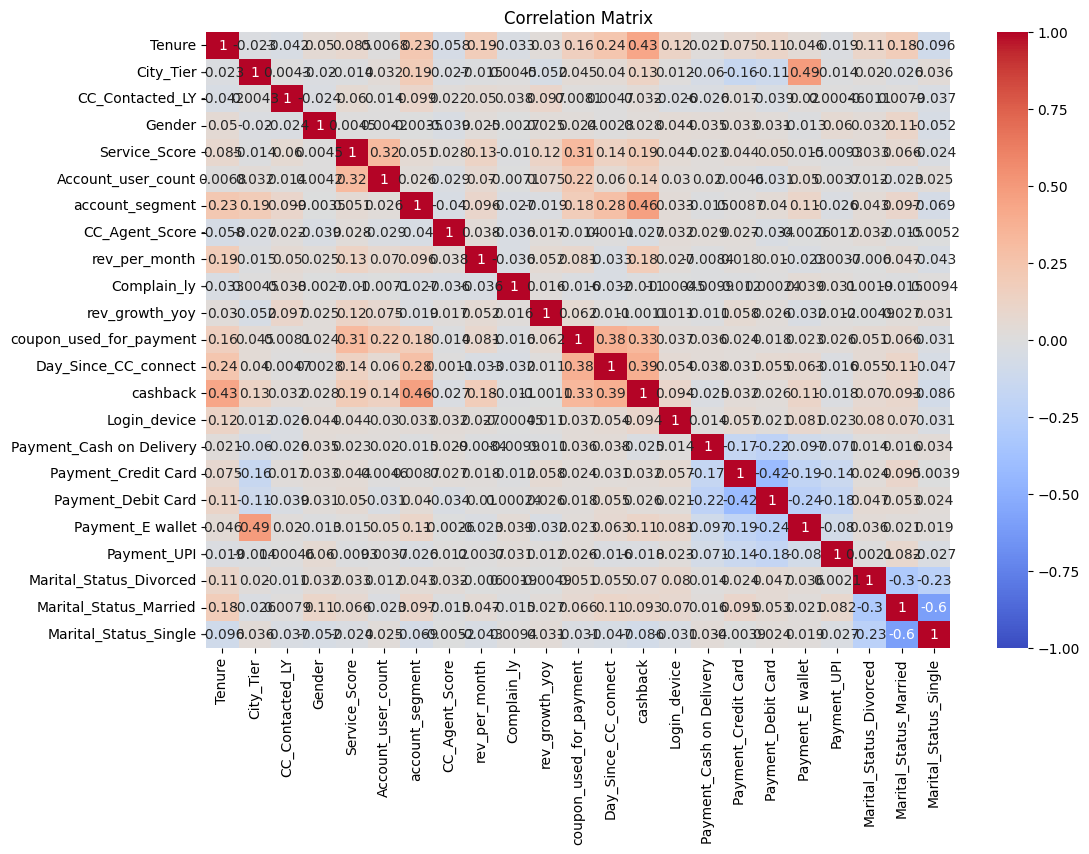

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
feature_importances = best_model.feature_importances_

In [ ]:
sorted_idx = np.argsort(feature_importances)

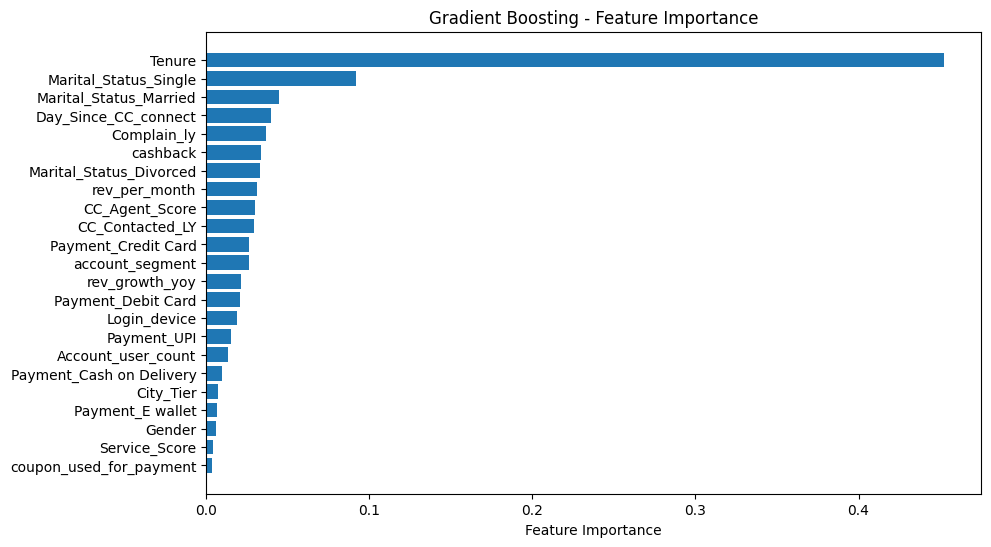

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting - Feature Importance')
plt.show()

In [ ]:
feature_importances = best_model.feature_importances_

In [ ]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                     Feature  Importance
0                     Tenure    0.452621
22     Marital_Status_Single    0.091645
21    Marital_Status_Married    0.044355
12      Day_Since_CC_connect    0.039573
9                Complain_ly    0.036469
13                  cashback    0.033476
20   Marital_Status_Divorced    0.033001
8              rev_per_month    0.031027
7             CC_Agent_Score    0.030124
2            CC_Contacted_LY    0.029080
16       Payment_Credit Card    0.026294
6            account_segment    0.025932
10            rev_growth_yoy    0.021555
17        Payment_Debit Card    0.020690
14              Login_device    0.018809
19               Payment_UPI    0.015011
5         Account_user_count    0.013292
15  Payment_Cash on Delivery    0.009469
1                  City_Tier    0.007450
18          Payment_E wallet    0.006554
3                     Gender    0.006035
4              Service_Score    0.004256
11   coupon_used_for_payment    0.003282


In [ ]:
model = GradientBoostingClassifier(
    n_estimators=1000,          # More trees
    learning_rate=0.05,         # Lower learning rate
    max_depth=4,                # Reduce depth to control complexity
    min_samples_split=10,       # Require more samples to split nodes
    min_samples_leaf=5,         # Require more samples at leaf nodes
    subsample=0.8,              # Use a fraction of data to build each tree
    max_features='sqrt',        # Limit the number of features used in each tree
    random_state=42
)

In [ ]:
threshold = 0.02  # Adjust this threshold as needed
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

In [ ]:
# Create a reduced dataset with only important features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [ ]:
#model = GradientBoostingClassifier()  # Or your specific model
model.fit(X_train_reduced, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=10,
                           n_estimators=1000, random_state=42, subsample=0.8)

In [ ]:
#x_pred_reduced = best_model.predict(X_train_reduced)
#y_pred_reduced = best_model.predict(X_test_reduced)

#Hyper tune again

In [ ]:
model = GradientBoostingClassifier(
    n_estimators=1000,          # More trees
    learning_rate=0.05,         # Lower learning rate
    max_depth=4,                # Reduce depth to control complexity
    min_samples_split=10,       # Require more samples to split nodes
    min_samples_leaf=5,         # Require more samples at leaf nodes
    subsample=0.8,              # Use a fraction of data to build each tree
    max_features='sqrt',        # Limit the number of features used in each tree
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=10,
                           n_estimators=1000, random_state=42, subsample=0.8)

In [ ]:
# Evaluate on the test set
y_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Test Accuracy: 0.9461


In [ ]:
print(classification_report(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2809
           1       0.86      0.81      0.83       569

    accuracy                           0.95      3378
   macro avg       0.91      0.89      0.90      3378
weighted avg       0.95      0.95      0.95      3378

AUC Score: 0.9724


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation Accuracy: 0.9569 ± 0.0286


#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
y_train_predict = xgb.predict(X_train)
y_test_predict = xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train, y_train_predict))

[[6555    0]
 [   4 4912]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      4916

    accuracy                           1.00     11471
   macro avg       1.00      1.00      1.00     11471
weighted avg       1.00      1.00      1.00     11471



In [ ]:
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test, y_test_predict))

[[2780   29]
 [  76  493]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.94      0.87      0.90       569

    accuracy                           0.97      3378
   macro avg       0.96      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378



#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model = BaggingClassifier(estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [ ]:
#Performance matrix on Train data set
y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

1.0
[[6555    0]
 [   0 4916]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      4916

    accuracy                           1.00     11471
   macro avg       1.00      1.00      1.00     11471
weighted avg       1.00      1.00      1.00     11471



In [ ]:
train_prob = Bagging_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_prob)
print('AUC: %.3f' % train_auc)

AUC: 1.000


In [ ]:
#performance matrix on test dataset
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9632918886915335
[[2769   40]
 [  84  485]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.92      0.85      0.89       569

    accuracy                           0.96      3378
   macro avg       0.95      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [ ]:
test_prob = Bagging_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_prob)
print('AUC: %.3f' % test_auc)

AUC: 0.973


HyperTunne the model

In [ ]:
# Define the base estimator
base_estimator = DecisionTreeClassifier()

In [ ]:
# Define the BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_estimator, random_state=1)

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.8, 1.0],
    'max_features': [0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 10, 20], # Changed 'base_estimator__' to 'estimator__'
    'estimator__min_samples_split': [2, 5, 10], # Changed 'base_estimator__' to 'estimator__'
    'estimator__min_samples_leaf': [1, 2, 4] # Changed 'base_estimator__' to 'estimator__'
}

# Randomized Search
randomized_search = RandomizedSearchCV(estimator=bagging_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=1, n_jobs=-1)
randomized_search.fit(X_train, y_train)

print("Best parameters from RandomizedSearchCV:", randomized_search.best_params_)

Best parameters from RandomizedSearchCV: {'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.8, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': None, 'bootstrap_features': True, 'bootstrap': False}


In [ ]:
#Performance matrix on Train data set
y_train_predict = randomized_search.predict(X_train)
model_score = randomized_search.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

1.0
[[6555    0]
 [   0 4916]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      4916

    accuracy                           1.00     11471
   macro avg       1.00      1.00      1.00     11471
weighted avg       1.00      1.00      1.00     11471



In [ ]:
train_prob = randomized_search.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_prob)
print('AUC: %.3f' % train_auc)

AUC: 1.000


In [ ]:
test_prob = randomized_search.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_prob)
print('AUC: %.3f' % test_auc)

AUC: 0.995


In [ ]:
#performance matrix on test dataset
y_test_predict = randomized_search.predict(X_test)
model_score = randomized_search.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9695085849615157
[[2799   10]
 [  93  476]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.98      0.84      0.90       569

    accuracy                           0.97      3378
   macro avg       0.97      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378

